In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/Shared\ drives/BA775\ -\ Team\ 4A

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/Shared drives/BA775 - Team 4A


In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#plt.style.use('classic')
%matplotlib inline
import seaborn as sns

# Predicting AirBnB prices in New York City

AirBnB has become one of the most popular and fastest growing travel lodging providers. In 2020, there is an estimated 14,000 new hosts joining the platform each month, all of them placing new listings up for rent.

Despite their growing popularity, AirBnB has not provided any specific guidance on how hosts should price their listing, providing only a suggestion that hosts should "*search for comparable listings in your city or neighborhood to get an idea of market prices*" on one of their [FAQ pages](https://www.airbnb.com/help/article/52/how-should-i-choose-my-listings-price).

This project aims to take a first step in providing clearer metrics to determine AirBnB listing prices.

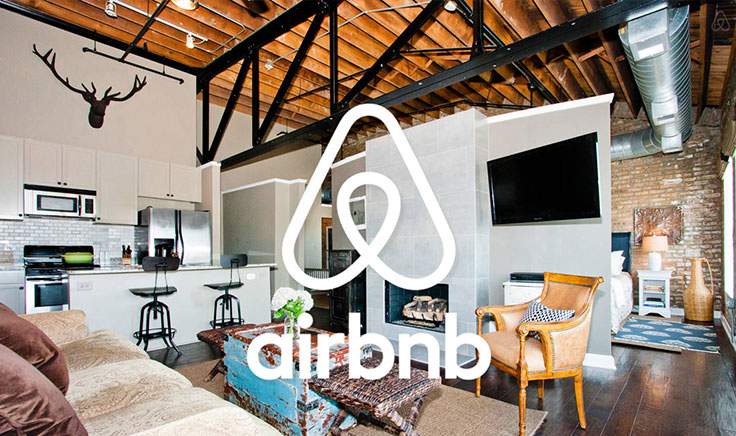

Our goal is to identify factors that determine AirBnB listing prices in New York City by conducting the following tasks:
* Conduct data exploration to see if we can derive any key insights from the dataset variables, specifically how much the variables already included in the dataset explain the prices (e.g. how does review ratings affect prices?)
    * Explore external factors that may explain what elements of a neighborhood may affect prices (using supplementary datasets)
        * Crime
        * Transportation accessibility
        * Cost of Living/real estate prices
* Leverage visualization tools (i.e. matplotlib and seaborn) to visualize data exploration findings
*Develop a predictive model with machine learning based on insights derived from data exploration stage (i.e. feature engineering)
    * Ideally, improve upon previous ML model iterations

Ultimately, we hope to help AirBnB renters determine the best price to list for their rentals and identify areas of potential improvement in order to increase marketability of their listings.

----

**NOTE FOR OUR READERS:** *To more easily navigate this notebook, keep an eye out for keywords like "takeaways", "conclusion", "summary". Almost each section and subsection has a summary or conclusion for readers to derive key insights from. For example, each subsection in our EDA has a 'Section Summary' in the beginning.*

# Table of Contents
1. About the Data


2. Data Cleaning and Pre-Processing
    1. Primary Dataset
    2. Secondary Dataset - Subway Stations
    3. Secondary Dataset - Property Sales
    
    
3. Exploratory Data Analysis
    1. Price Exploration
    2. Location Exploration
    3. Host Exploration
    4. Listing Information Exploration
    5. Review Exploration
    6. Availability Exploration


3. Machine Learning Model Development
    1. Data Pre-Processing (pt. 2)
    2. Linear Regression Model
    3. Deep Neural Network
    
    
4. Conclusions + Areas of Improvement
----


# About the Data

This project's primary dataset will be from [InsideAirBnB.com](https://InsideAirBnB.com), a third-party website that regularly scrapes data from the AirBnB website. The particular dataset we will work with consists of information on AirBnB listings in New York City, scraped on October 2020. http://insideairbnb.com/get-the-data.html

Unprocessed, the dataset had 44,666 data points and 77 columns.

### Secondary / Supplementary data

To support our analysis and model, we will be drawing insights from external datasets:
* NYC Property Sales - a record of every building or building unit (apartment, etc.) sold in the New York City property market from 2014-2015
    * https://www.kaggle.com/new-york-city/nyc-property-sales
* NYC Subway Data - Data on NYC MTA stations
    * http://web.mta.info/developers/data/nyct/subway/Stations.csv

-----

# Data Cleaning and Pre-Processing

## Primary AirBnB Dataset

In [5]:
raw = pd.read_csv('listings.csv')

In [6]:
raw.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20201005145859   2020-10-07   
1  3831  https://www.airbnb.com/rooms/3831  20201005145859   2020-10-09   
2  5121  https://www.airbnb.com/rooms/5121  20201005145859   2020-10-09   
3  5136  https://www.airbnb.com/rooms/5136  20201005145859   2020-10-08   
4  5178  https://www.airbnb.com/rooms/5178  20201005145859   2020-10-07   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3           Spacious Brooklyn Duplex, Patio + Garden   
4                   Large Furnished Room Near B'way　   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  We welcome you to stay in our lovely 2 br dupl...   
4  Please don’t expect the luxury here just a bas...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3                                                NaN   
4    Theater district, many restaurants around here.   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/a3f7ace8-e7a9...     7378   
4  https://a0.muscache.com/pictures/12065/f070997...     8967   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                         9.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/7378  ...                        10.0   
4  https://www.airbnb.com/users/show/8967  ...                         9.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                    9.0                 9.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                    8.0                10.0     NaN                f   
4                   10.0                 9.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           1   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.36  
1                                           0              4.82  
2                                           0              0.36  
3                                           0              0.01  
4                                           0              3.40  

[5 rows x 74 columns]

In [7]:
raw.shape

(44666, 74)

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            44666 non-null  int64  
 1   listing_url                                   44666 non-null  object 
 2   scrape_id                                     44666 non-null  int64  
 3   last_scraped                                  44666 non-null  object 
 4   name                                          44650 non-null  object 
 5   description                                   43385 non-null  object 
 6   neighborhood_overview                         28207 non-null  object 
 7   picture_url                                   44666 non-null  object 
 8   host_id                                       44666 non-null  int64  
 9   host_url                                      44666 non-null 

### Checking for Duplicates

Checking for duplicates in this dataset is very nuanced. There may be a case where a data point could be a duplicate or could be a listing identical in description but actually different listings (e.g. a host that has two listings that are very similar that are both rentable). This means that there is some manual checking and personal judgement that may be required to determine whether or not the data row is a duplicate.

In [51]:
raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [52]:
dup = raw.duplicated(subset=['id'], keep=False)
raw[dup].shape 

(0, 74)

It seems there are no duplicate entries in our dataset based on the ID of the listing. With that said, there may be duplicate listings under the same conditions.

Let's see if there are any listings with the same name, location, and host:

In [53]:
dup = raw.duplicated(subset=['name','latitude','longitude','host_id'], keep=False)
raw[dup].shape

(53, 74)

As seen above, there do seem to be a number of duplicates based on the listing name, location, and host. The question is now whether or not we should deal with these duplicates.

The issue is these duplicate rows may be...


*   errors (e.g. host creates a new listing and forgets to delete the old one)
*   intentional (e.g. a hotel lists 10 identical but different rooms)
*   or both (e.g. [host creates duplicate of single listing to increase listing exposure](https://www.reddit.com/r/AirBnB/comments/3w9uo7/duplicate_listings/))

Ultimately, since there are no data input / scrape errors (shown by unique listing IDs), we will not tamper with these 'duplicates'.

### Dropping columns

Since we're utilizing a dataset scraped from AirBnB's website, our new dataset contains a lot more variables than our first dataset from Kaggle, where it seems like the author in Kaggle had already cleaned and excluded irrelevant columns.

We will now do the same with the variables in this dataset that we won't be using for this project. Most of the columns we will drop relates to the host, web scraping, and listing information that are unlikely to affect price (e.g. host url, scrape id, host location, etc.)

In [54]:
cols_to_drop = ['host_url','calendar_updated','listing_url','scrape_id','last_scraped','neighborhood_overview','picture_url','host_name','host_since','host_response_time','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_verifications','neighbourhood','bathrooms','calendar_last_scraped','first_review','last_review','license','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [55]:
clean_droppedcols = raw.drop(columns=cols_to_drop)

In [56]:
display(f'Previously: {raw.shape}', f'Now: {clean_droppedcols.shape}')

'Previously: (44666, 74)'

'Now: (44666, 47)'

### Adding an `Amenities_Count` column

With amenities of a listing listed, it might be interesting to see if the amount of amenities could affect the listing's price

In [57]:
clean_droppedcols['amenities'][0]

'["Hot water", "Stove", "Extra pillows and blankets", "Smoke alarm", "Laptop-friendly workspace", "Coffee maker", "Bed linens", "Dishes and silverware", "Oven", "Wifi", "Air conditioning", "Paid parking off premises", "Baking sheet", "Fire extinguisher", "Free street parking", "Essentials", "Heating", "Kitchen", "Carbon monoxide alarm", "Cooking basics", "Refrigerator", "Hair dryer", "Hangers", "Keypad", "Bathtub", "Ethernet connection", "TV", "Iron", "Cleaning before checkout", "Long term stays allowed", "Luggage dropoff allowed"]'

In [58]:
len(clean_droppedcols['amenities'][0].strip("][").split('", "'))

31

In [59]:
amenities_count = []
for i in range(len(clean_droppedcols['amenities'])):
    count = len(clean_droppedcols['amenities'][i].strip("][").split('", "'))
    amenities_count.append(count)

In [60]:
clean_droppedcols['amenities_count'] = amenities_count

In [61]:
clean_droppedcols[['amenities_count','amenities']].head()

amenities_count                                          amenities
0               31  ["Hot water", "Stove", "Extra pillows and blan...
1               35  ["Hot water", "Stove", "Free parking on premis...
2                4  ["Wifi", "Air conditioning", "Heating", "Kitch...
3               10  ["Wifi", "Dryer", "Air conditioning", "Kitchen...
4               18  ["Wifi", "Hangers", "Air conditioning", "Paid ...

### Cleaning `price` variable

When taking a closer look at the price of the listings, it seems that the data type is a string with dollar signs afixed to the front and commas seperating thousands. We need to convert this into a float so we can run analysis on it later on.

In [62]:
data = clean_droppedcols

In [63]:
type(data['price'][0])

str

In [64]:
raw['price'][0]

'$175.00'

In [65]:
data['price'] = [float(data['price'][i].strip('$').strip(',').replace(',','')) for i in range(len(data['price']))]

In [66]:
# note the change in type
type(data['price'][0])

numpy.float64

In [67]:
raw['price'].describe()

count       44666
unique       1163
top       $100.00
freq         1633
Name: price, dtype: object

In [68]:
data['price'].describe()

count    44666.000000
mean       150.104657
std        323.366748
min          0.000000
25%         64.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

Something notable from the summary statistics above is the existence of 0-value prices. Which should not be the case. Let's see how many there are.

In [69]:
price0 = data['price']==0

price0_count = data[price0]['price'].count()
price0_pct = data[price0]['price'].count() / data['price'].count()*100

print(price0_count, price0_pct)

25 0.05597098464156182


With only 25 listings (0.055% of the whole dataset) being priced at 0, we can either fix them or remove them entirely. After some investigation into why these listings are priced at 0, a few possible explanations have come up:
* error in the scraping process
* intentional zero-pricing (i.e. making the listing inactive or listing the price in the name/description)
* unintentional zero-pricing (error on the part of the host)

Since we do not know why some of these listings are priced at 0 and considering how few of them there are, we will remove these listings from our dataset.

In [70]:
data = data[~price0]

In [71]:
data['price'].min()

10.0

### Cleaning `bathroom` variable

In [72]:
data['bathrooms_text'].unique()

array(['1 bath', nan, '1.5 baths', '1 shared bath', '1 private bath',
       'Shared half-bath', '2 baths', '3.5 baths', '1.5 shared baths',
       '2.5 baths', '3 baths', 'Half-bath', '2 shared baths',
       '0 shared baths', '0 baths', '5 baths', 'Private half-bath',
       '4.5 baths', '5.5 baths', '2.5 shared baths', '15.5 baths',
       '6 baths', '4 baths', '3 shared baths', '8 shared baths',
       '4 shared baths', '3.5 shared baths', '6 shared baths',
       '6.5 shared baths', '6.5 baths', '5 shared baths',
       '4.5 shared baths', '7.5 baths', '5.5 shared baths', '7 baths',
       '8 baths'], dtype=object)

In the raw dataset, information on the listings' bathrooms has been read as an object type. This is likely due to the fact that there are a combination of letters and numbers due to the inclusion of the bathroom descriptions (i.e. shared vs private).

Therefore, we will now create 2 new columns (`bath_count` and `bath_type`) so we can run analysis on this feature. 

In [73]:
# dealing will null values as it cannot be read by list comprhensions
bath = data['bathrooms_text']
bath = bath.fillna('0')
bath

0               1 bath
1               1 bath
2                    0
3            1.5 baths
4               1 bath
             ...      
44661    1 shared bath
44662           1 bath
44663           1 bath
44664    1 shared bath
44665    1 shared bath
Name: bathrooms_text, Length: 44641, dtype: object

In [74]:
# creating a list from the Pandas series for the list comprehension
bath_list=[b.lower() for b in bath]

In [75]:
# sorting the bathroom types and saving into a new list
bath_types = []
for b in bath_list:
    if '0' in b:
        bath_types.append('NA')
    elif 'shared' in b:
        bath_types.append('shared')
    elif 'private' in b:
        bath_types.append('private')
    else:
        bath_types.append('personal')

In [76]:
# creating a new column based on the previous for & if conditions
data['bath_type'] = bath_types

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
# splitting bathroom_text because the first word describes the count of bathrooms
bath_count = data.bathrooms_text.str.split(" ",expand=True,).drop(columns=[1,2])

# identifying half bathrooms manually since they are not identified numerically (e.g. Half-bath, Private half-bath, Shared half-bath)
bath_count.replace(['Half-bath','Private','Shared'],0.5,inplace=True)

# converting the numeric strings into a float
bath_count = bath_count.astype(float)
data['bath_count'] = bath_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [78]:
cols = ['bathrooms_text','bath_count','bath_type']
data[cols].head(10)

bathrooms_text  bath_count bath_type
0         1 bath         1.0  personal
1         1 bath         1.0  personal
2            NaN         NaN        NA
3      1.5 baths         1.5  personal
4         1 bath         1.0  personal
5  1 shared bath         1.0    shared
6         1 bath         1.0  personal
7      1.5 baths         1.5  personal
8  1 shared bath         1.0    shared
9         1 bath         1.0  personal

SUCCESS!

### Dealing with null variables

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44641 entries, 0 to 44665
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            44641 non-null  int64  
 1   name                          44625 non-null  object 
 2   description                   43381 non-null  object 
 3   host_id                       44641 non-null  int64  
 4   host_response_rate            21573 non-null  object 
 5   host_acceptance_rate          27779 non-null  object 
 6   host_is_superhost             44624 non-null  object 
 7   host_total_listings_count     44624 non-null  float64
 8   host_has_profile_pic          44624 non-null  object 
 9   host_identity_verified        44624 non-null  object 
 10  neighbourhood_cleansed        44641 non-null  object 
 11  neighbourhood_group_cleansed  44641 non-null  object 
 12  latitude                      44641 non-null  float64
 13  l

In [80]:
raw['host_response_rate']

0         70%
1         98%
2         NaN
3        100%
4        100%
         ... 
44661    100%
44662    100%
44663    100%
44664    100%
44665    100%
Name: host_response_rate, Length: 44666, dtype: object

Taking a look at the information on our dataset, the first existance of null values is seen in the names and description columns.

In [81]:
data[data['description'].isna()][['price','number_of_reviews']].head(7)

price  number_of_reviews
2201  390.0                  1
2232  171.0                 30
2568  220.0                  2
2930  200.0                 28
2932  300.0                  0
3235   40.0                  2
3802   30.0                  0

In [82]:
data[data['name'].isna()][['price','number_of_reviews']].head(7)

price  number_of_reviews
2270  400.0                  0
2930  200.0                 28
4613  225.0                  1
4767  215.0                  5
5009  150.0                  0
5246   70.0                  0
5277   40.0                  0

Considering the fact that this project does not plan to use *description* or *name* in our exploration, it may be worth to leave the columns as is for the moment (perhaps even dropping it entirely later on).

#### Null values and inappropriate column types related to host

The next few columns with null values pertain to the host, specifically their interaction with customers. We will deal with columns that should be a numeric but are currently objects.

In [83]:
data[data['host_response_rate'].isna()][['price','reviews_per_month']].head()

price  reviews_per_month
2    60.0               0.36
5    75.0               0.87
8    85.0               0.89
15   86.0                NaN
17   55.0               1.27

In [84]:
data[data['host_acceptance_rate'].isna()][['price','reviews_per_month']].head()

price  reviews_per_month
3   175.0               0.01
5    75.0               0.87
15   86.0                NaN
26  120.0               0.09
44  250.0               0.10

The queries above show that despite null values, the listings do seem to be active.

Information on the [AirBnB page](https://www.airbnb.com/help/article/430/what-are-response-rate-and-response-time-and-how-are-they-calculated) show that these values are based on the last 30 days, so if the host has not interacted with customers for the past month, they will have null values. For this project, we will fill the null values with the mean values.

#### host_response_rate

In [85]:
host_resp_rate = data['host_response_rate'].fillna('-1%')

In [86]:
type(host_resp_rate[0])

str

In [ ]:
# data['host_response_rate'] = 
int_host_resp_rate = [int(rate.strip('%')) for rate in host_resp_rate]
data['host_response_rate'] = int_host_resp_rate

In [ ]:
data['host_response_rate'].replace({-1:np.nan}, inplace=True)

#### host_acceptance_rate

In [89]:
host_acc_rate = data['host_acceptance_rate'].fillna('-1%')

In [ ]:
# data['host_response_rate'] = 
int_host_acc_rate = [int(rate.strip('%')) for rate in host_acc_rate]
data['host_acceptance_rate'] = int_host_acc_rate

In [91]:
data['host_acceptance_rate'].replace({-1:np.nan}, inplace=True)

### Rename Columns

For the sake of clarity, we will rename two columns in our dataset. This will be helpful for EDA and when we join additional datasets later on.

In [ ]:
data.rename(columns={"neighbourhood_cleansed": "neighbourhood", "neighbourhood_group_cleansed": "borough"},inplace=True)

### Code for Export

To more easily colaborate, we worked on seperate notebooks which required us to export the dataset to a csv.

In [298]:
# data.to_csv('cleaned_listings.csv',index=False)

-----

## Secondary Dataset - Subway Stations

In [ ]:
cd supplemental\ datasets

In [17]:
stations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [18]:
stations.head(3)

Station ID  Complex ID GTFS Stop ID Division     Line  \
0           1           1          R01      BMT  Astoria   
1           2           2          R03      BMT  Astoria   
2           3           3          R04      BMT  Astoria   

              Stop Name Borough Daytime Routes Structure  GTFS Latitude  \
0  Astoria-Ditmars Blvd       Q            N W  Elevated      40.775036   
1          Astoria Blvd       Q            N W  Elevated      40.770258   
2                 30 Av       Q            N W  Elevated      40.766779   

   GTFS Longitude   North Direction Label South Direction Label  ADA ADA Notes  
0      -73.912034                     NaN             Manhattan    0       NaN  
1      -73.917843            Ditmars Blvd             Manhattan    1       NaN  
2      -73.921479  Astoria - Ditmars Blvd             Manhattan    0       NaN

In [19]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
 13  ADA                    496 non-null    int64  
 14  ADA Notes              9 non-null      object 
dtypes: flo

In [20]:
stations['Borough'].unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

Since the borough information is saved as a code, we will have to convert them manually to their full names:

In [21]:
stations['Borough'].replace({'Q':'Queens','M':'Manhattan','Bk':'Brooklyn','Bx':'Bronx','SI':'Staten Island'}, inplace=True)

In [22]:
stations['Borough'].unique()

array(['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

Aggregating the number of stations in a given borough:

In [23]:
stations_clean = stations.groupby('Borough').size().reset_index(name='Station_count')
stations_clean

Borough  Station_count
0          Bronx             70
1       Brooklyn            169
2      Manhattan            153
3         Queens             83
4  Staten Island             21

Creating another merge with NYC population information so we can control for population size:

In [24]:
pop = pd.read_csv('https://data.cityofnewyork.us/resource/swpk-hqdp.csv')

In [25]:
pop.head(3)

borough  year  fips_county_code nta_code                         nta_name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   

   population  
0       28149  
1       35422  
2       55329

To refrain from double-counting, we will only pull information from one year. The most recent census survey was conducted in 2010 so we will use information from 2010.

In [26]:
pop = pop[pop['year']==2010]

In [27]:
pop_clean = pop.groupby('borough').sum()['population'].reset_index()

In [28]:
stations_final = stations_clean.merge(pop_clean, left_on='Borough', right_on='borough').drop(columns='borough')
stations_final

Borough  Station_count  population
0          Bronx             70     1385108
1       Brooklyn            169     2504700
2      Manhattan            153     1585873
3         Queens             83     2230722
4  Staten Island             21      468730

When adding information on land size to data set to control for lannd size, it was easier to source information on each land size individually than importing a dataset, so we manually inputed the information based on [census.gov](https://https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045219), especially considering that land size does not change significantly across decades.

In [29]:
stations_final['size(sq-mi)'] = [42.10, 70.82, 22.83, 108.53, 58.37]

In [30]:
stations_final['stations_per_capita'] = stations_final['Station_count']/stations_final['population']*1000000
stations_final['stations_per_sq-mi'] = stations_final['Station_count']/stations_final['size(sq-mi)']
stations_final

Borough  Station_count  population  size(sq-mi)  stations_per_capita  \
0          Bronx             70     1385108        42.10            50.537575   
1       Brooklyn            169     2504700        70.82            67.473150   
2      Manhattan            153     1585873        22.83            96.476830   
3         Queens             83     2230722       108.53            37.207684   
4  Staten Island             21      468730        58.37            44.801912   

   stations_per_sq-mi  
0            1.662708  
1            2.386332  
2            6.701708  
3            0.764766  
4            0.359774

In [31]:
# stations_final.to_csv('cleaned_stations.csv', index=False)

## Secondary Dataset - Property Sales

In [32]:
property = pd.read_csv('nyc-property-sales.csv')

In [33]:
property.shape

(84548, 22)

In [34]:
property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

We plan to extract the following information from the dataset:
* Sale Price
* Borough
* Neighborhood
* Gross Square Feet

All other variables and columns are irrelevant during this time.

In [35]:
cols = ['BOROUGH', 'NEIGHBORHOOD','SALE PRICE','GROSS SQUARE FEET']
property = property[cols]
property.head()

BOROUGH   NEIGHBORHOOD SALE PRICE GROSS SQUARE FEET
0        1  ALPHABET CITY    6625000              6440
1        1  ALPHABET CITY        -               18690
2        1  ALPHABET CITY        -                7803
3        1  ALPHABET CITY    3936272              6794
4        1  ALPHABET CITY    8000000              4615

In this dataset, boroughs have been coded into numbers, as described in the Kaggle page:
> "BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5)."

We will now convert this code to the appropriate name.

In [36]:
property['BOROUGH'].replace({1:'Manhattan',\
                        2:'Bronx',\
                        3:'Brooklyn',\
                        4:'Queens',\
                        5:'Staten Island'}, inplace=True)

It also seems that sale price is an object, as opposed to our expected numeric type; this is likely due to the existence of missing values.

In [37]:
property = property[~property['SALE PRICE'].str.contains("-")]

In [38]:
property['SALE PRICE'] = property['SALE PRICE'].astype(float)

We will now do the same for Gross Square Feet

In [39]:
property = property[~property['GROSS SQUARE FEET'].str.contains("-")]

In [40]:
property['GROSS SQUARE FEET'] = property['GROSS SQUARE FEET'].astype(float)

In [41]:
property

BOROUGH   NEIGHBORHOOD  SALE PRICE  GROSS SQUARE FEET
0          Manhattan  ALPHABET CITY   6625000.0             6440.0
3          Manhattan  ALPHABET CITY   3936272.0             6794.0
4          Manhattan  ALPHABET CITY   8000000.0             4615.0
6          Manhattan  ALPHABET CITY   3192840.0             4226.0
9          Manhattan  ALPHABET CITY  16232000.0            18523.0
...              ...            ...         ...                ...
84543  Staten Island        WOODROW    450000.0             2575.0
84544  Staten Island        WOODROW    550000.0             2377.0
84545  Staten Island        WOODROW    460000.0             1496.0
84546  Staten Island        WOODROW  11693337.0            64117.0
84547  Staten Island        WOODROW     69300.0             2400.0

[48248 rows x 4 columns]

In [42]:
round(property.groupby('BOROUGH').agg({'count','mean','std'}),2)

SALE PRICE                     GROSS SQUARE FEET             \
                      mean          std  count              mean        std   
BOROUGH                                                                       
Bronx            590193.64   2783057.80   7049           4524.35   29540.88   
Brooklyn         834488.37   3935813.43  24047           2570.35   15324.97   
Manhattan      18558077.47  87775104.96   1010          38153.31  109354.41   
Queens           912305.46   3721584.88  11078           2977.49   37450.31   
Staten Island    528603.83    475954.30   5064           2364.21   15826.40   

                      
               count  
BOROUGH               
Bronx           7049  
Brooklyn       24047  
Manhattan       1010  
Queens         11078  
Staten Island   5064

In [43]:
property_boro = round(property.groupby('BOROUGH').mean().reset_index(),2)

In [44]:
# adding property price per sqft, controlling property prices for size
property_boro['property_price_per_sqft'] = property_boro['SALE PRICE']/property_boro['GROSS SQUARE FEET']

In [45]:
# renaming columns
col_names = ['borough','property_price','gross_sq_ft','property_price_per_sqft']
property_boro.columns = col_names

In [46]:
property_boro

borough  property_price  gross_sq_ft  property_price_per_sqft
0          Bronx       590193.64      4524.35               130.448272
1       Brooklyn       834488.37      2570.35               324.659432
2      Manhattan     18558077.47     38153.31               486.408059
3         Queens       912305.46      2977.49               306.400848
4  Staten Island       528603.83      2364.21               223.585819

In [47]:
# property_boro.to_csv('property_sales_by_boro.csv', index=False)

## Merging Data

**Subway Stations Merge**


In [94]:
stations = pd.read_csv('cleaned_stations.csv')

In [95]:
stations

Borough  Station_count  population  size(sq-mi)  stations_per_capita  \
0          Bronx             70     1385108        42.10            50.537575   
1       Brooklyn            169     2504700        70.82            67.473150   
2      Manhattan            153     1585873        22.83            96.476830   
3         Queens             83     2230722       108.53            37.207684   
4  Staten Island             21      468730        58.37            44.801912   

   stations_per_sq-mi  
0            1.662708  
1            2.386332  
2            6.701708  
3            0.764766  
4            0.359774

In [96]:
data = data.merge(stations, left_on='borough',right_on='Borough')\
.drop(columns=['Borough','population','size(sq-mi)'])\
               .rename(columns={'stations_per_capita':'stations_per_capita_in_boro','stations_per_sq-mi':'stations_per_sq-mi_in_boro'})

In [97]:
data.columns[-3:]

Index(['Station_count', 'stations_per_capita_in_boro',
       'stations_per_sq-mi_in_boro'],
      dtype='object')

------

**Property Sales Merge**

In [98]:
property = pd.read_csv('property_sales_by_boro.csv')

In [99]:
property

borough  property_price  gross_sq_ft  property_price_per_sqft
0          Bronx       590193.64      4524.35               130.448272
1       Brooklyn       834488.37      2570.35               324.659432
2      Manhattan     18558077.47     38153.31               486.408059
3         Queens       912305.46      2977.49               306.400848
4  Staten Island       528603.83      2364.21               223.585819

In [100]:
data = data.merge(property, on='borough').drop(columns='gross_sq_ft')

In [101]:
data.columns[-2:]

Index(['property_price', 'property_price_per_sqft'], dtype='object')

## Code for Export

In [ ]:
# cd ..

/gdrive/Shareddrives/BA775 - Team 4A


In [ ]:
# data.to_csv('merged_dataset.csv', index=False)

In [ ]:
# cd 'supplemental datasets'/

/gdrive/Shareddrives/BA775 - Team 4A/supplemental datasets


# Exploratory Data Analysis

In [142]:
df = data

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44641 entries, 0 to 44640
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           44641 non-null  int64  
 1   name                         44625 non-null  object 
 2   description                  43381 non-null  object 
 3   host_id                      44641 non-null  int64  
 4   host_response_rate           21573 non-null  float64
 5   host_acceptance_rate         27779 non-null  float64
 6   host_is_superhost            44624 non-null  object 
 7   host_total_listings_count    44624 non-null  float64
 8   host_has_profile_pic         44624 non-null  object 
 9   host_identity_verified       44624 non-null  object 
 10  neighbourhood                44641 non-null  object 
 11  borough                      44641 non-null  object 
 12  latitude                     44641 non-null  float64
 13  longitude       

In [104]:
df.head(10)

id                                               name  \
0  2595                              Skylit Midtown Castle   
1  5178                   Large Furnished Room Near B'way　   
2  5203                 Cozy Clean Guest Room - Family Apt   
3  5552            Spacious river view in the West Village   
4  6021  Wonderful Guest Bedroom in Manhattan CENTRAL PARK   
5  6990                            UES Beautiful Blue Room   
6  7750          2 Furnished bedrooms next to Central Park   
7  8700  Magnifique Suite au N de Manhattan - vue Cloitres   
8  9657                   Modern 1 BR / NYC / East Village   
9  9704                Spacious 1 bedroom in luxe building   

                                         description  host_id  \
0  Beautiful, spacious skylit studio in the heart...     2845   
1  Please don’t expect the luxury here just a bas...     8967   
2  Our best guests are seeking a safe, clean, spa...     7490   
3  Beautiful, spacious, light-filled 1-bedroom ap...     8380   
4  This is a wonderful pre-war apartment full of ...    11528   
5  Beautiful peaceful healthy home<br /><br /><b>...    16800   
6  Great location just steps to Central Park.<br ...    17985   
7  Suite de 20 m2 a 5 min des 2 lignes de metro a...    26394   
8  Awesome, spacious & clean 1 bedroom with a coz...    21904   
9  The room is spacious, the neighborhood is safe...    32045   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                70.0                  25.0                 f   
1               100.0                 100.0                 f   
2                 NaN                   NaN                 f   
3               100.0                   0.0                 f   
4                 NaN                  70.0                 f   
5               100.0                 100.0                 f   
6                50.0                  17.0                 f   
7                 NaN                   NaN                 f   
8               100.0                 100.0                 t   
9                 NaN                  28.0                 f   

   host_total_listings_count host_has_profile_pic host_identity_verified  ...  \
0                        6.0                    t                      t  ...   
1                        1.0                    t                      f  ...   
2                        1.0                    t                      t  ...   
3                        1.0                    t                      t  ...   
4                        2.0                    t                      t  ...   
5                        3.0                    t                      t  ...   
6                        2.0                    t                      t  ...   
7                        1.0                    t                      t  ...   
8                        1.0                    t                      t  ...   
9                        1.0                    t                      t  ...   

  instant_bookable reviews_per_month  amenities_count  bath_type bath_count  \
0                f              0.36               31   personal        1.0   
1                f              3.40               18   personal        1.0   
2                f              0.87               16     shared        1.0   
3                f              0.48               24   personal        1.0   
4                f              0.89               18     shared        1.0   
5                t              1.75               17     shared        1.0   
6                f               NaN                7     shared        1.0   
7                f               NaN               21    private        1.0   
8                f              0.25               28   personal        1.0   
9                f              1.27               11     shared        1.0   

  Station_count  stations_per_capita_in_boro stations_per_sq-mi_in_boro  \
0           153                     96.47683         

## Price Exploration

### Section Summary
Upon exploration, there seems to be a lot of outliers in the listing prices. In order to accurately explore the data without skewing the findings with outliers, we decided to split the dataset. One table will consist of listing below 1000 USD (inclusive), the other above 1000 USD.

-----

Let's briefly look at the distribution of prices across all the listings.

In [105]:
df['price'].describe()

count    44641.000000
mean       150.188719
std        323.437767
min         10.000000
25%         64.000000
50%        100.000000
75%        160.000000
max      10000.000000
Name: price, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

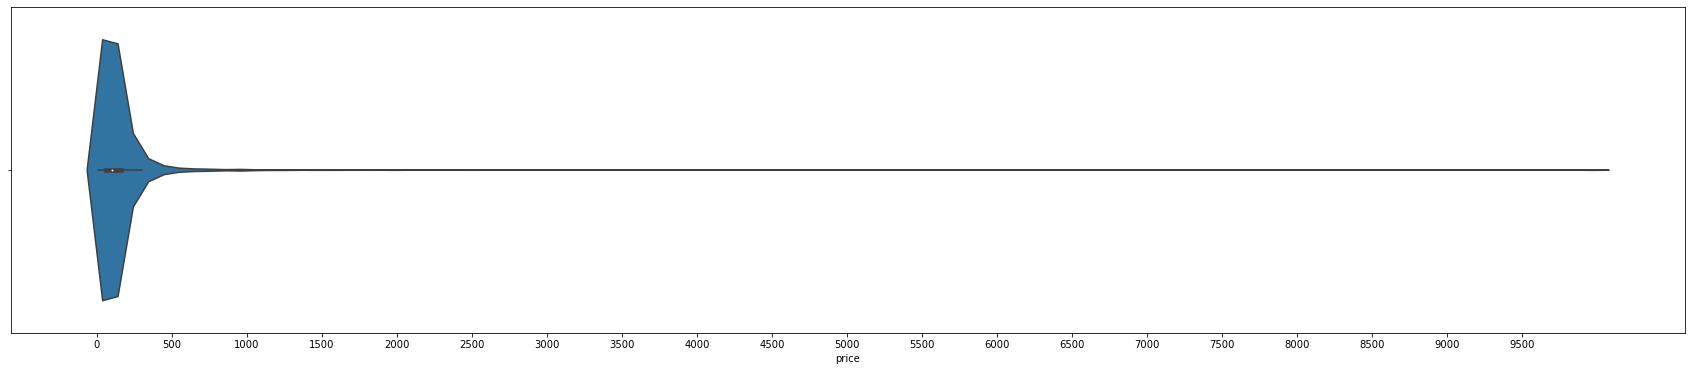

In [106]:
plt.figure(figsize=(30, 6),facecolor='w')
plt.xticks(np.arange(0,10000, step=500))
sns.violinplot('price',data=df, whis=1)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



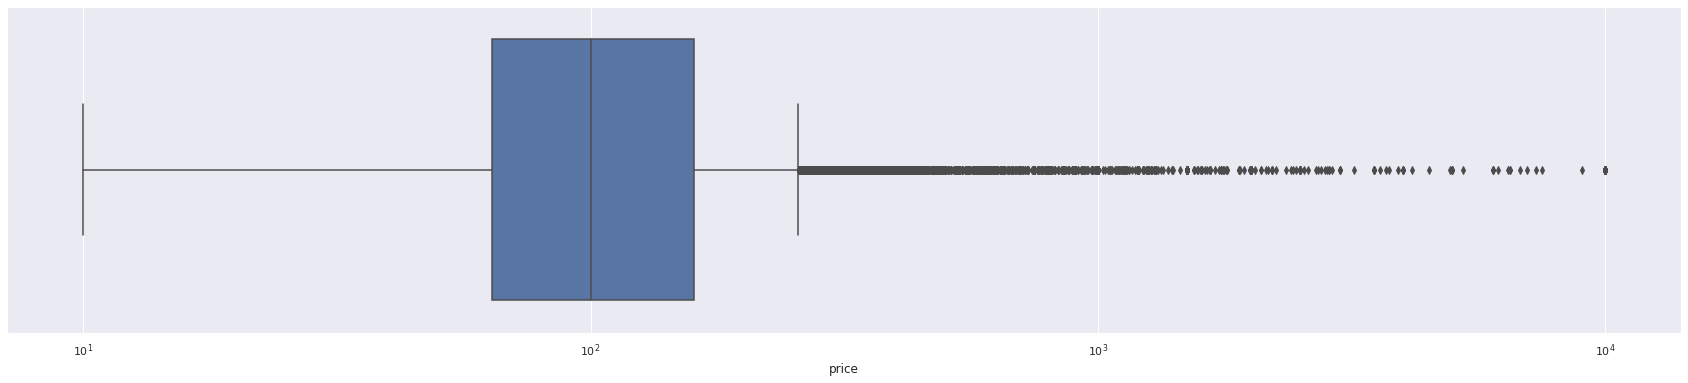

In [ ]:
plt.figure(figsize=(30, 6),facecolor='w')
plt.xticks(np.arange(0,10000))
plt.xscale('log')
sns.boxplot('price',data=df, whis=1)

In [178]:
price_filter_above1000 = df['price'] > 1000

pct_above1000 = df[price_filter_above1000]['price'].count()/df['price'].count()*100

print(f'{round(pct_above1000,3)}% of the listings in our dataset are priced above $1000')

0.621% of the listings in our dataset are priced above $1000


With an overwhelming majority of the listings in our dataset under $1000 (over 99%), it is unwise to conduct our exploration on the entirety of the dataset as these high-priced outliers may heavily skew our exploration. On the other hand, we don't want to exclude these high-priced listings in our ML model later on so we do need to conduct EDA on them.

With these two conditions in mind, we have decided to run two EDAs; one for low/med-priced listings and another for high-priced listings (> $1000).

Our hope is that running these two EDAs will allow us to develop two ML models, one for low-priced listings and another for high-priced listings.

### Splitting the Dataset

In [179]:
df1 = df[~price_filter_above1000]
df1['price'].describe()

count    44364.000000
mean       133.247560
std        117.724143
min         10.000000
25%         64.000000
50%        100.000000
75%        160.000000
max       1000.000000
Name: price, dtype: float64

In [180]:
df2 = df[price_filter_above1000]
df2['price'].describe()

count      277.000000
mean      2863.465199
std       2693.983614
min       1002.000000
25%       1250.000000
50%       1667.000000
75%       2800.000000
max      10000.000000
Name: price, dtype: float64

Prior to digging deeper into other variables, let's briefly take a look at the correlation between price and all the numerical columns.

With a large amount of variables, let's take a look at the 5 most correlated variables (note that we are using absolute values as we only want to see how correlated they are to price; we are not concerned with direction at this time).

In [ ]:
table = abs(df1.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with AirBnB price'}).set_index('variable').drop(index='price')).sort_values('correlation with AirBnB price', ascending=False)
table.head(5)

correlation with AirBnB price
variable                                                 
accommodates                                     0.476100
bedrooms                                         0.434592
beds                                             0.361808
bath_count                                       0.255605
stations_per_sq-mi_in_boro                       0.239423

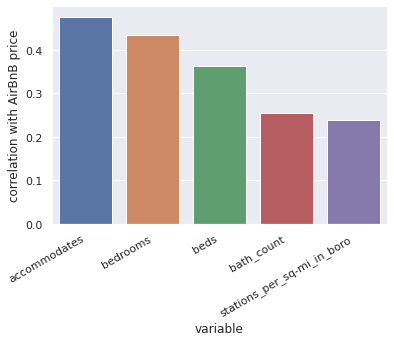

In [ ]:
fig = sns.barplot(data=table.reset_index().head(5), y='correlation with AirBnB price',x='variable')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={'figure.figsize':(10,8)})

For low-priced listings, the top 3 most correlated variables is the number of people the listing accomodates, the number of bedrooms, and the number of beds.

In [ ]:
table = abs(df2.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with AirBnB price'}).set_index('variable').drop(index='price')).sort_values('correlation with AirBnB price', ascending=False)
table.head(5)

correlation with AirBnB price
variable                                       
bedrooms                               0.250571
availability_365                       0.248423
amenities_count                        0.225577
maximum_nights                         0.221612
accommodates                           0.221097

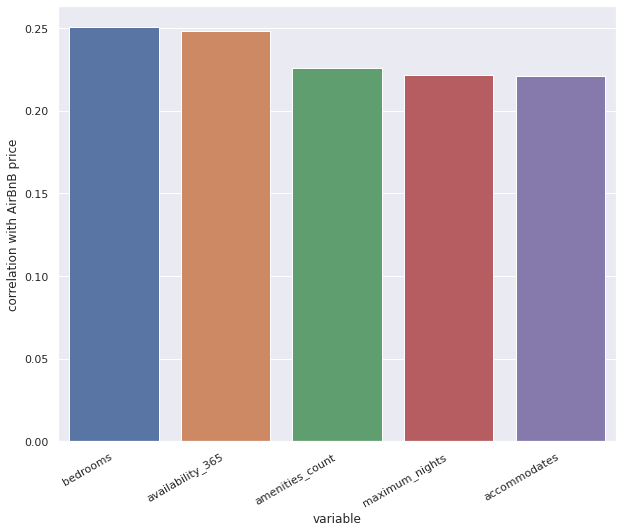

In [ ]:
fig = sns.barplot(data=table.reset_index().head(5), y='correlation with AirBnB price',x='variable')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right')
sns.set(rc={'figure.figsize':(10,8)})

For high-priced listings, the top 3 most correlated variables is the  number of bedrooms, availability_365, and the number of amenities. With that said, these values are low, so there may not be any significant relationship present. 

## Location Exploration

### Section Summary

While we did briefly take a look at price variations between neighborhoods, this project currently focuses at price variations at the borough-level. Even at this level, we see significant price variations across the boroughs at both price levels. 

First, it seems that most listings are located in Manhattan, followed by Brooklyn, then Queens. This is the case across both high and low-priced listings.

#### Low-Price Listings Takeaways:
* The mean price is always higher than the median price across all five boroughs, likely due to an uneven distribution of prices.
* On average, Manhattan has the highest priced low-priced listings, followed by Brooklyn and Staten Island.
* When trying to explain these variations with external data, it seems that transportation accessibility and property sale prices are good indicators of the price variations, both yielding high correlation values upwards of 80%.

#### High-Price Listings Takeaways:
It should be noted that most of the data points for listings above $1000 are located in Manhattan, with only one high-priced listing in Staten Island and Bronx. You could infer that the N size is too small to reach any concrete conclusions for high-priced listngs.


* As before, the mean price is always higher than the median price across all five boroughs (except for Staten Island and Bronx because of the reason stated above), likely due to an uneven distribution of prices.
* On average, Queens has the highest priced high-priced listings, followed by Manhattan and Brooklyn.
* When trying to explain these variations with external data, it seems that property sale prices (controlled for size) is a decent indicator of the price variations, yielding high correlation values upwards of 75%.
    * Transportation accessibility (represented by the number subway stations in a borough) no longer becomes a good explanation for high-priced listings. It might be worth considering another measure of transportation accessibility, as we hypothesize that the type of people booking $1000+/night AirBnB listings don't tend to use the NY MTA.

#### Areas of potential improvement:
* With a more robust dataset with more variables, we could control for other variables when analyzing price across locations (e.g. for low-priced listings, the number of people the listing accomodates could acts as a good control variable)
* Using subways as an indicator could be done at a more granular level. The subway station dataset and AirBnB dataset has coordinates data; so it may be possible to calculate the number of subway stations close to any given listing. However, this is a very exhaustive process and may not be possible due to the time limitations of this project.
* The original property sales dataset also has information on the property's neighborhood. Given a more time, we could run an analysis at the neighborhood-level.

In [113]:
# Initializing color scheme for boroughs
boro_colors = {'Manhattan': "#CC1433", 'Brooklyn': "#5998C5", 'Queens': "#8E7DBE", 'Bronx':'#ffbd00', 'Staten Island': '#49802B'}

### Low-Priced Listings

This section will cover initial EDA on AirBnB listings priced under $1000, so we will be using `df1` as seperated in the Price EDA section.

Let's take a look at what we're working with:

In [ ]:
cols = ['borough','neighbourhood']
df1[cols].describe()

borough neighbourhood
count       44364         44364
unique          5           221
top     Manhattan  Williamsburg
freq        19509          3292

It seems that Manhttan is the borough with the most listings with over 19,500 listings, while Williamburg, Brooklyn is the neighbourhood with the most listings with ~3000.

Let's see if we can visualize these insights:

Text(0.5, 0, 'Number of Listings')

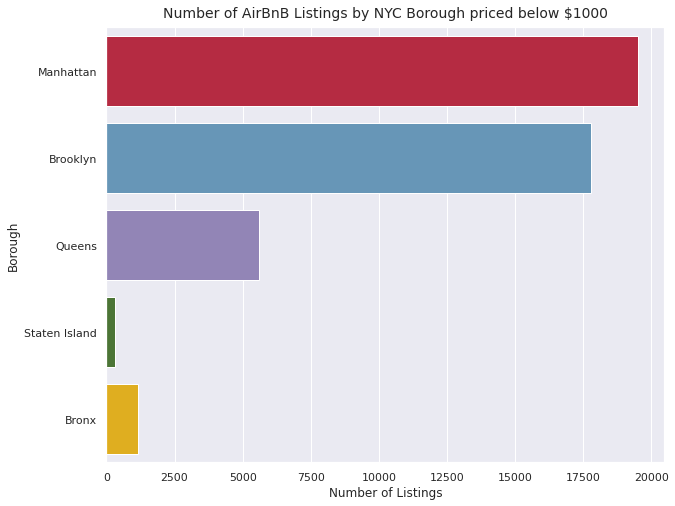

In [ ]:
order = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=df1,y='borough',order=order, palette=boro_colors)

plt.title('Number of AirBnB Listings by NYC Borough priced below $1000', fontdict={'fontsize':14} ,pad=10)
plt.ylabel('Borough')
plt.xlabel('Number of Listings')

----

#### Location and Price Relationship

Since our project will try to predict prices, we will look into the potential relationship between the location, at the borough-level, and the price of the listings.

Let's take a look at the descriptive statistics:

In [ ]:
df1.groupby('borough')['price'].describe().sort_values('mean',ascending=False)

count        mean         std  ...    50%    75%      max
borough                                         ...                       
Manhattan      19509.0  164.278802  135.194228  ...  125.0  199.0  1000.00
Brooklyn       17801.0  114.534624   95.169787  ...   90.0  140.0  1000.00
Staten Island    313.0  109.160192  105.476808  ...   79.0  125.0   850.00
Queens          5584.0   94.636343   94.079547  ...   70.0  108.0  1000.00
Bronx           1157.0   90.779844   86.003094  ...   67.0  100.0   992.14

[5 rows x 8 columns]

**Quick Insights:**
* For all five boroughs, the mean is higher than the median.
* Staten Island, with the fewest number of listings, has the smallest price range
* Manhattan has the highest average price but also the largest deviations
* Bronx is the complete opposite with lowest average price and smallest deviations
* For all five boroughs, there is a significant increase in prices from the top 25% percentile to the max price (capped at $1000 due to the pre-defined scope).
    * This may explain the large standard deviations (compared to average values)

Text(0.5, 8.95999999999998, 'Borough')

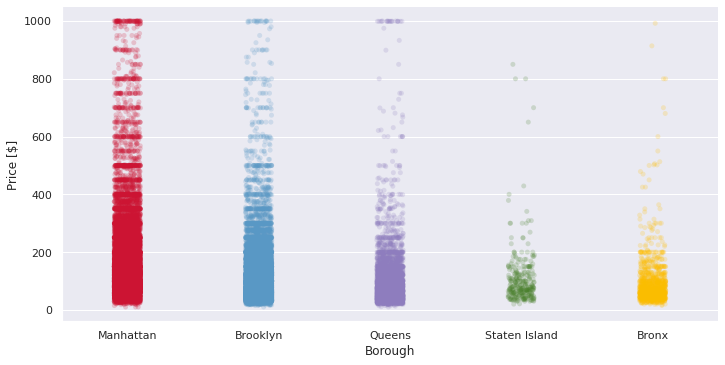

In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.catplot(data=df1, y='price',x='borough',alpha=0.2, aspect=2, palette=boro_colors)
plt.ylabel('Price [$]')
plt.xlabel('Borough')

Text(0.5, 0, 'Borough')

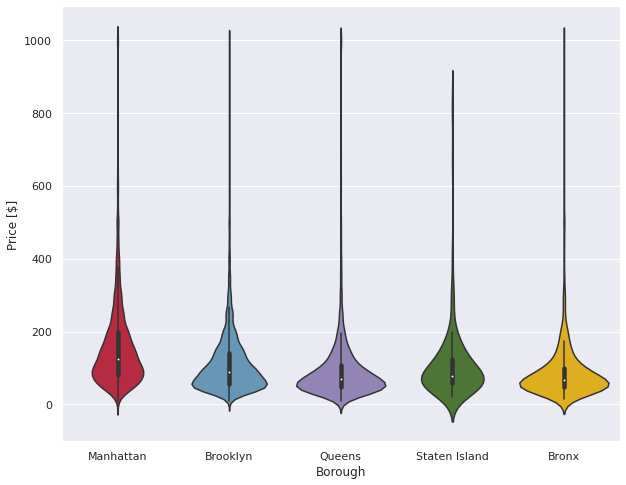

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.violinplot(y = 'price',data=df1, x='borough', palette=boro_colors)
plt.ylabel('Price [$]')
plt.xlabel('Borough')

Text(0.5, 0, 'Borough')

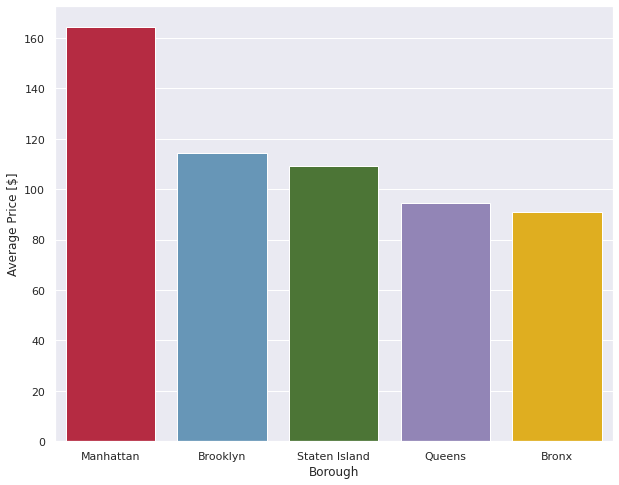

In [ ]:
fig = df1.groupby('borough')['price'].agg({'mean'}).reset_index().sort_values('mean', ascending=False)
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(y='mean', x='borough', ci=None, data=fig, palette=boro_colors) #,kind='bar')
plt.ylabel('Average Price [$]')
plt.xlabel('Borough')

In [ ]:
# getting a list of boroughs
boro = list(df1['borough'].unique())

# displaying most expensive neighborhoods in each borough
for b in boro:
    display(df1[df1['borough']==b].pivot_table(values='price', index=['borough','neighbourhood'],\
                                               aggfunc='mean').sort_values('price', ascending=False).head(3))

price
borough   neighbourhood                
Manhattan Tribeca            299.585714
          Battery Park City  255.567500
          SoHo               250.471651

price
borough  neighbourhood            
Brooklyn Vinegar Hill   216.615385
         Sea Gate       186.846154
         DUMBO          185.013030

price
borough neighbourhood              
Queens  Neponsit         275.000000
        Breezy Point     228.666667
        Jamaica Estates  226.421053

price
borough       neighbourhood        
Staten Island Fort Wadsworth  800.0
              Woodrow         700.0
              Prince's Bay    397.5

price
borough neighbourhood         
Bronx   Riverdale      248.600
        Fieldston      170.414
        Eastchester    162.000

-----------

### High-Priced Listings

Next, let's conduct the same exploration for higher-priced listings. For this we will be using `df2` as our dataset:

In [ ]:
cols = ['borough','neighbourhood']
df2[cols].describe()

borough neighbourhood
count         277           277
unique          5            57
top     Manhattan       Midtown
freq          209            35

It seems that Manhattan is still the borough with the most listings in this case. Midtown, Manhattan has overthrown Williamsburg as the neighbourhood with the most listings.

Text(0.5, 0, 'Number of Listings')

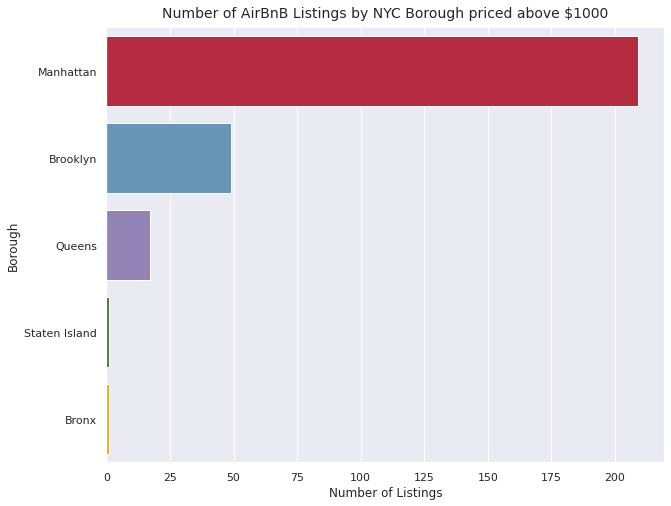

In [ ]:
sns.countplot(data=df2, y='borough',order=order,palette=boro_colors)
plt.title('Number of AirBnB Listings by NYC Borough priced above $1000', fontdict={'fontsize':14} ,pad=10) 
plt.ylabel('Borough')
plt.xlabel('Number of Listings')

----

#### Location and Price Relationship

Like before, let's explore the relationship between these two variables for expensive listings.

In [ ]:
df2.groupby('borough')['price'].describe().sort_values('mean',ascending=False)

count         mean          std  ...     50%     75%      max
borough                                         ...                         
Queens          17.0  3144.058824  3150.259780  ...  1800.0  2350.0  10000.0
Manhattan      209.0  3003.118947  2827.315439  ...  1667.0  2900.0  10000.0
Brooklyn        49.0  2234.183673  1778.864463  ...  1550.0  2429.0  10000.0
Bronx            1.0  1404.000000          NaN  ...  1404.0  1404.0   1404.0
Staten Island    1.0  1200.000000          NaN  ...  1200.0  1200.0   1200.0

[5 rows x 8 columns]

**Quick Insights:**
* Bronx and Staten Island each only have one listing priced above $1000
* For the boroughs with more than one listing, the mean values are higher than the median
* Queens has the highest average price but also the largest deviations
* For all five boroughs, there is a significant increase in prices from the top 25% percentile to the max price.
    * This may explain the large standard deviations (compared to average values) and why the averages are higher than the medians

Text(0.5, 8.95999999999998, 'Borough')

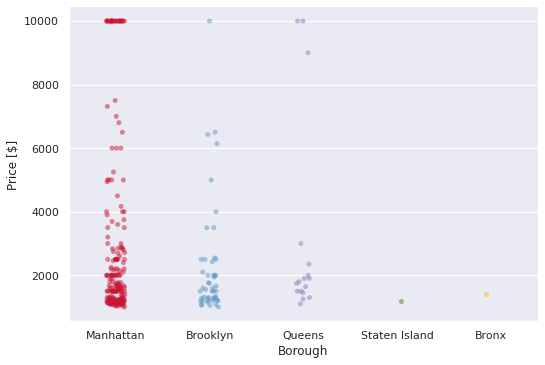

In [ ]:
sns.set(rc={'figure.figsize':(10,15)})
sns.catplot(data=df2, y='price',x='borough',alpha=0.5, aspect=1.5, palette=boro_colors)
plt.ylabel('Price [$]')
plt.xlabel('Borough')

Text(0.5, 0, 'Borough')

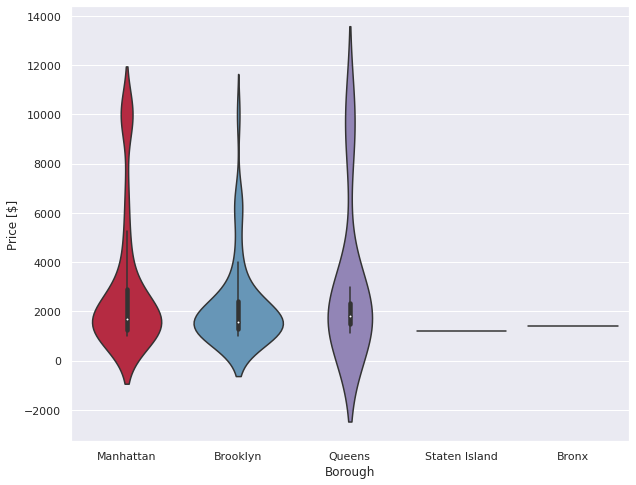

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.violinplot(y = 'price',data=df2, x='borough', palette=boro_colors)
plt.ylabel('Price [$]')
plt.xlabel('Borough')

The two graphs show that distributions seem to vary across listings. Additionally, with very few data points in Queens, it gives the impression that the price distribution in Queens is not as concentrated as Manhattan or Brooklyn.

It's also worth noting that Manhattan has a few lisitngs hitting the max, which seems to be capped at $10,000 (likely by AirBnB).

Text(0.5, 0, 'Borough')

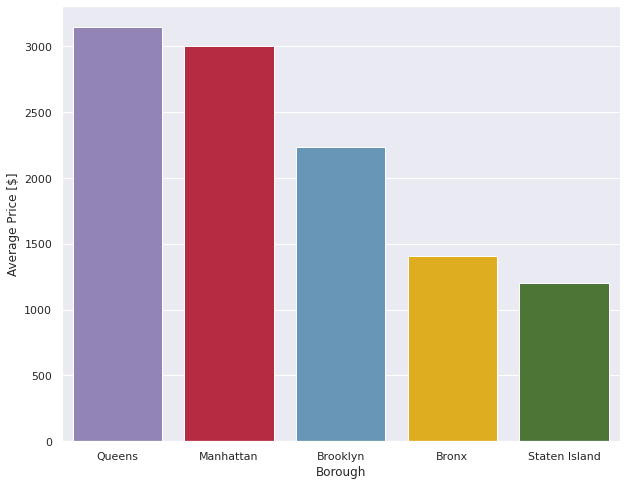

In [ ]:
fig = df2.groupby('borough')['price'].agg({'mean'}).reset_index().sort_values('mean', ascending=False)
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(y='mean', x='borough', ci=None, data=fig, palette=boro_colors) #,kind='bar')
plt.ylabel('Average Price [$]')
plt.xlabel('Borough')

In [ ]:
# getting a list of boroughs
boro = list(df2['borough'].unique())

# displaying most expensive neighborhoods in each borough
for b in boro:
    display(df2[df2['borough']==b].pivot_table(values='price', index=['borough','neighbourhood'],\
                                               aggfunc='mean').sort_values('price', ascending=False).head(3))

price
borough   neighbourhood                  
Manhattan Financial District  8299.200000
          Lower East Side     5072.500000
          East Harlem         4199.833333

price
borough  neighbourhood         
Brooklyn Cypress Hills  5714.50
         Greenpoint     3817.75
         Clinton Hill   3020.00

price
borough neighbourhood            
Queens  Briarwood         5250.00
        Long Island City  3837.25
        Astoria           3662.75

price
borough       neighbourhood        
Staten Island St. George     1200.0

price
borough neighbourhood        
Bronx   Fieldston      1404.0

### Looking into Supplemental Datasets

Similar to our BA775 project, we will explore why there are variations in prices among the locations.

For this project, we will continue to look at:
* transportation accessibility (indicated by the number of subway stations in the borough)
* cost of living (indicated by property sale prices in the borough)

We will exclude exploration around crime data since our previous project showed little to no correlation.

----

#### Transportation Accessibility (i.e. Subway Station count)

As seen 

In [ ]:
df1.head()

id  ... property_price_per_sqft
0  2595  ...              486.408059
1  5178  ...              486.408059
2  5203  ...              486.408059
3  5552  ...              486.408059
4  6021  ...              486.408059

[5 rows x 55 columns]

In [110]:
cols = ['Station_count', 'stations_per_capita_in_boro','stations_per_sq-mi_in_boro']

In [111]:
df1.groupby('borough')[cols].mean().sort_values('stations_per_capita_in_boro',ascending=False)

Station_count  stations_per_capita_in_boro  \
borough                                                     
Manhattan                153                    96.476830   
Brooklyn                 169                    67.473150   
Bronx                     70                    50.537575   
Staten Island             21                    44.801912   
Queens                    83                    37.207684   

               stations_per_sq-mi_in_boro  
borough                                    
Manhattan                        6.701708  
Brooklyn                         2.386332  
Bronx                            1.662708  
Staten Island                    0.359774  
Queens                           0.764766

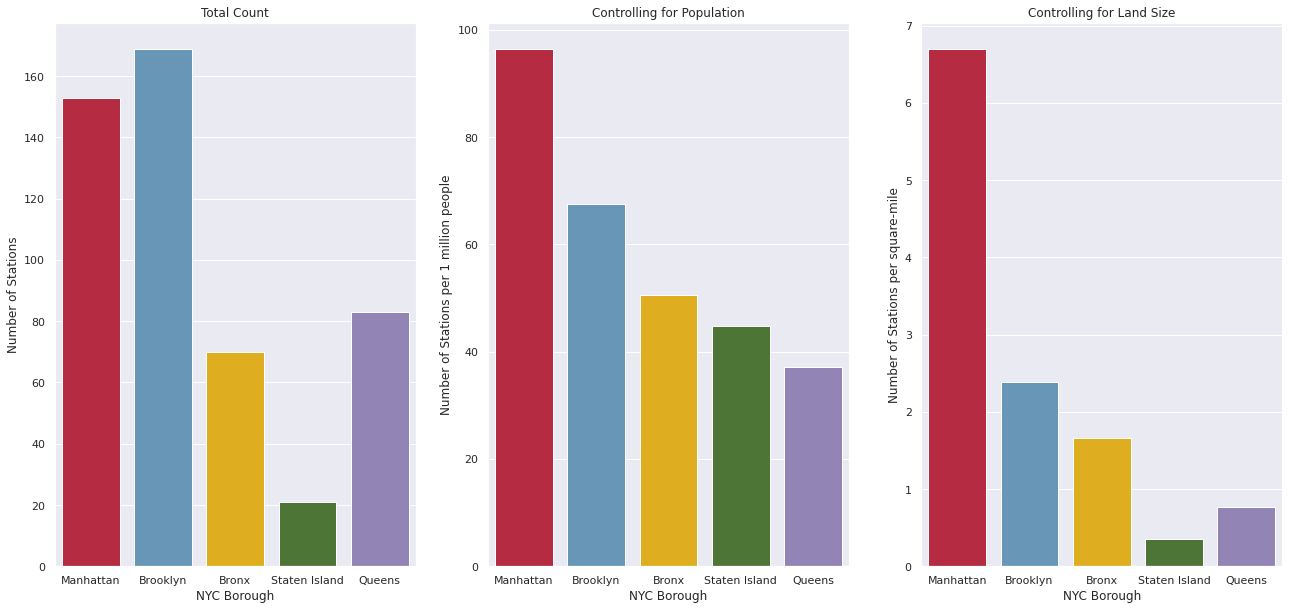

In [114]:
g = df1.groupby('borough')[cols].mean().sort_values('stations_per_capita_in_boro',ascending=False).reset_index()
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size

count = sns.barplot(y='Station_count',x='borough',data=g, ax=ax[0], palette=boro_colors)
count.set(ylabel='Number of Stations', xlabel = 'NYC Borough', title='Total Count')

count_per_cap = sns.barplot(y='stations_per_capita_in_boro',x='borough',data=g, ax=ax[1], palette=boro_colors)
count_per_cap.set(ylabel='Number of Stations per 1 million people', xlabel = 'NYC Borough', title='Controlling for Population')

count_per_sqmi = sns.barplot(y='stations_per_sq-mi_in_boro',x='borough',data=g, ax=ax[2], palette=boro_colors)
count_per_sqmi.set(ylabel='Number of Stations per square-mile', xlabel = 'NYC Borough', title='Controlling for Land Size')

sns.set(rc={'figure.figsize':(22,10)})  # Figure size

##### Low Price Listings

In [ ]:
cols = ['Station_count', 'stations_per_capita_in_boro',
       'stations_per_sq-mi_in_boro','price','borough']

listing_count = df1.groupby('borough')['price'].count().reset_index().rename(columns={'price':'Listing Count'})
g = df1[cols].groupby('borough').mean().reset_index().merge(listing_count, on='borough')

In [ ]:
g

borough  Station_count  ...       price  Listing Count
0          Bronx             70  ...   90.779844           1157
1       Brooklyn            169  ...  114.534624          17801
2      Manhattan            153  ...  164.278802          19509
3         Queens             83  ...   94.636343           5584
4  Staten Island             21  ...  109.160192            313

[5 rows x 6 columns]

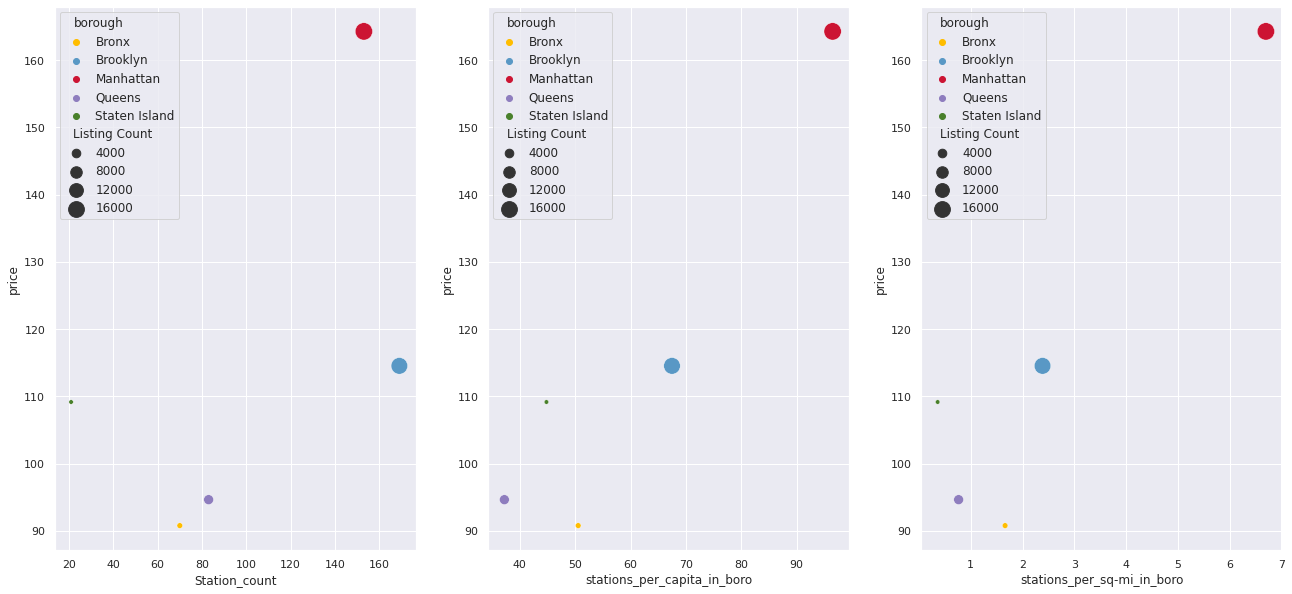

In [ ]:
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(15,10)})  # Figure size
sns.scatterplot(x='Station_count',y='price',data=g, ax=ax[0], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
sns.scatterplot(x='stations_per_capita_in_boro',y='price',data=g, ax=ax[1], hue= 'borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
sns.scatterplot(x='stations_per_sq-mi_in_boro',y='price',data=g, ax=ax[2], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)

It seems that there is a correlation between the average price of listings and the number of subway stations (especially when controlling for population or land size).

Let's see what that correlation coefficients are and what that might look like in a regression plot:

In [ ]:
g.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with price'}).\
set_index('variable').drop(index='price')

correlation with price
variable                                           
Station_count                              0.570624
stations_per_capita_in_boro                0.927803
stations_per_sq-mi_in_boro                 0.918565
Listing Count                              0.763147

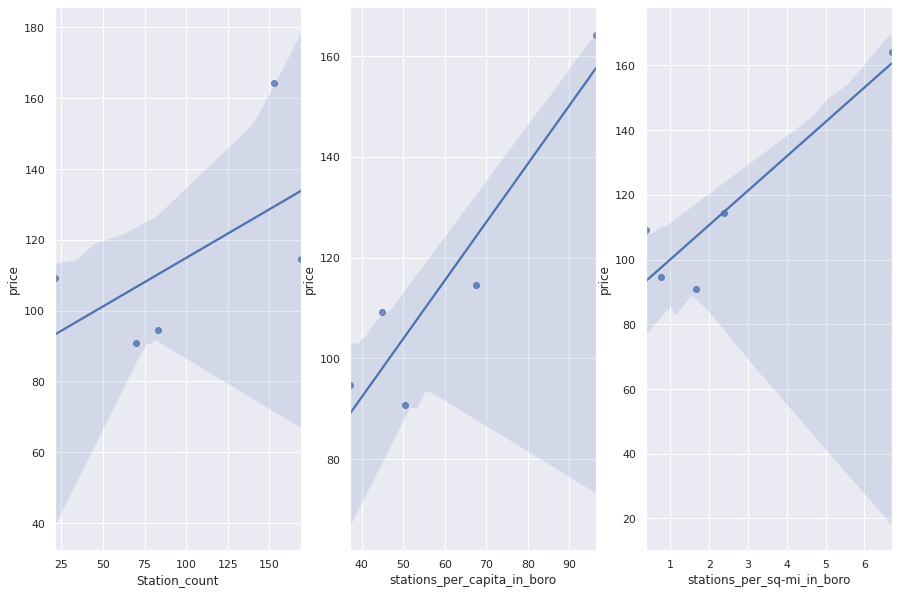

In [ ]:
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size
sns.regplot(x='Station_count',y='price',data=g, ax=ax[0],)
sns.regplot(x='stations_per_capita_in_boro',y='price',data=g, ax=ax[1])
sns.regplot(x='stations_per_sq-mi_in_boro',y='price',data=g, ax=ax[2])

##### High Price Listings

In [ ]:
cols = ['Station_count', 'stations_per_capita_in_boro',
       'stations_per_sq-mi_in_boro','price','borough']
listing_count = df2.groupby('borough')['price'].count().reset_index().rename(columns={'price':'Listing Count'})
g = df2[cols].groupby('borough').mean().reset_index().merge(listing_count, on='borough')

In [ ]:
g

borough  Station_count  ...        price  Listing Count
0          Bronx             70  ...  1404.000000              1
1       Brooklyn            169  ...  2234.183673             49
2      Manhattan            153  ...  3003.118947            209
3         Queens             83  ...  3144.058824             17
4  Staten Island             21  ...  1200.000000              1

[5 rows x 6 columns]

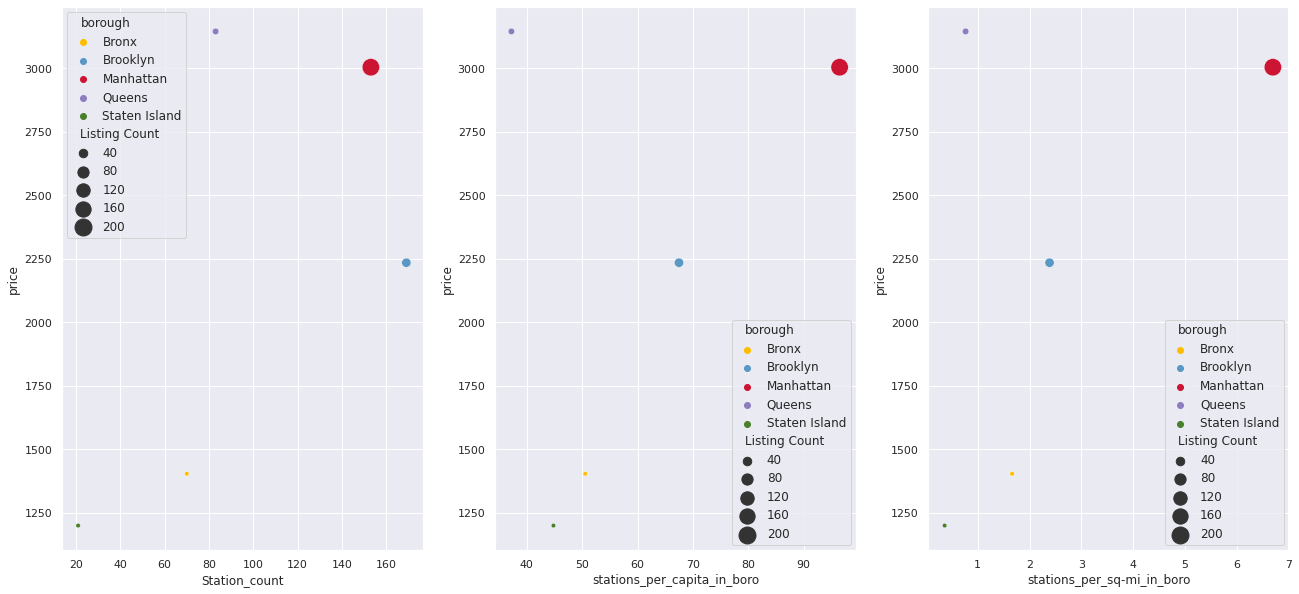

In [ ]:
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(15,10)})  # Figure size
sns.scatterplot(x='Station_count',y='price',data=g, ax=ax[0], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
sns.scatterplot(x='stations_per_capita_in_boro',y='price',data=g, ax=ax[1], hue= 'borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
sns.scatterplot(x='stations_per_sq-mi_in_boro',y='price',data=g, ax=ax[2], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)

The scatter plots show that the correlation has disappeared. Let's confirm that with a correlation coefficient table and regression plot.

In [ ]:
g.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with price'}).\
set_index('variable').drop(index='price')

correlation with price
variable                                           
Station_count                              0.604132
stations_per_capita_in_boro                0.366211
stations_per_sq-mi_in_boro                 0.500844
Listing Count                              0.588493

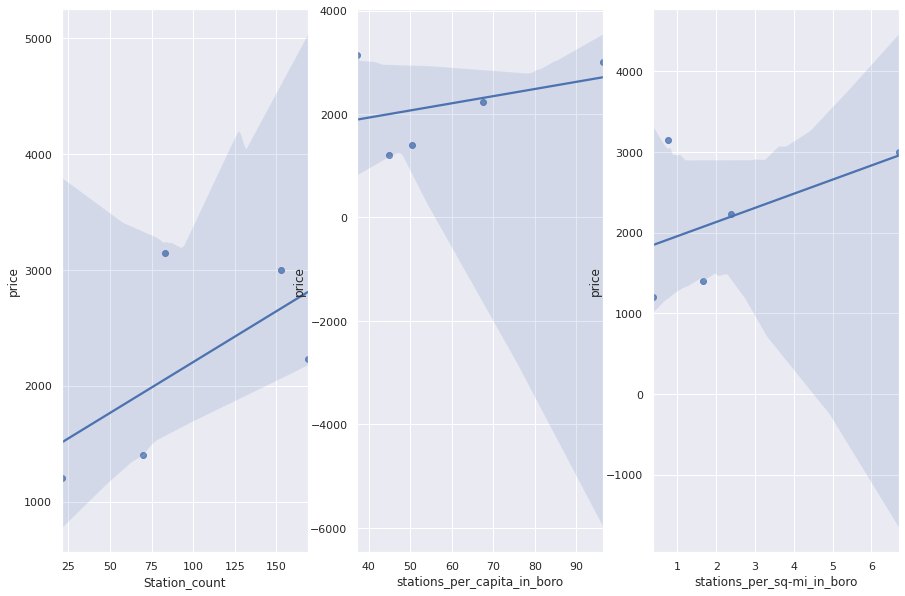

In [ ]:
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size
sns.regplot(x='Station_count',y='price',data=g, ax=ax[0],)
sns.regplot(x='stations_per_capita_in_boro',y='price',data=g, ax=ax[1])
sns.regplot(x='stations_per_sq-mi_in_boro',y='price',data=g, ax=ax[2])

Our suspicion was correct–there seems to be a significant decrease in correlation. It seems that the expensive listings in Queens is throwing off our correlations. Out of curiosity, let's see what happnes when we filter Queens out.

In [ ]:
new_g = g.set_index('borough').drop(index='Queens').reset_index()
new_g

borough  Station_count  ...        price  Listing Count
0          Bronx             70  ...  1404.000000              1
1       Brooklyn            169  ...  2234.183673             49
2      Manhattan            153  ...  3003.118947            209
3  Staten Island             21  ...  1200.000000              1

[4 rows x 6 columns]

In [ ]:
new_g.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with price'}).\
set_index('variable').drop(index='price')

correlation with price
variable                                           
Station_count                              0.870305
stations_per_capita_in_boro                0.989296
stations_per_sq-mi_in_boro                 0.945796
Listing Count                              0.940513

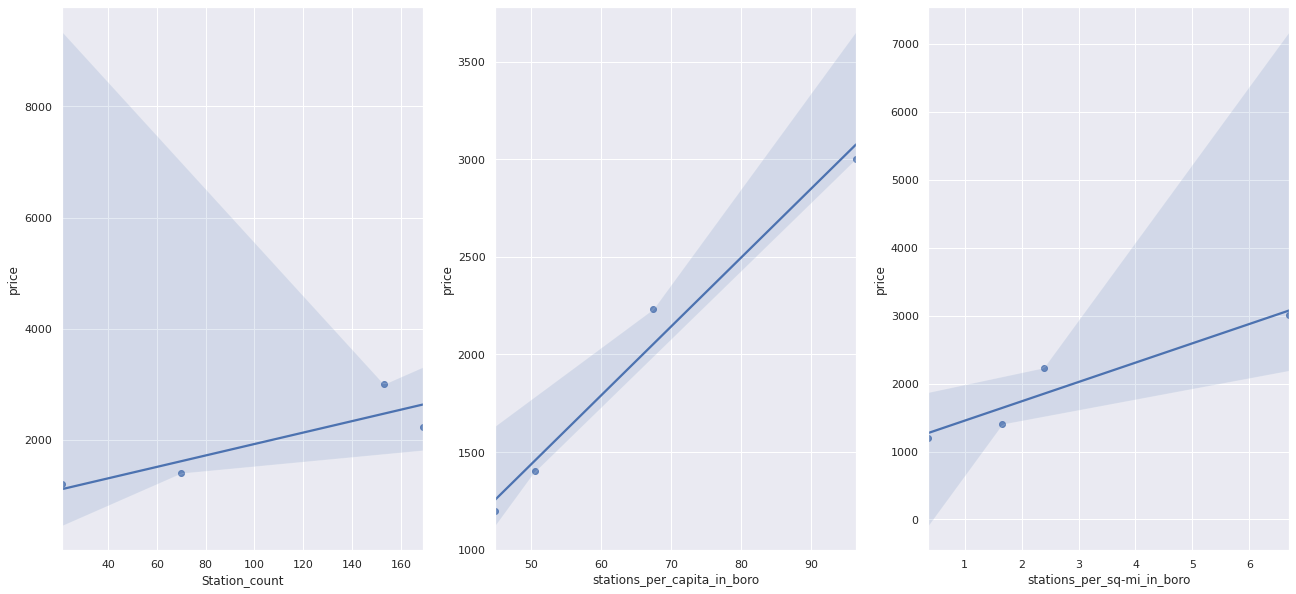

In [ ]:
fig, ax = plt.subplots(1,3)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size
sns.regplot(x='Station_count',y='price',data=new_g, ax=ax[0],)
sns.regplot(x='stations_per_capita_in_boro',y='price',data=new_g, ax=ax[1])
sns.regplot(x='stations_per_sq-mi_in_boro',y='price',data=new_g, ax=ax[2])

Our suspicion that Queens was throwing off the correlation was correct. We may be tempted to remove Queens as a datapoint in our exploration but if we do that, we won't be able to include expensive listings located in Queens in future iterations of our model.

Therefore, we have to conclude that either...
* transportation accessibility is not a good predictor of price for expensive listings
* the number of subway stations are not a good predictor of transportation accessibility for expensive listings

We suspect it is the latter, because the types of people who rent listings price above $1000 a day are unlikely to be the type or people to take the subway. We may need to utilize an alternative variable to measure transportation accessibility.

Ultimately, we will opt to exclude this variable for our model for expensive listings.

#### Cost of Living (i.e. Property Sale Prices)

We will now look at how property sale prices affect the average listing prices across the five boroughs.

Source: https://www.kaggle.com/new-york-city/nyc-property-sales



In [ ]:
cols = ['property_price', 'property_price_per_sqft']

In [ ]:
round(df1.groupby('borough')[cols].mean().sort_values('property_price',ascending=False),2)

property_price  property_price_per_sqft
borough                                               
Manhattan         18558077.47                   486.41
Queens              912305.46                   306.40
Brooklyn            834488.37                   324.66
Bronx               590193.64                   130.45
Staten Island       528603.83                   223.59

[Text(0, 0.5, 'Average Property Price per sqft [$]'),
 Text(0.5, 0, 'NYC Borough'),
 Text(0.5, 1.0, 'Controlling for Population')]

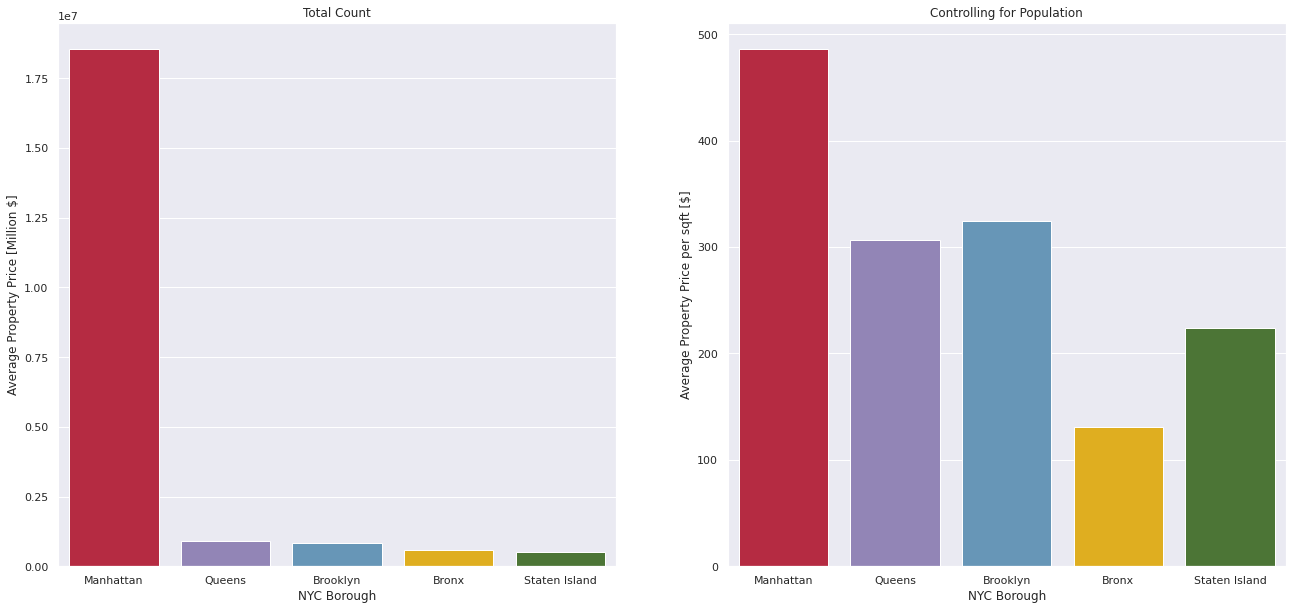

In [ ]:
g = round(df1.groupby('borough')[cols].mean().sort_values('property_price',ascending=False).reset_index(),2)
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size

count = sns.barplot(y='property_price',x='borough',data=g, ax=ax[0], palette=boro_colors)
count.set(ylabel='Average Property Price [Million $]', xlabel = 'NYC Borough', title='Total Count')

count_per_cap = sns.barplot(y='property_price_per_sqft',x='borough',data=g, ax=ax[1], palette=boro_colors)
count_per_cap.set(ylabel='Average Property Price per sqft [$]', xlabel = 'NYC Borough', title='Controlling for Population')

##### Low Price Listings

In [ ]:
cols = ['property_price', 'property_price_per_sqft','price','borough']

listing_count = df1.groupby('borough')['price'].count().reset_index().rename(columns={'price':'Listing Count'})
g = round(df1[cols].groupby('borough').mean().reset_index().merge(listing_count, on='borough'),2)

In [ ]:
g

borough  property_price  ...   price  Listing Count
0          Bronx       590193.64  ...   90.78           1157
1       Brooklyn       834488.37  ...  114.53          17801
2      Manhattan     18558077.47  ...  164.28          19509
3         Queens       912305.46  ...   94.64           5584
4  Staten Island       528603.83  ...  109.16            313

[5 rows x 5 columns]

[Text(0, 0.5, 'Average AirBnB Listing Price[$ per night]'),
 Text(0.5, 0, 'Average Property Value per sqft [$]')]

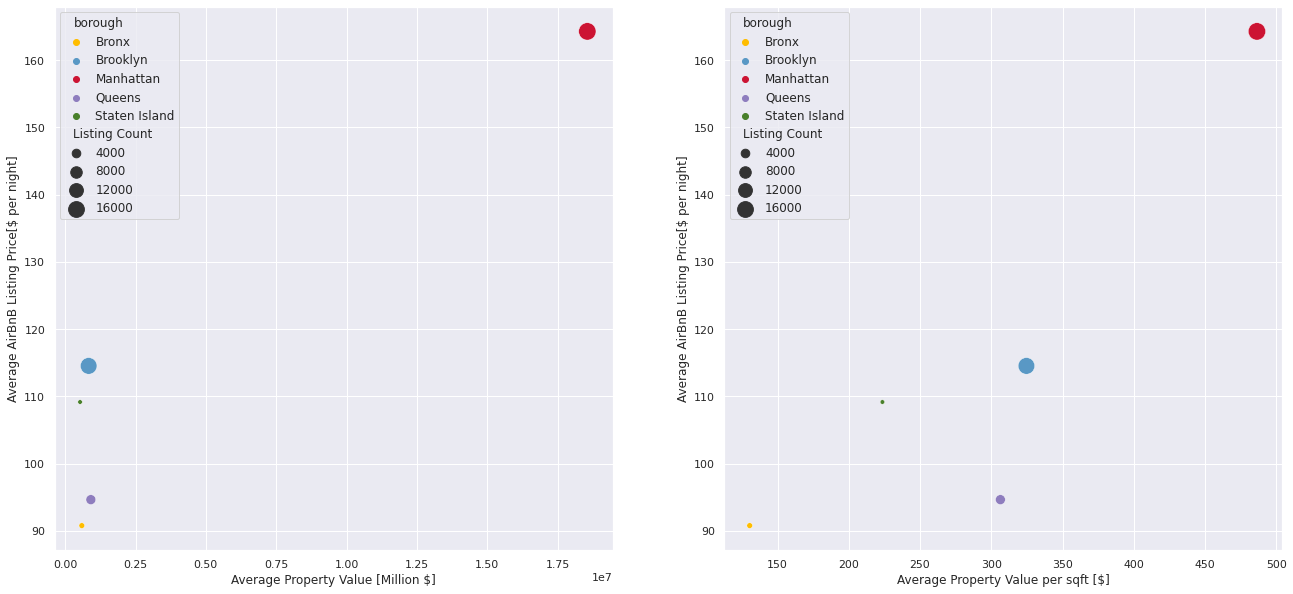

In [ ]:
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(15,10)})  # Figure size
A = sns.scatterplot(x='property_price',y='price',data=g, ax=ax[0], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
B = sns.scatterplot(x='property_price_per_sqft',y='price',data=g, ax=ax[1], hue= 'borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)

A.set(ylabel='Average AirBnB Listing Price[$ per night]', xlabel = 'Average Property Value [Million $]')
B.set(ylabel='Average AirBnB Listing Price[$ per night]', xlabel = 'Average Property Value per sqft [$]')

It seems that there is a correlation between the average price of listings and the average property values in the boroughs.

Let's see what that correlation coefficients are and what that might look like in a regression plot:

In [ ]:
g.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with AirBnB price'}).\
set_index('variable').drop(index=['price','Listing Count'])

correlation with AirBnB price
variable                                              
property_price                                0.942246
property_price_per_sqft                       0.873786

[Text(0, 0.5, 'Average AirBnB Listing Price [$ per night]'),
 Text(0.5, 0, 'Average Property Value per sqft [$]')]

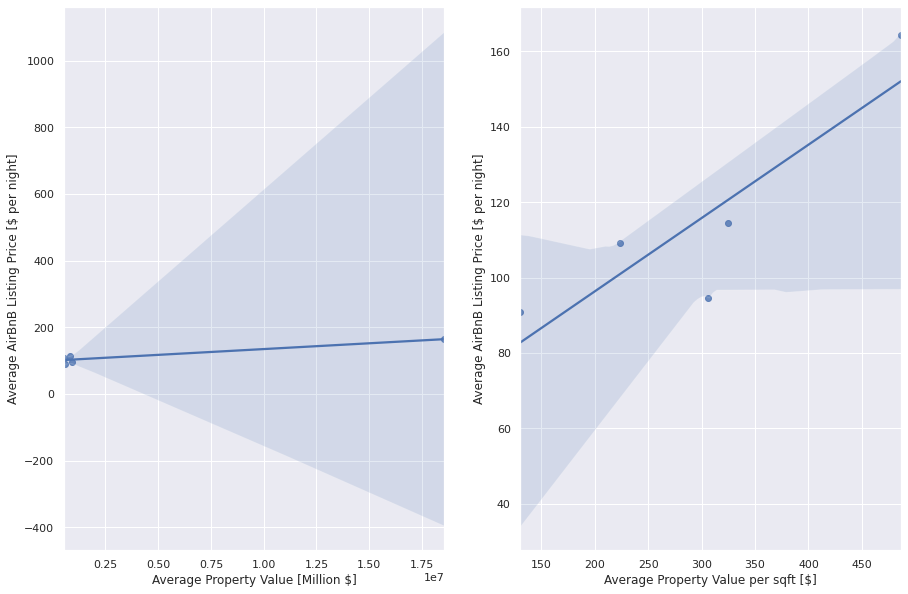

In [ ]:
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size
A =sns.regplot(x='property_price',y='price',data=g, ax=ax[0])
B = sns.regplot(x='property_price_per_sqft',y='price',data=g, ax=ax[1])

A.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value [Million $]')
B.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value per sqft [$]')


While it makes sense that a correlation is present between these variables, it's interesting to note that there's a higher correlation between average property values over the values per sqft (controlling for size).

##### High Price Listings

In [ ]:
cols = ['property_price', 'property_price_per_sqft','price','borough']

listing_count = df2.groupby('borough')['price'].count().reset_index().rename(columns={'price':'Listing Count'})
g = round(df2[cols].groupby('borough').mean().reset_index().merge(listing_count, on='borough'),2)

In [ ]:
g

borough  property_price  ...    price  Listing Count
0          Bronx       590193.64  ...  1404.00              1
1       Brooklyn       834488.37  ...  2234.18             49
2      Manhattan     18558077.47  ...  3003.12            209
3         Queens       912305.46  ...  3144.06             17
4  Staten Island       528603.83  ...  1200.00              1

[5 rows x 5 columns]

[Text(0, 0.5, 'Average AirBnB Listing Price [$ per night]'),
 Text(0.5, 0, 'Average Property Value per sqft [$]')]

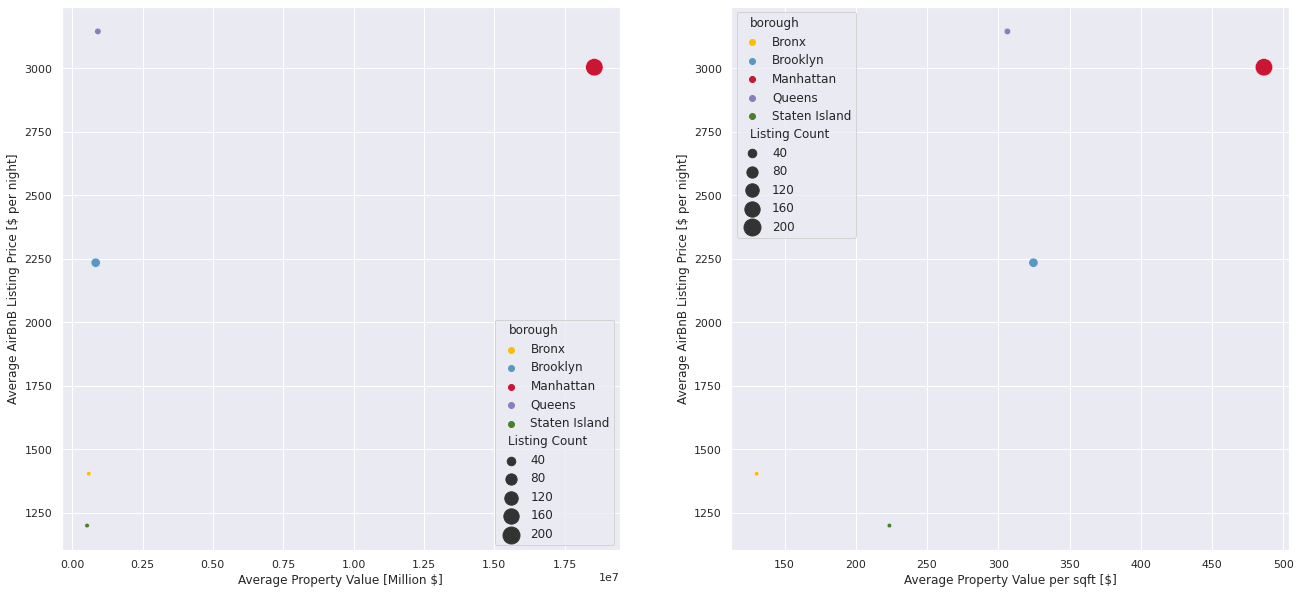

In [ ]:
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(15,10)})  # Figure size

A =sns.scatterplot(x='property_price',y='price',data=g, ax=ax[0], hue='borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)
B =sns.scatterplot(x='property_price_per_sqft',y='price',data=g, ax=ax[1], hue= 'borough',size='Listing Count',sizes=(20,300),legend='brief', palette=boro_colors)

A.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value [Million $]')
B.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value per sqft [$]')

It seems that there is a correlation between the average price of listings and the average property values (controlled for size).

Let's see what that correlation coefficients are and what that might look like in a regression plot:

In [ ]:
g.corr()['price'].reset_index().rename(columns={'index':'variable','price':'correlation with AirBnB price'}).\
set_index('variable').drop(index=['price','Listing Count'])

correlation with AirBnB price
variable                                              
property_price                                0.522767
property_price_per_sqft                       0.781841

[Text(0, 0.5, 'Average AirBnB Listing Price [$ per night]'),
 Text(0.5, 0, 'Average Property Value per sqft [$]')]

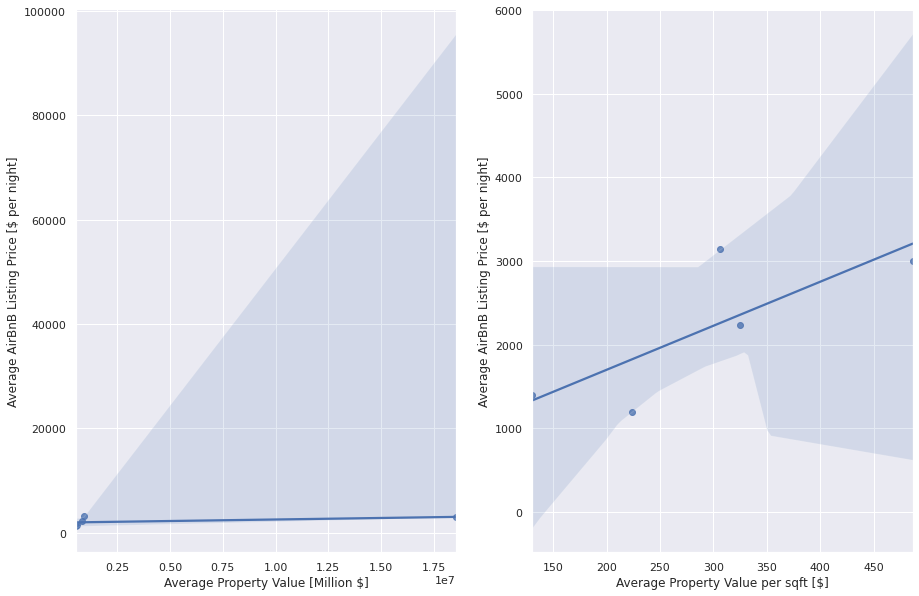

In [ ]:
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(22,10)})  # Figure size
A = sns.regplot(x='property_price',y='price',data=g, ax=ax[0])
B = sns.regplot(x='property_price_per_sqft',y='price',data=g, ax=ax[1])

A.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value [Million $]')
B.set(ylabel='Average AirBnB Listing Price [$ per night]', xlabel = 'Average Property Value per sqft [$]')

So far it seems that the average property value per sqft has been the best explanation for the price variations across the boroughs for high-priced AirBnB listings.

----

## Host Exploration

Do characteristics of the host have any relation to the price? We could hypothesize that higher quality hosts (i.e. superhosts with high response rates) could charge higher prices for their listings, but let's see if that's the case.

### Section Summary

Based on our EDA, there doesn't seem to be much correlation between the host's statistics and information against the price of the listings for both low and high-priced listings.

For both low and high-priced listings, hosts tend to have profile pictures and verified identities, and most hosts are not superhosts. These categorical values have no correlation to the price of listings.

The same distribution pattern exists in the numerical variables, where host response and acceptance rates tend to be high, while host listing counts tend to be low. Again, no correlation seems to be present between these variables and the listing price.

Considering the low correlation values of these host variables, we will not include them in the predictive ML model.

**Areas of Improvement:**
* It may be worth seeing if there is a correlation between the response and acceptance rates when we remove the 0-values that are dragging down the average rates (both low and high-priced listings).
* A correlation might appear if we control for certain variables. For example, if we control for the location and the number of people a listing accomodates, do the host characteristics affect prices?






-------

In [ ]:
host_columns = ['host_id', 'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_total_listings_count','host_has_profile_pic', 'host_identity_verified']

In [ ]:
TF = {0: "#CC1433", 1: '#49802B'}

### Low-Priced Listings

There are two types of host features: numerical and categorical.

Let's take a look at how the categorical factors play a role.

#### Categorical Features

In [ ]:
host_cat = ['host_is_superhost','host_has_profile_pic', 'host_identity_verified']

In [ ]:
df1[host_cat].describe()

host_is_superhost host_has_profile_pic host_identity_verified
count              44347                44347                  44347
unique                 2                    2                      2
top                    f                    t                      t
freq               36364                44219                  34509

It looks like hosts of low-priced listings tend to...
* not be superhosts
* have profile pictures
* has verified their identities

Since we want to look at this information at a deeper level, let's convert these values to dummy values.

In [ ]:
df1[host_cat] = df1[host_cat].replace(['t','f'],[1,0])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1[host_cat].describe()

host_is_superhost  host_has_profile_pic  host_identity_verified
count       44347.000000          44347.000000            44347.000000
mean            0.180012              0.997114                0.778159
std             0.384202              0.053648                0.415490
min             0.000000              0.000000                0.000000
25%             0.000000              1.000000                1.000000
50%             0.000000              1.000000                1.000000
75%             0.000000              1.000000                1.000000
max             1.000000              1.000000                1.000000

This gives us a clearer picture of the distribution: it looks like 18% of hosts are superhosts, 99.7% have profile pictures, and 77% have verified their identities.

Let's visualize some of these points:

Text(0.5, 1.0, "Is the host's identity verified?")

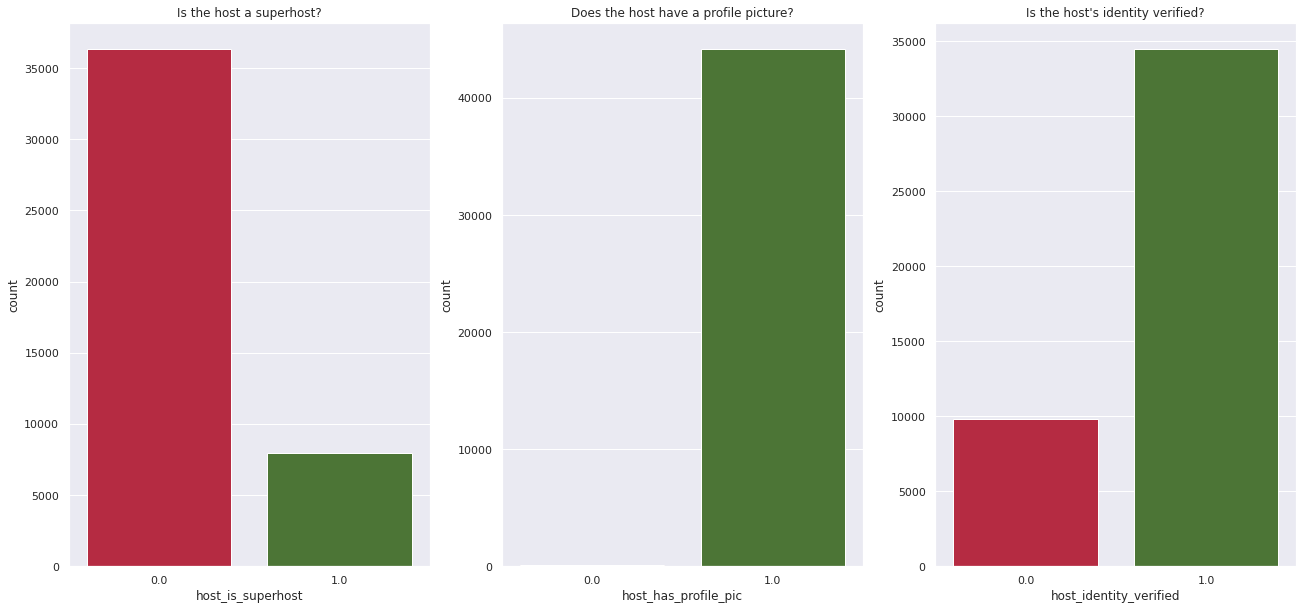

In [ ]:
fig, ax = plt.subplots(1,3)

A = sns.countplot(data=df1, x='host_is_superhost',ax=ax[0], palette=TF)
B = sns.countplot(data=df1, x='host_has_profile_pic',ax=ax[1], palette=TF)
C = sns.countplot(data=df1, x='host_identity_verified',ax=ax[2], palette=TF)

A.set_title('Is the host a superhost?')
B.set_title('Does the host have a profile picture?')
C.set_title("Is the host's identity verified?")

How do these variables relate to the price?

In [ ]:
for var in host_cat:
    display(df1.groupby(var)['price'].describe())

count        mean         std  ...    50%    75%     max
host_is_superhost                                   ...                      
0.0                36364.0  132.999161  118.654418  ...  100.0  160.0  1000.0
1.0                 7983.0  134.319087  113.230935  ...  100.0  160.0  1000.0

[2 rows x 8 columns]

count        mean         std  ...    50%     75%     max
host_has_profile_pic                                   ...                       
0.0                     128.0  156.308047  121.874416  ...  125.0  188.25   995.0
1.0                   44219.0  133.169980  117.678966  ...  100.0  160.00  1000.0

[2 rows x 8 columns]

count        mean         std  ...    50%    75%     max
host_identity_verified                                   ...                      
0.0                      9838.0  128.852091  115.124833  ...   98.0  150.0  1000.0
1.0                     34509.0  134.486768  118.391203  ...  100.0  160.0  1000.0

[2 rows x 8 columns]

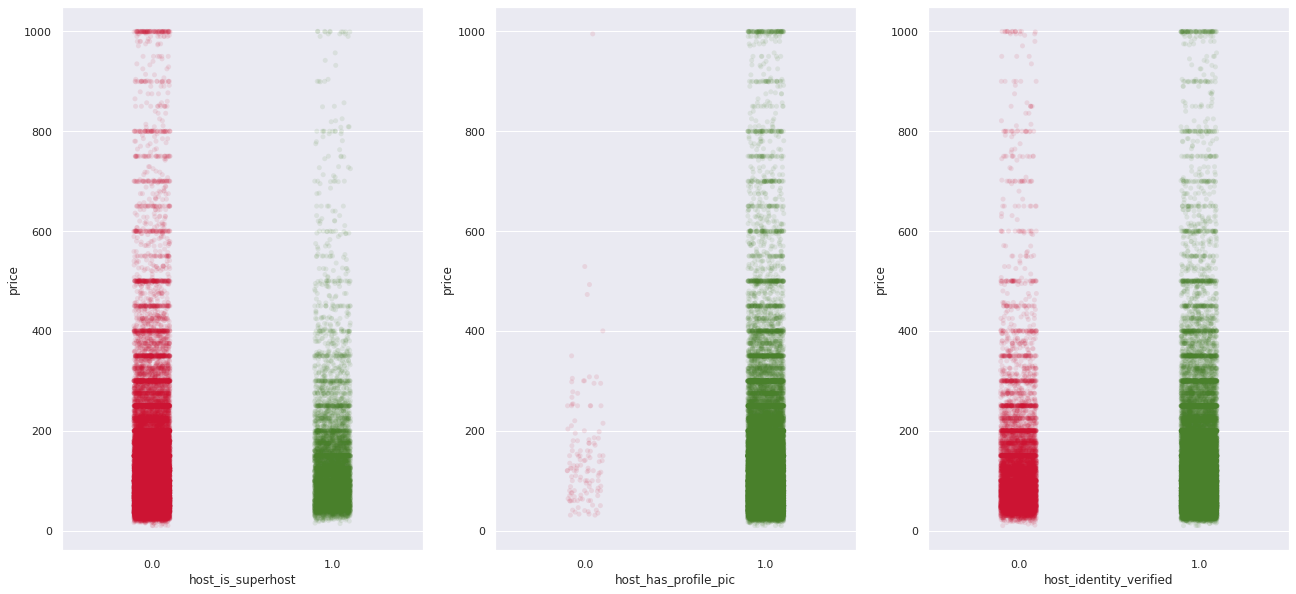

In [ ]:
fig, ax = plt.subplots(1,3)

sns.stripplot(data=df1, y='price' ,x='host_is_superhost', palette=TF, alpha=0.1, ax=ax[0])
sns.stripplot(data=df1, y='price' ,x='host_has_profile_pic', palette=TF, alpha=0.1, ax=ax[1])
sns.stripplot(data=df1, y='price' ,x='host_identity_verified', palette=TF, alpha=0.1, ax=ax[2])

Based on the descriptive statistics and visualization of the categorical variables against price, it seems that there is no clear correlation between the variables.

First, most hosts have a profile picture, so any difference between the two should not be relevant as the sample size for hosts without profile pictures is too small.

On average, superhosts tend to charge higher prices but the difference is neglible when comparing to the standard deviation.

Similarly, hosts with verified identities also do not present any statistically significant variation between prices.

Let's confirm this with a simple correlation matrix:

In [ ]:
host_cat_price = host_cat + ['price']

In [ ]:
df1[host_cat_price].corr().drop(columns=host_cat)

price
host_is_superhost       0.004309
host_has_profile_pic   -0.010547
host_identity_verified  0.019891
price                   1.000000

With significantly low correlation for all the categorical variables, we can conclude that there is no relationship between price and these variables for low-priced listings.

-------

#### Numerical Features

Let's take a look at how some of the continous variables relating to the host are distributed and how it relates to the listing prices.

In [ ]:
host_num_col = ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count']

In [ ]:
df1[host_num_col].describe()

host_response_rate  host_acceptance_rate  host_total_listings_count
count        21419.000000          27628.000000               44347.000000
mean            86.323871             80.582489                  15.836426
std             26.915370             27.667277                 118.099598
min              0.000000              0.000000                   0.000000
25%             88.000000             73.000000                   1.000000
50%            100.000000             94.000000                   1.000000
75%            100.000000            100.000000                   2.000000
max            100.000000            100.000000                2114.000000

Host of low-priced listings tend to have high average response and acceptance rates, but it may be worth noting that the median rates are higher than average values, suggesting that low rates are dragging the average down.

The opposite is true for the host listing count, where the majority of hosts only seem to have 1 or 2 listings and yet the average is 15 listings.

Let's visualize this:

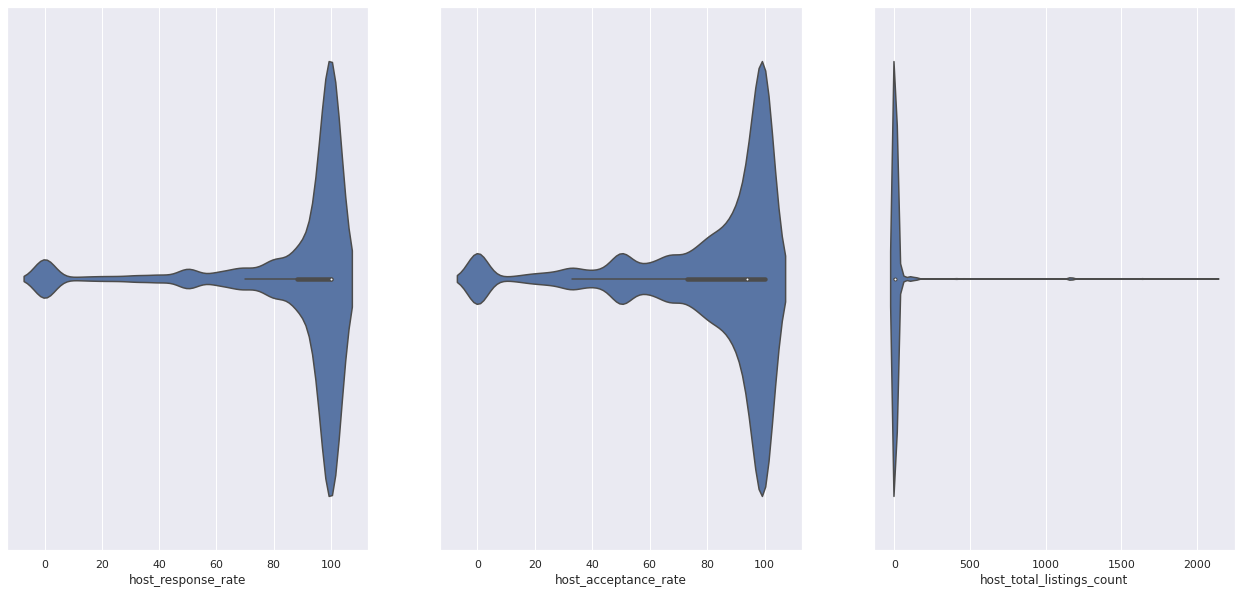

In [ ]:
fig, ax = plt.subplots(1,3)

sns.violinplot(data=df1,x='host_response_rate',ax=ax[0])
sns.violinplot(data=df1,x='host_acceptance_rate',ax=ax[1])
sns.violinplot(data=df1,x='host_total_listings_count',ax=ax[2])

Our hypothesis about host listing count was true, where a few hosts have a high number of listings dragging the average up.

Host response and acceptance rates tend to group up on the higher end with a few 0-values. Further investigation may be required as to why the 0-values exist.

Let's see how these variables relate to price:

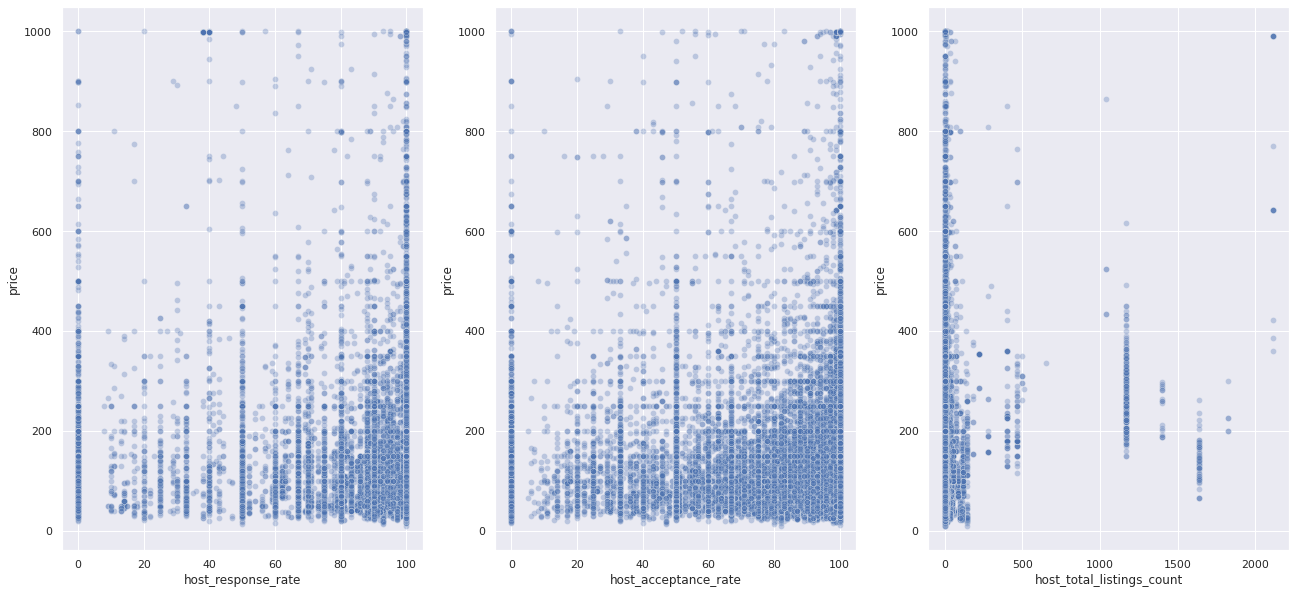

In [ ]:
fig, ax = plt.subplots(1,3)

sns.scatterplot(data=df1,x='host_response_rate',y='price',ax=ax[0], alpha=0.3)
sns.scatterplot(data=df1,x='host_acceptance_rate',y='price',ax=ax[1], alpha=0.3)
sns.scatterplot(data=df1,x='host_total_listings_count',y='price',ax=ax[2], alpha=0.3)

In [ ]:
host_num_price = host_num_col + ['price']

In [ ]:
df1[host_num_price].corr().drop(columns=host_num_col)

price
host_response_rate        -0.054315
host_acceptance_rate      -0.014524
host_total_listings_count  0.113282
price                      1.000000

Based on the correlation values, there is very little correlation between price and the numerical variables for low-priced listings.

### High-Priced Listings

#### Categorical Features

In [ ]:
host_cat = ['host_is_superhost','host_has_profile_pic', 'host_identity_verified']

In [ ]:
df2[host_cat].describe()

host_is_superhost host_has_profile_pic host_identity_verified
count                277                  277                    277
unique                 2                    2                      2
top                    f                    t                      t
freq                 246                  275                    203

It looks like hosts of high-priced listings tend to...
* not be superhosts
* have profile pictures
* has verified their identities

This is the same for low-priced listings.

In [ ]:
df2[host_cat] = df2[host_cat].replace(['t','f'],[1,0])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2[host_cat].describe()

host_is_superhost  host_has_profile_pic  host_identity_verified
count         277.000000            277.000000              277.000000
mean            0.111913              0.992780                0.732852
std             0.315830              0.084818                0.443271
min             0.000000              0.000000                0.000000
25%             0.000000              1.000000                0.000000
50%             0.000000              1.000000                1.000000
75%             0.000000              1.000000                1.000000
max             1.000000              1.000000                1.000000

This gives us a clearer picture of the distribution: it looks like 12% of hosts are superhosts, 99.3% have profile pictures, and 73% have verified their identities. Comparable to the values of low-priced listings.

Let's visualize some of these points:

Text(0.5, 1.0, "Is the host's identity verified?")

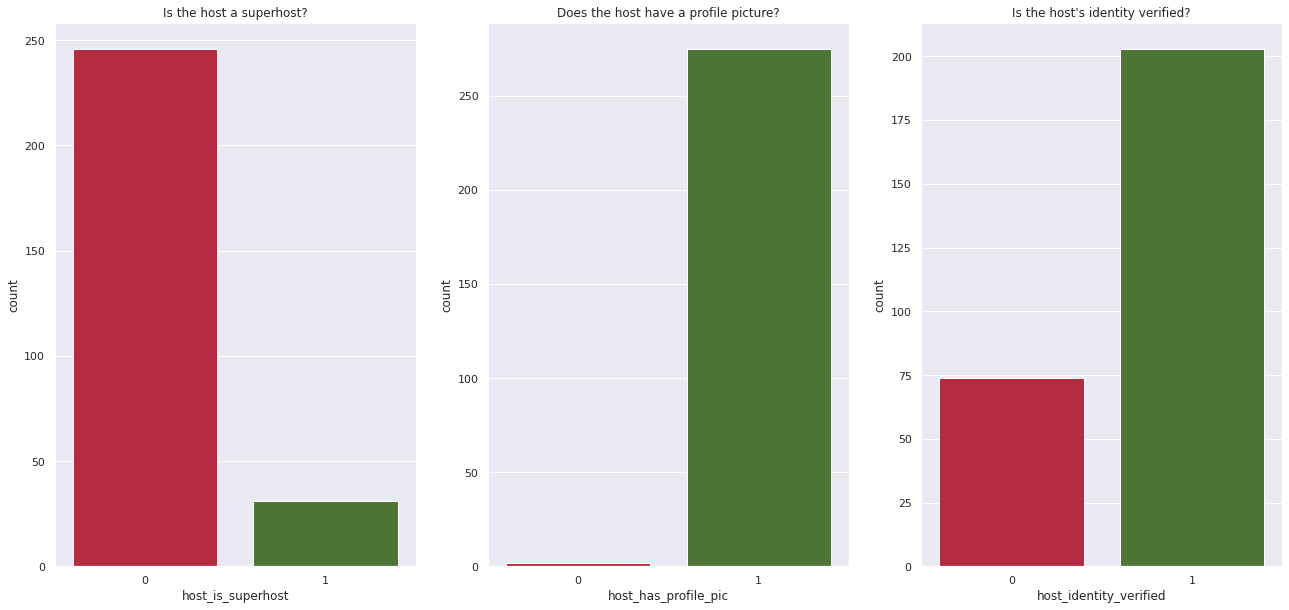

In [ ]:
fig, ax = plt.subplots(1,3)

A = sns.countplot(data=df2, x='host_is_superhost',ax=ax[0], palette=TF)
B = sns.countplot(data=df2, x='host_has_profile_pic',ax=ax[1], palette=TF)
C = sns.countplot(data=df2, x='host_identity_verified',ax=ax[2], palette=TF)

A.set_title('Is the host a superhost?')
B.set_title('Does the host have a profile picture?')
C.set_title("Is the host's identity verified?")

How do these variables relate to the price?

In [ ]:
for var in host_cat:
    display(df2.groupby(var)['price'].describe())

count         mean          std  ...     50%     75%      max
host_is_superhost                                   ...                         
0                  246.0  2966.491301  2808.239316  ...  1667.0  2850.0  10000.0
1                   31.0  2045.903226  1260.032046  ...  1500.0  2102.0   5000.0

[2 rows x 8 columns]

count         mean          std  ...     50%     75%      max
host_has_profile_pic                                   ...                         
0                       2.0  1675.000000   176.776695  ...  1675.0  1737.5   1800.0
1                     275.0  2872.108582  2701.855590  ...  1667.0  2818.0  10000.0

[2 rows x 8 columns]

count         mean  ...      75%      max
host_identity_verified                      ...                  
0                        74.0  2820.527027  ...  2889.25  10000.0
1                       203.0  2879.117537  ...  2500.00  10000.0

[2 rows x 8 columns]

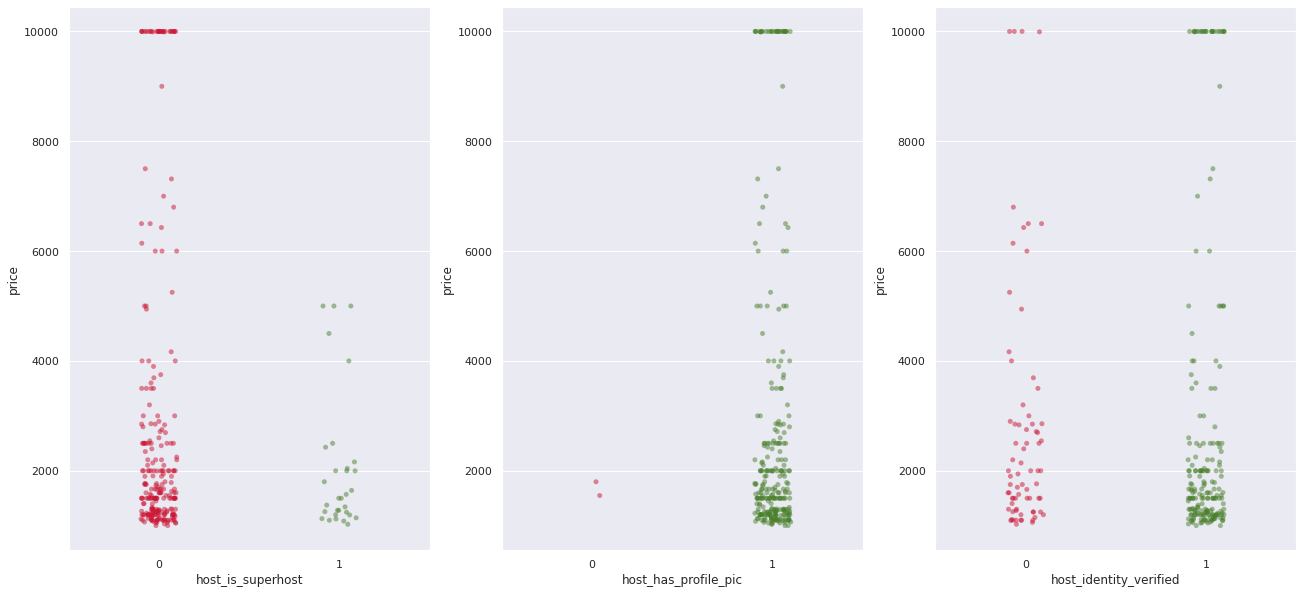

In [ ]:
fig, ax = plt.subplots(1,3)

sns.stripplot(data=df2, y='price' ,x='host_is_superhost', palette=TF, alpha=0.5, ax=ax[0])
sns.stripplot(data=df2, y='price' ,x='host_has_profile_pic', palette=TF, alpha=0.5, ax=ax[1])
sns.stripplot(data=df2, y='price' ,x='host_identity_verified', palette=TF, alpha=0.5, ax=ax[2])

Based on the descriptive statistics and visualization of the categorical variables against price, it also seems that there is no clear correlation between the variables for high-priced listings. The conclusions for the low-priced listings apply here too.

Notably, the average prices between whether or not the host has a profile picture may appear significant, but a deeper look at the low sample size of hosts without profile pictures suggests we cannot reach this conclusion.

Let's confirm this with a simple correlation matrix:

In [ ]:
host_cat_price = host_cat + ['price']

In [ ]:
df2[host_cat_price].corr().drop(columns=host_cat)

price
host_is_superhost      -0.107926
host_has_profile_pic    0.037690
host_identity_verified  0.009641
price                   1.000000

With significantly low correlation for all the categorical variables, we can conclude that there is no relationship between price and these variables for high-priced listings.

-------

#### Numerical Features

Let's take a look at how some of the continous variables relating to the host are distributed and how it relates to the listing prices.

In [ ]:
host_num_col = ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count']

In [ ]:
df2[host_num_col].describe()

host_response_rate  host_acceptance_rate  host_total_listings_count
count          154.000000             151.00000                 277.000000
mean            81.753247              82.00000                  13.801444
std             30.597815              28.05257                  94.885822
min              0.000000               0.00000                   0.000000
25%             75.000000              75.00000                   1.000000
50%            100.000000              98.00000                   1.000000
75%            100.000000             100.00000                   4.000000
max            100.000000             100.00000                1036.000000

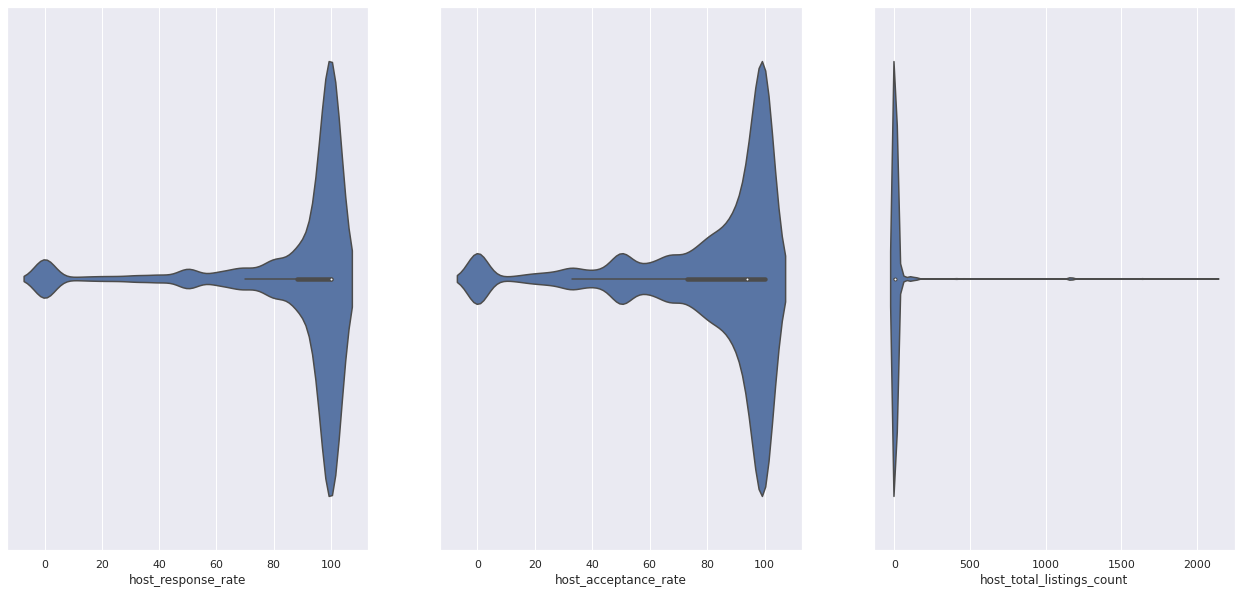

In [ ]:
fig, ax = plt.subplots(1,3)

sns.violinplot(data=df1,x='host_response_rate',ax=ax[0])
sns.violinplot(data=df1,x='host_acceptance_rate',ax=ax[1])
sns.violinplot(data=df1,x='host_total_listings_count',ax=ax[2])

The conclusions we reached about the distirbution of these values on low-priced listings apply here also, whereby average and median host response and acceptance rates are high, but there are 0-values that are dragging the average down.

Additionally, most hosts have only 1-2 listings but a few hosts with a large number of listings are dragging the average up.

Let's see how these variables relate to price:

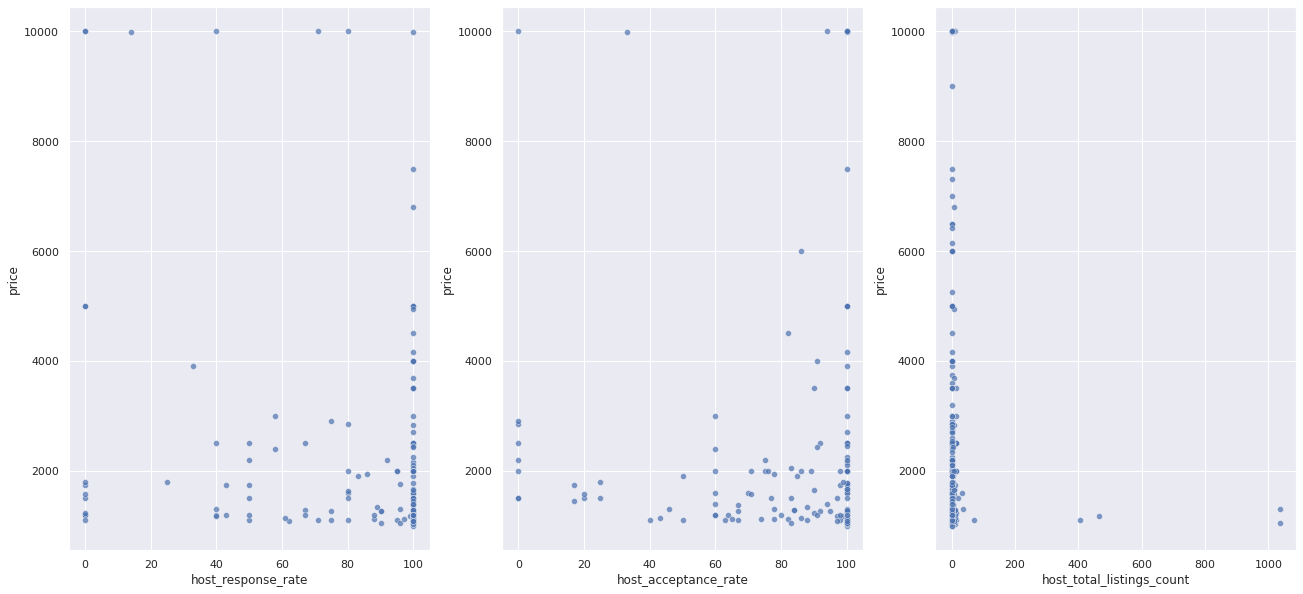

In [ ]:
fig, ax = plt.subplots(1,3)

sns.scatterplot(data=df2,x='host_response_rate',y='price',ax=ax[0], alpha=0.7)
sns.scatterplot(data=df2,x='host_acceptance_rate',y='price',ax=ax[1], alpha=0.7)
sns.scatterplot(data=df2,x='host_total_listings_count',y='price',ax=ax[2], alpha=0.7)

In [ ]:
host_num_price = host_num_col + ['price']

In [ ]:
df2[host_num_price].corr().drop(columns=host_num_col)

price
host_response_rate        -0.213395
host_acceptance_rate       0.082615
host_total_listings_count -0.066708
price                      1.000000

Based on the correlation values, there is very little correlation between price and the numerical variables for low-priced listings.

## Listing Information Exploration

Our next section will explore how listing details could potentially affect price. Does the type of listing (i.e. hotel room vs entire home) affect prices? What about the number of people it accomodates?

------
### Section Summary
According to our EDA, most listings on AirBnB are entire homes and apartments, but other than that, our findings are varied between high and low priced listings.

#### Low-Price Listings Takeaways:
* Entire homes/apts are the most expensive listings on average, followed by hotel rooms. We argue this order relates to the number of people these types accomodates and the extra service hotel rooms recieve regardless of the the number of people they can accomodate.
* Entire homes tend to accomodate 2-3 people on average, followed by hotel rooms, which accomodates 2 people on average; shared and private rooms both accomodate 1 person on average.
* Beds, bedrooms, and bath counts have high multicolinearity with accomodates, which is to be expexted.
* The number of people the listing accomodates has a positive correlation with price, but is not very strong. Further investigation required; hopefully, when controlling for other factors, this correlation will increase.

#### High-Price Listings Takeaways:
* Entire homes/apt make up a significant majority of high-priced listings, yet does not have the highest average/median price among the types.
* Colinearity among the beds, bedrooms, and baths still exist with accomodates.
* The correlation between accomodates and price is weak and negative, which suggests that for high-priced listings, the number of people it accomodates may no longer be as important as a factor.

#### Areas of potential improvement:
* It may be interesting to see how bath types play a factor into this, but we suspect it has some relation to the listing type (e.g. private rooms and likely to have private bathrooms).
* For low-priced listings, we should investigate the relationship between price and accommodates a little deeper, controlling for other variables to see if we can raise the correlaiton coefficient.

----

### Low-Priced Listings

In [ ]:
columns =['accommodates', 'beds','room_type', 'bath_count','bedrooms','bath_type','price','amenities_count']

In [ ]:
listings1 = df1[columns]
listings1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44364 entries, 0 to 44640
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     44364 non-null  int64  
 1   beds             43875 non-null  float64
 2   room_type        44364 non-null  object 
 3   bath_count       44295 non-null  float64
 4   bedrooms         40146 non-null  float64
 5   bath_type        44364 non-null  object 
 6   price            44364 non-null  float64
 7   amenities_count  44364 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


There are two categorical variables present in on our table, bath_type and room_type. Bath_type was a column we created earlier to signifiy the type of bathrooms the listing has based on `bathroom_text`, so we won't look into that variable until we explore bathrooms.

#### Listing/Room Type

Let's see if the room type is distributed across listings and how it relates to price.

In [ ]:
listings1.groupby('room_type')['price'].count().sort_values(ascending=False).reset_index().rename(columns={'price':'count'})

room_type  count
0  Entire home/apt  22663
1     Private room  20435
2      Shared room    913
3       Hotel room    353

With over 22,000 listings, it seems entire homes are the most popular type of listing. 

Let's see how this looks like:

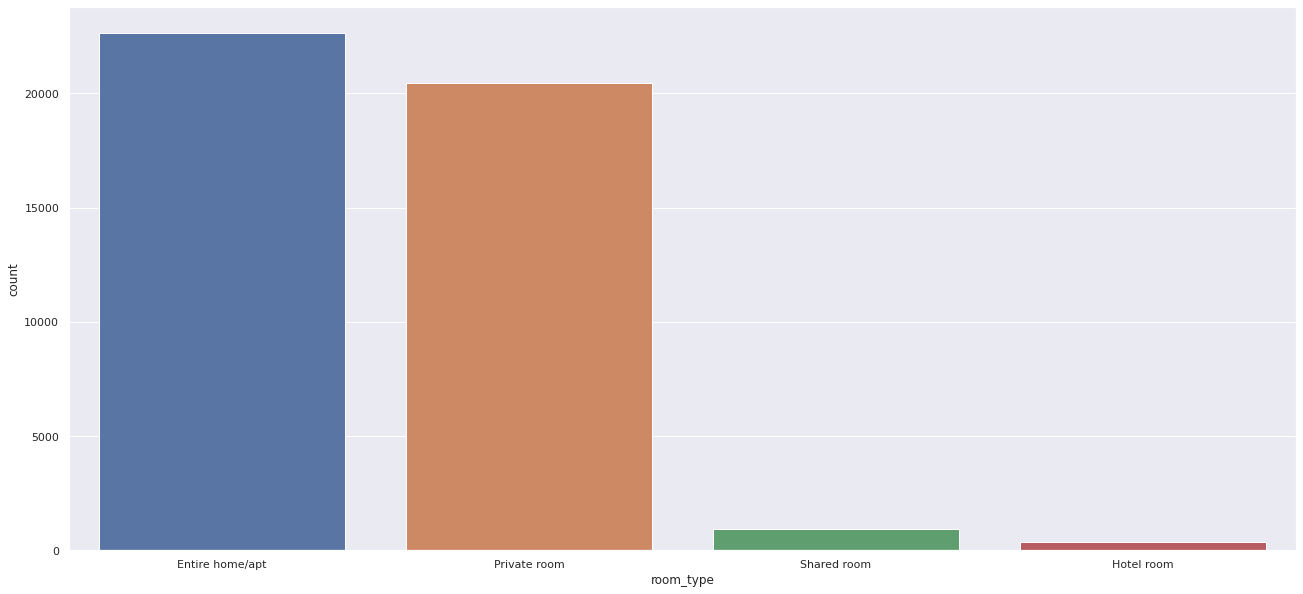

In [ ]:
sns.countplot(data=listings1,x='room_type')

How does the room types relate to price?

In [ ]:
listings1.groupby('room_type')['price'].describe()

count        mean         std  ...    50%    75%     max
room_type                                         ...                      
Entire home/apt  22663.0  179.775086  124.394618  ...  150.0  200.0  1000.0
Hotel room         353.0  283.481445  202.490191  ...  248.0  335.0  1000.0
Private room     20435.0   81.212088   75.479086  ...   65.0   90.0  1000.0
Shared room        913.0   84.900340  143.621947  ...   49.0   80.0  1000.0

[4 rows x 8 columns]

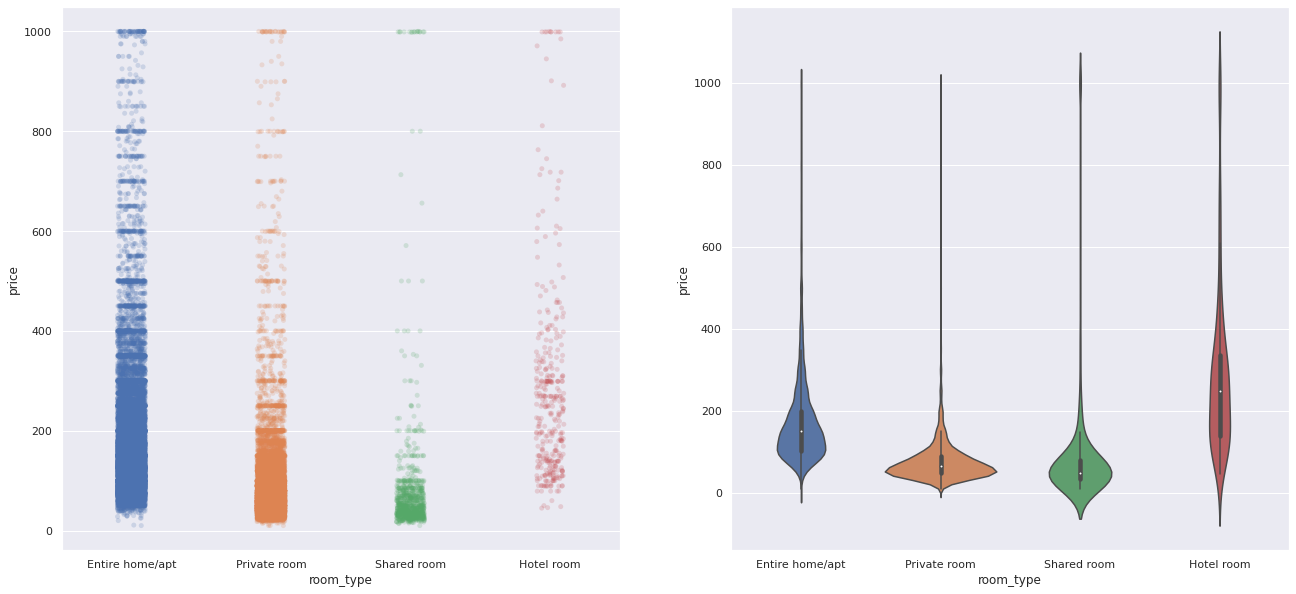

In [ ]:
fig, ax = plt.subplots(1,2)

sns.stripplot(data=listings1,x='room_type',y='price',alpha=0.2, ax=ax[0])
sns.violinplot(data=listings1,x='room_type',y='price', ax=ax[1])

Despite low count of hotel rooms, they seem to the most expensive on average. This brings into consideration the fact that hotel rooms may bring in an external factor that cannot be captured with these variables (e.g. an elevated level of service like daily housekeeping). 

Considering the goal of the project (i.e. helping regular hosts, not hotels, determine prices) and limited number of hotel rooms, we may consider filtering out hotel rooms in our project.

#### Beds, Bedrooms, and Bathrooms

In [ ]:
columns = ['beds', 'bath_type', 'bath_count', 'bedrooms']

In [ ]:
listings1[columns].describe()

beds    bath_count      bedrooms
count  43875.00000  44295.000000  40146.000000
mean       1.49853      1.141867      1.284561
std        1.05666      0.421088      0.661282
min        0.00000      0.000000      1.000000
25%        1.00000      1.000000      1.000000
50%        1.00000      1.000000      1.000000
75%        2.00000      1.000000      1.000000
max       24.00000      8.000000     21.000000

On average, listings tend to only have one bed, bedroom, and bathrooms.

Let's dig a little deeper through visualization:

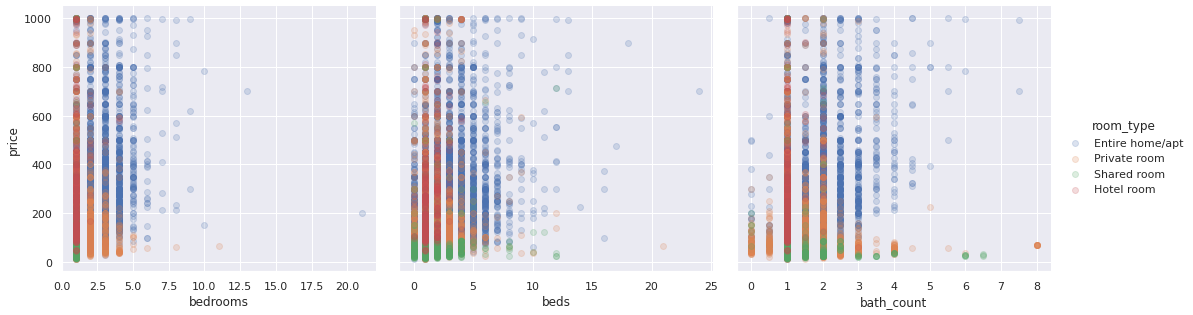

In [ ]:
g = sns.PairGrid(df1, y_vars=["price"], x_vars=["bedrooms","beds", "bath_count"], height=4.5, hue="room_type", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.2)
g.add_legend();

Quick insights:
* Shared and Hotel rooms tend to have fewest beds, bedrooms, and baths.
* Entire homes/apts tend to have move beds, bedrooms, and baths; private rooms are in between
* Price distribution is all over the place; we cannot really infer correlation with the scatterplots

Let's see what the correlation matrix looks like:

In [ ]:
listings1.corr().sort_values('price', ascending=False)

accommodates      beds  ...     price  amenities_count
price                0.476100  0.361808  ...  1.000000         0.124219
accommodates         1.000000  0.735625  ...  0.476100         0.247066
bedrooms             0.719391  0.711974  ...  0.434592         0.169507
beds                 0.735625  1.000000  ...  0.361808         0.229659
bath_count           0.307132  0.334396  ...  0.255605         0.127391
amenities_count      0.247066  0.229659  ...  0.124219         1.000000

[6 rows x 6 columns]

It seems the highest correlation with price are the bedrooms and beds count.

Note that the number of people the listing accomodates has a higher correlation to price, and the bedrooms and beds counts are highly correlated to accomodates too. This suggests some multicolinearity. So if we decide to include one of these values, we should only include one and not all three.

Let's see how the number of people the listing accomodates play a factor in price.

#### Number of People the Listing Accomodates

In [ ]:
listings1['accommodates'].describe()

count    44364.000000
mean         2.737129
std          1.747762
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [ ]:
listings1.groupby('room_type')['accommodates'].describe()

count      mean       std  min  25%  50%  75%   max
room_type                                                             
Entire home/apt  22663.0  3.562238  1.932585  1.0  2.0  3.0  4.0  16.0
Hotel room         353.0  2.747875  1.180525  1.0  2.0  2.0  4.0   8.0
Private room     20435.0  1.864301  0.904696  1.0  1.0  2.0  2.0  16.0
Shared room        913.0  1.787514  1.419931  1.0  1.0  1.0  2.0  16.0

Looking at the breakdown of the variable. It seems that the average listing accomodates 2-3 people. When breaking down by room_type, entire homes/apt tends to host more people (which was to be expected), followed by hotel rooms.

In [ ]:
listings1[['accommodates','price']].corr()

accommodates   price
accommodates        1.0000  0.4761
price               0.4761  1.0000

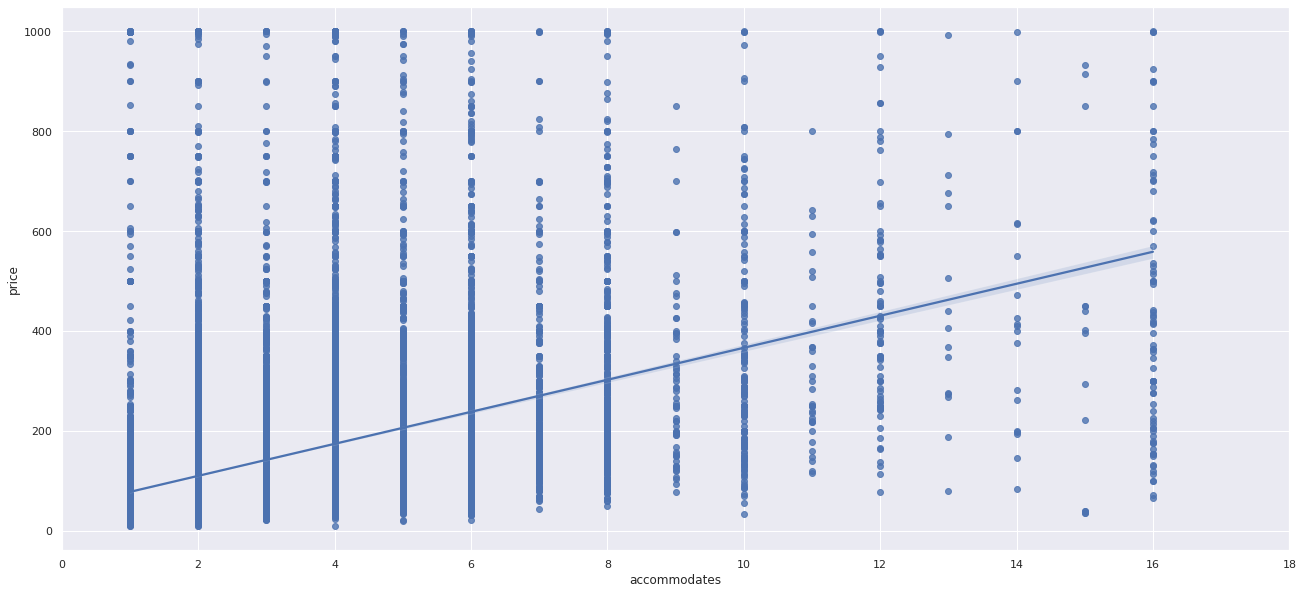

In [ ]:
a = sns.regplot(data=df1, y='price',x='accommodates')
a.set_xticks(range(0,20,2))

As seen before, there is somewhat of a correlation present between price and the number of people the listing accomodates, but it is not very strong with only a score of 0.48.

In [ ]:
table = df1[['accommodates','price','room_type']].groupby('room_type').corr().reset_index().drop(columns='accommodates')
filter_out = table['level_1']=='price'
table[~filter_out].drop(columns='level_1').rename(columns={'price':'Correlation between price and accommodates'}).set_index('room_type')

Correlation between price and accommodates
room_type                                                  
Entire home/apt                                    0.381897
Hotel room                                         0.247337
Private room                                       0.273505
Shared room                                        0.118835

Oddly, enough when controlling for room type, the correlation seems to get worse. Further exploration may be required to see why this is the case.

#### Amenities Count

In [ ]:
listings1['amenities_count'].describe()

count    44364.000000
mean        18.943490
std          8.829585
min          1.000000
25%         12.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: amenities_count, dtype: float64

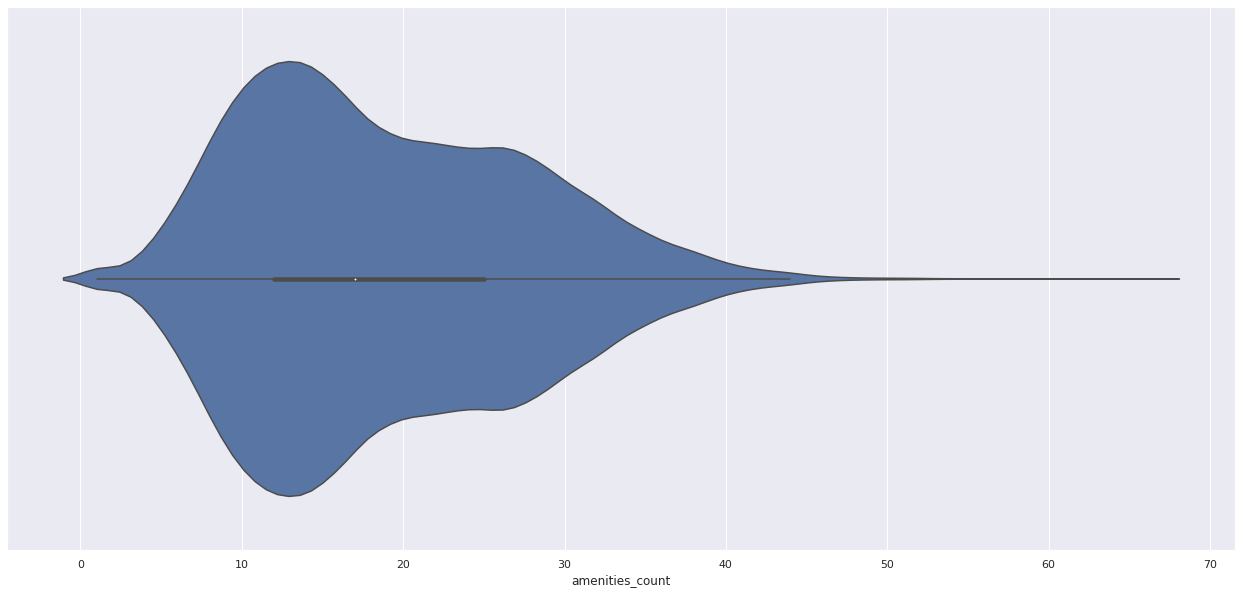

In [ ]:
sns.violinplot(data=listings1,x='amenities_count')

The distribution of amenities count seems to be centered between 10-30 amenities, with the average being ~19.

Does it have any correlation to price?

In [ ]:
listings1[['amenities_count','price']].corr()

amenities_count     price
amenities_count         1.000000  0.124219
price                   0.124219  1.000000

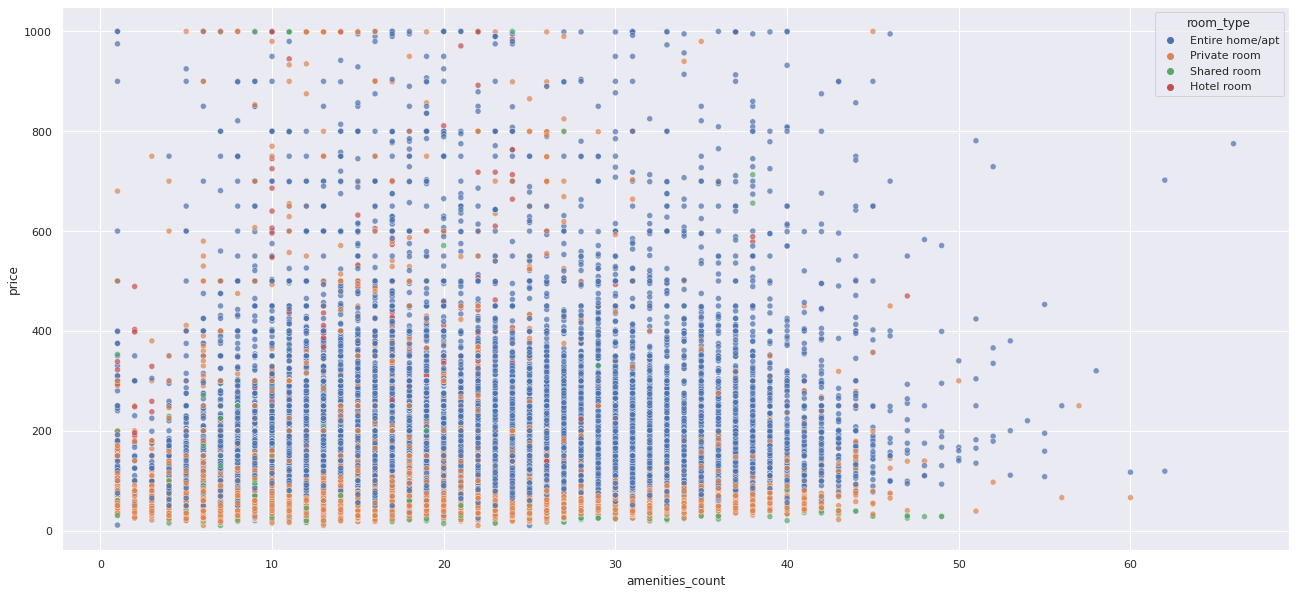

In [ ]:
sns.scatterplot(data=listings1,y='price',x='amenities_count',hue='room_type',alpha=0.7)

Based on the correlation matrix and scatter plot, there does not seem to be any strong correlation present.

### High-Priced Listings

In [ ]:
columns =['accommodates', 'beds','room_type', 'bath_count','bedrooms','bath_type','amenities_count','price']

In [ ]:
listings2 = df2[columns]
listings2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 182 to 44475
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     277 non-null    int64  
 1   beds             273 non-null    float64
 2   room_type        277 non-null    object 
 3   bath_count       276 non-null    float64
 4   bedrooms         257 non-null    float64
 5   bath_type        277 non-null    object 
 6   amenities_count  277 non-null    int64  
 7   price            277 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 29.5+ KB


#### Listing/Room Type

Let's see if the room type is distributed across listings and how it relates to price.

In [ ]:
listings2.groupby('room_type')['price'].count().sort_values(ascending=False).reset_index().rename(columns={'price':'count'})

room_type  count
0  Entire home/apt    196
1     Private room     59
2       Hotel room     15
3      Shared room      7

Similar to low-priced listings, entire homes are the most popular type of high-priced listings.

Let's see how this looks like:

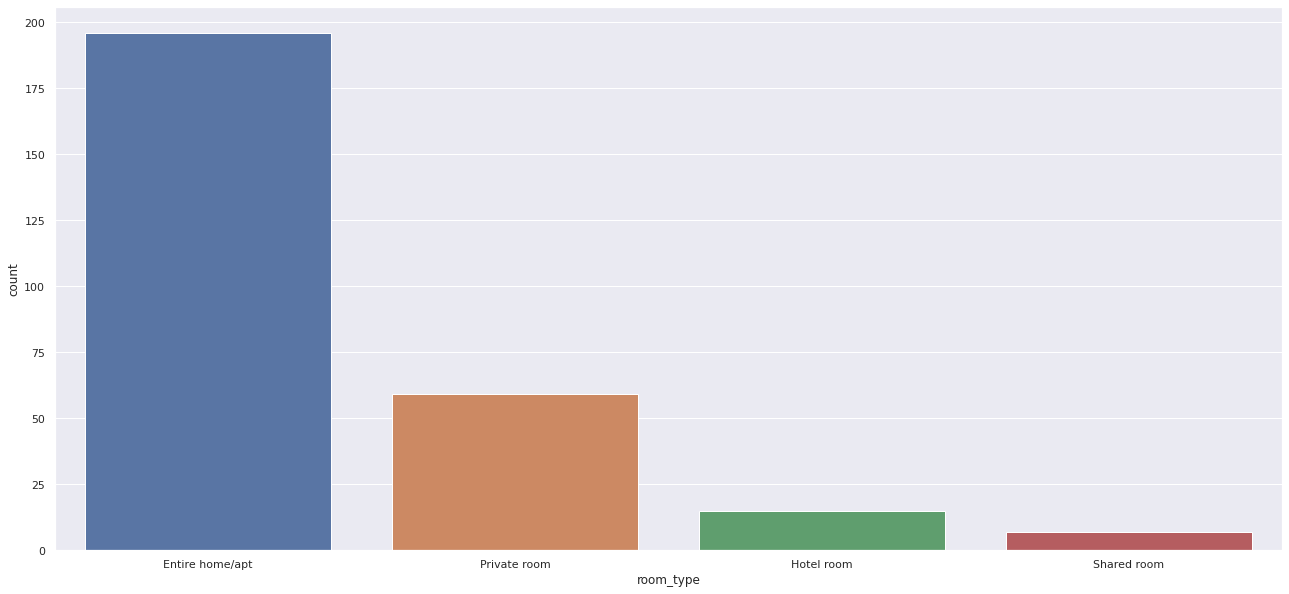

In [ ]:
sns.countplot(data=listings2,x='room_type')

How does the room types relate to price?

In [ ]:
listings2.groupby('room_type')['price'].describe()

count         mean          std  ...     50%      75%      max
room_type                                         ...                          
Entire home/apt  196.0  2693.677857  2447.643504  ...  1756.5  2511.25  10000.0
Hotel room        15.0  1377.866667   252.156093  ...  1245.0  1667.00   1667.0
Private room      59.0  3765.644068  3443.534260  ...  1600.0  5500.00  10000.0
Shared room        7.0  3196.857143  3126.265473  ...  1900.0  3250.00  10000.0

[4 rows x 8 columns]

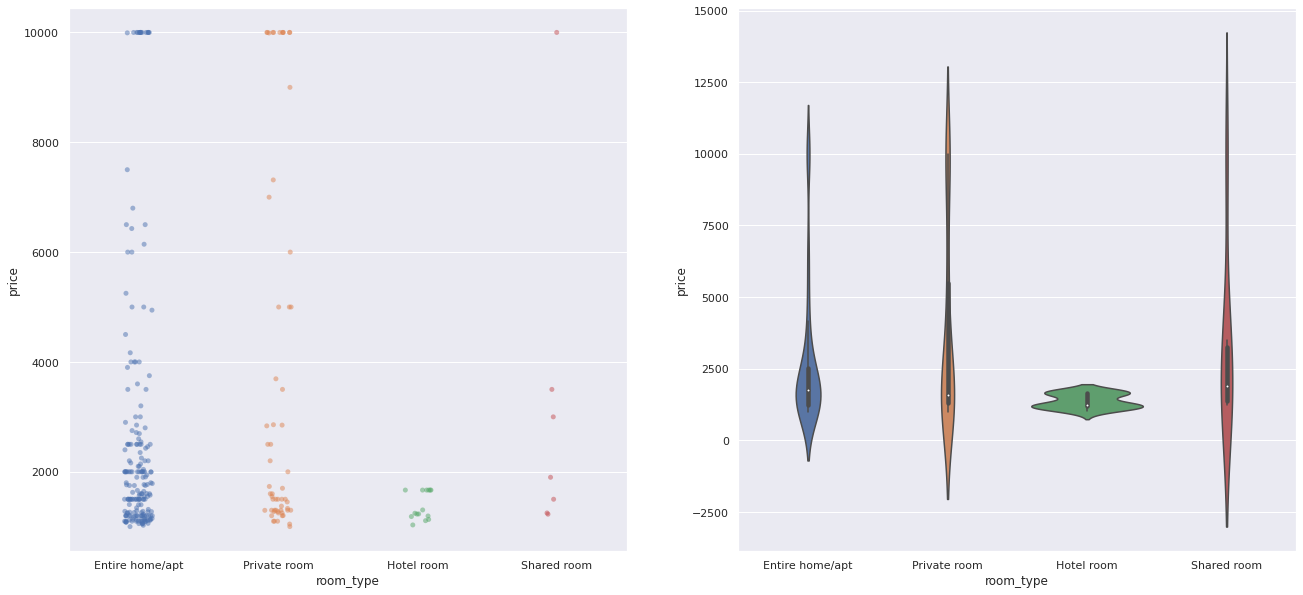

In [ ]:
fig, ax = plt.subplots(1,2)

sns.stripplot(data=listings2,x='room_type',y='price',alpha=0.5, ax=ax[0])
sns.violinplot(data=listings2,x='room_type',y='price', ax=ax[1])

This time, hotel rooms are the cheapest on average, while private rooms and shared rooms are the most expensive.

It is interesting to see how entire homes and apartments do not have the highest median or average price. It could be because, other types have significantly fewer listings (i.e. small sample size), which means we may not be able to confidently reach any conclusions.

#### Beds, Bedrooms, and Bathrooms

In [ ]:
columns = ['beds', 'bath_type', 'bath_count', 'bedrooms']

In [ ]:
listings2[columns].describe()

beds  bath_count    bedrooms
count  273.000000  276.000000  257.000000
mean     2.919414    2.057971    2.439689
std      3.316751    1.498572    1.823582
min      0.000000    0.000000    1.000000
25%      1.000000    1.000000    1.000000
50%      2.000000    2.000000    2.000000
75%      4.000000    2.500000    3.000000
max     40.000000   15.500000   14.000000

High-priced listings seem to have higher values for these variables, compared to lower priced listings.

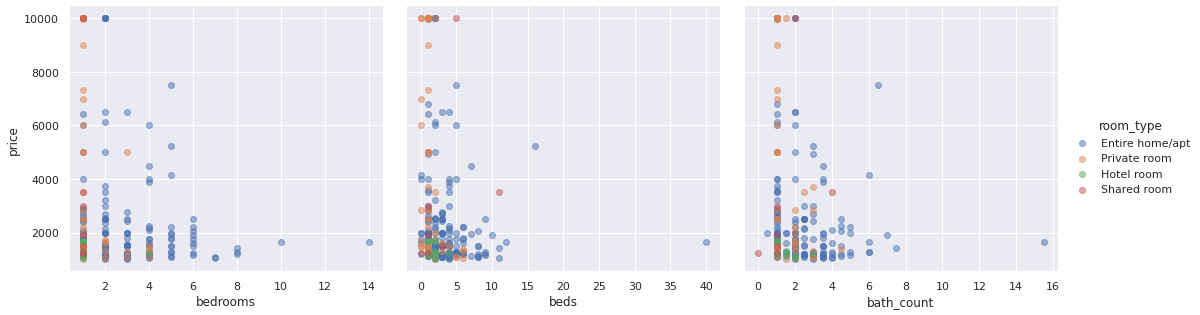

In [ ]:
g = sns.PairGrid(df2, y_vars=["price"], x_vars=["bedrooms","beds", "bath_count"], height=4.5, hue="room_type", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.5)
g.add_legend();

The scatter plots don't provide any clear takeaways for high-priced listings in regards to the distribution. However, it does provided glimpse of negative correlations with price. Is that really the case?

In [ ]:
listings2.corr().sort_values('price', ascending=False)

accommodates      beds  ...  amenities_count     price
price               -0.221097 -0.181335  ...        -0.225577  1.000000
beds                 0.503912  1.000000  ...         0.332410 -0.181335
bath_count           0.524534  0.788949  ...         0.397376 -0.214929
accommodates         1.000000  0.503912  ...         0.226833 -0.221097
amenities_count      0.226833  0.332410  ...         1.000000 -0.225577
bedrooms             0.705419  0.815533  ...         0.335427 -0.250571

[6 rows x 6 columns]

Our guess was correct, where the correlation these variables have with price is negative. It is very odd and does not follow our expectations.

#### Number of People the Listing Accomodates

In [ ]:
listings2['accommodates'].describe()

count    277.000000
mean       6.144404
std        4.837289
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       16.000000
Name: accommodates, dtype: float64

In [ ]:
listings2.groupby('room_type')['accommodates'].describe()

count      mean       std  min  25%  50%   75%   max
room_type                                                            
Entire home/apt  196.0  7.234694  4.737848  1.0  4.0  6.0  10.0  16.0
Hotel room        15.0  3.200000  1.656157  2.0  2.0  2.0   4.0   8.0
Private room      59.0  3.355932  3.946901  1.0  1.0  2.0   4.0  16.0
Shared room        7.0  5.428571  7.230886  1.0  1.0  1.0   9.0  16.0

Looking at the breakdown of the variable. It seems that the average listing accomodates 6 people. Similar to before, entire homes/apt tends to host more people (which was to be expected), but this time, followed by shared rooms.

It may be due to the low sample size of 7 shared rooms, but it is odd that a shared room above $1000 can accomodate 5 people on average.

In [ ]:
listings2[['accommodates','price']].corr()

accommodates     price
accommodates      1.000000 -0.221097
price            -0.221097  1.000000

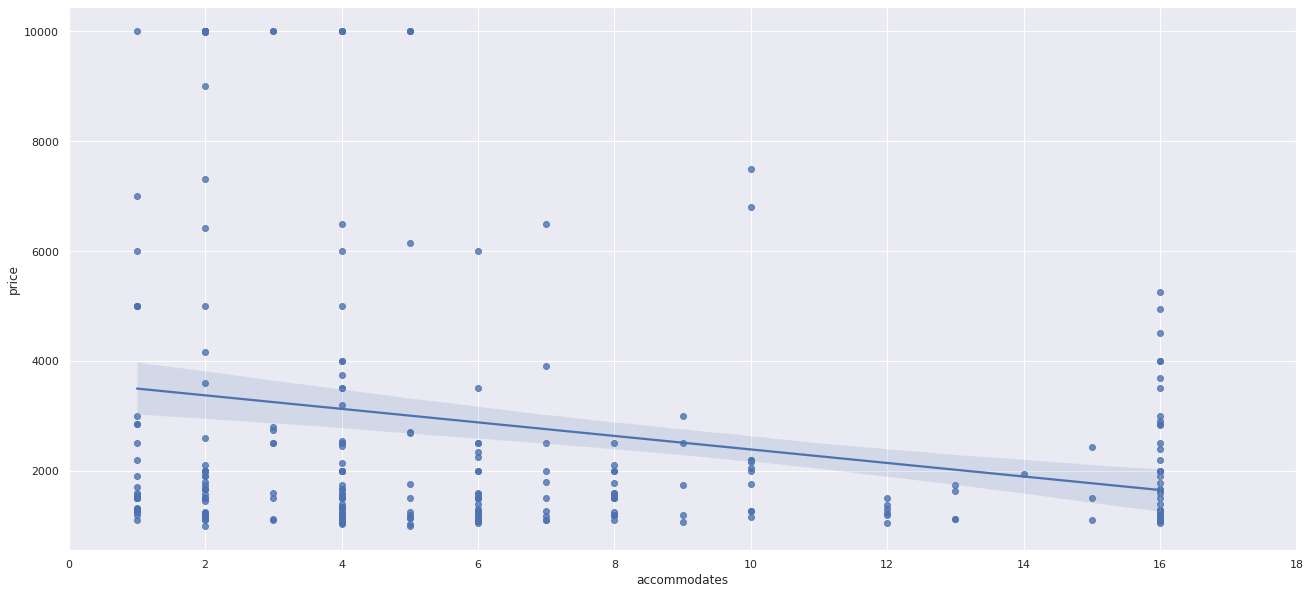

In [ ]:
a = sns.regplot(data=df2, y='price',x='accommodates')
a.set_xticks(range(0,20,2))

As described before, the correlation to price is negative. It is also not as strong as the correlation on low-priced listings. This may suggest that the number of people high-priced listings accomodates have little weight on its price.

#### Amenities Count

In [ ]:
listings2['amenities_count'].describe()

count    277.000000
mean      18.404332
std       10.169704
min        1.000000
25%       11.000000
50%       17.000000
75%       26.000000
max       49.000000
Name: amenities_count, dtype: float64

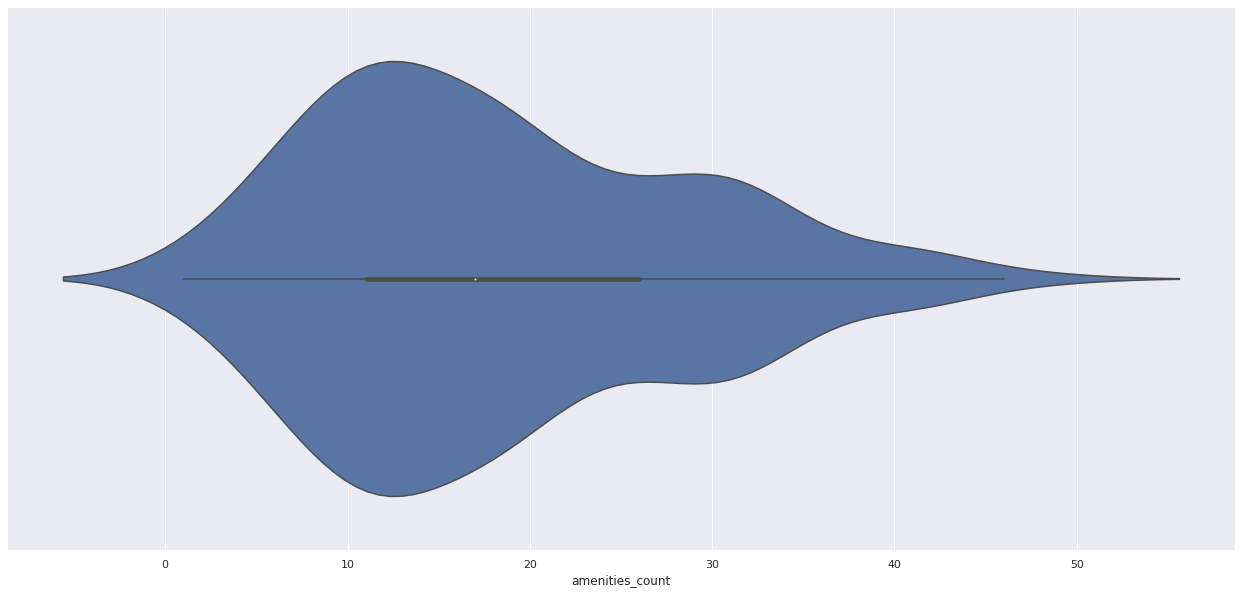

In [ ]:
sns.violinplot(data=listings2,x='amenities_count')

The distribution of amenities countfor high-priced listings seems to be more normally distributed with most of its values centered between 10-35 amenities. The average seems to be still the same.

Does it have any correlation to price?

In [ ]:
listings2[['amenities_count','price']].loc[listings2['price']<10000].corr()

amenities_count    price
amenities_count          1.00000 -0.24414
price                   -0.24414  1.00000

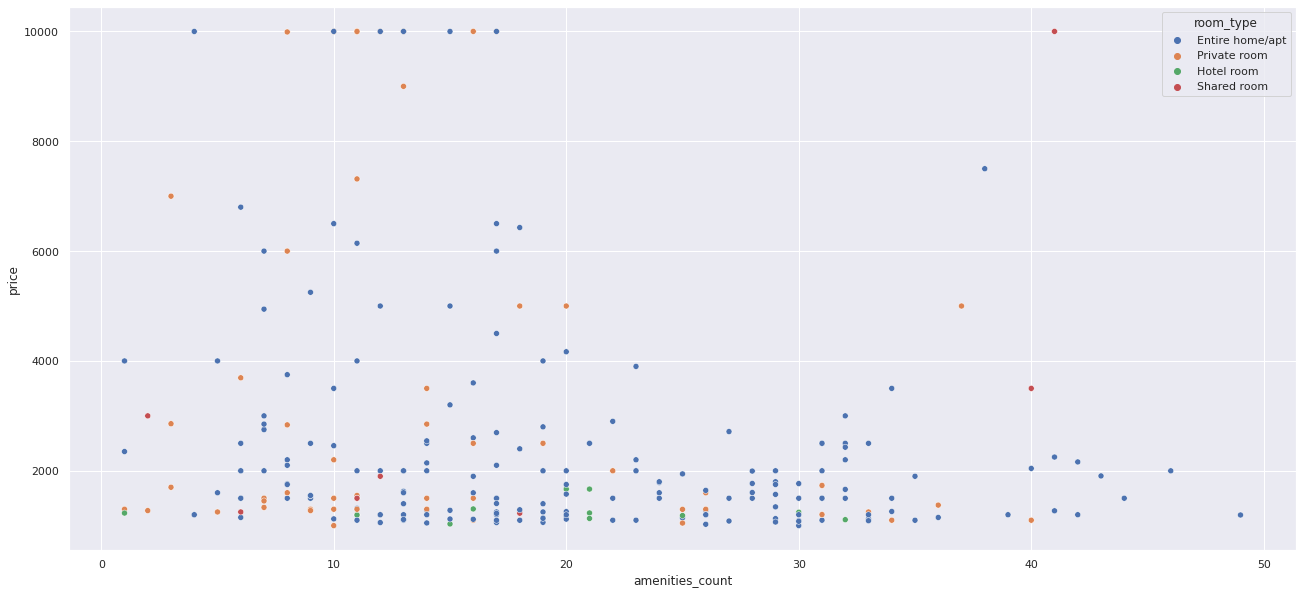

In [ ]:
 sns.scatterplot(data=listings2,y='price',x='amenities_count',hue='room_type')

Based on the correlation matrix and scatter plot, the correlation between price and amenities count seems to be stronger for high-priced listings compared to low-priced listings, however, it is a negative correlation and is still quite weak, suggesting that this might be a coincidence more than anything else. This is further supported by the fact that the sample size is significantly smaller.

-----

## Review Scores Exploration

This section will invetsigate the distribution of review scores of AirBnB listings, the number of reviews a given listing has and how they relate to their prices. There are a number of review categories but we will only look at the overall rating.

For an overview, the categories are:

* Overall Rating
* Accuracy (pertaining to description)
* Cleanliness
* Check-in
* Host communication
* Location
* Value



### Section Summary
Our initial hypothesis was that demand is a good determinant of price (based on widely accepted economic principles) and a good way to capture demand was through the listings reviews. We assumed the higher the number of reviews or the higher the score, the more in-demand the listing is thus leading to higher prices.

Across the board (both high and low-priced listings), we found that this was not actually the case:
* Number of Reviews (total or monthly) had little to no correlation; infact, any linear correlation was negative
* There was high multicollinearity between the various review categories, which was to be expected (e.g. the higher the rating for cleanliness the listing had, the higher the overall rating would be).
* The overall rating had also little to no correlation to the price (although, it was positive, which did not go against our hypothesis).

Ultimately, we have opted to exclude review-related variables in our models, with the exception of overall review ratings. Instead of excluding the feature, we will create two models, one with and one without the feature, and compare their performances.

-------

In [187]:
number_of_reviews = df[['number_of_reviews','price']]
number_of_reviews.head()

number_of_reviews  price
0                 48  175.0
1                473   73.0
2                118   75.0
3                 66  160.0
4                123   85.0

In [188]:
#drop value of number_of_reviews == 0
data2 = number_of_reviews.drop(number_of_reviews[number_of_reviews['number_of_reviews'] ==0].index)

### Low-Priced Listings

#### Total Reviews

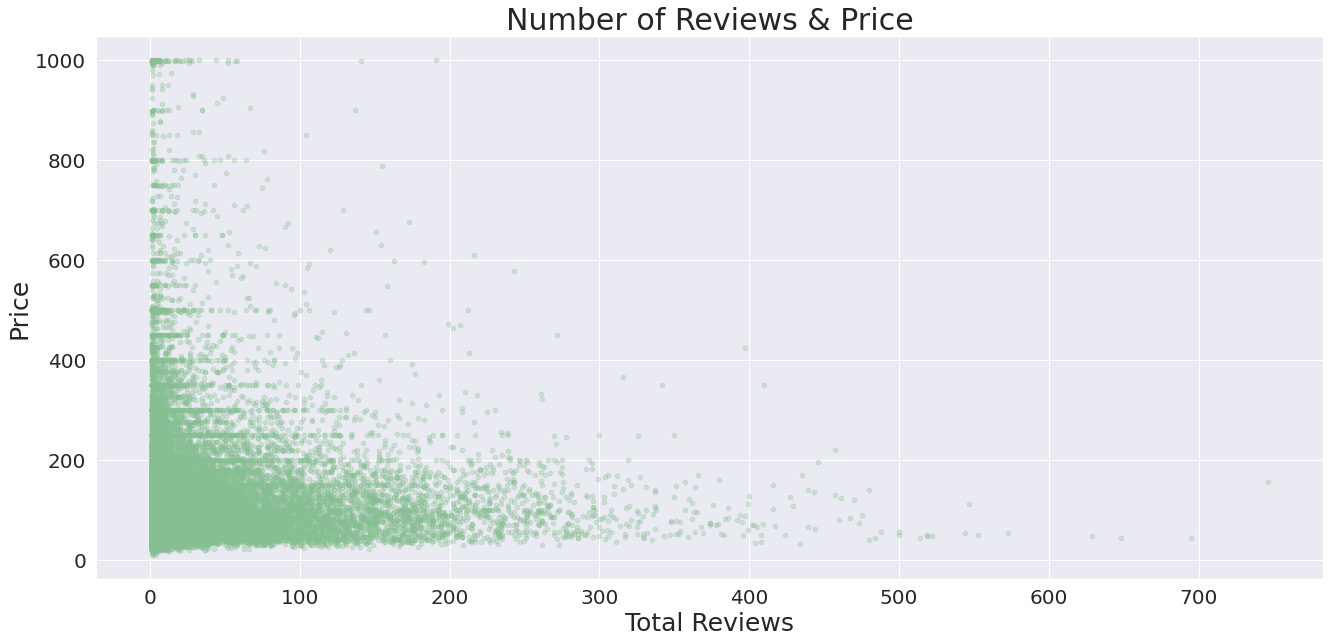

In [189]:
#price <1000
data2_0 = data2.drop(data2[data2['price']>1000].index)
data2_0_mean_low_price = data2_0.groupby('number_of_reviews').agg({'price':'mean'})
data2_0.plot(kind='scatter', x='number_of_reviews', y='price',alpha=0.3,color = '#86bf91')
plt.xlabel("Total Reviews",fontsize = 25)
plt.ylabel("Price",fontsize = 25)
plt.title('Number of Reviews & Price',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

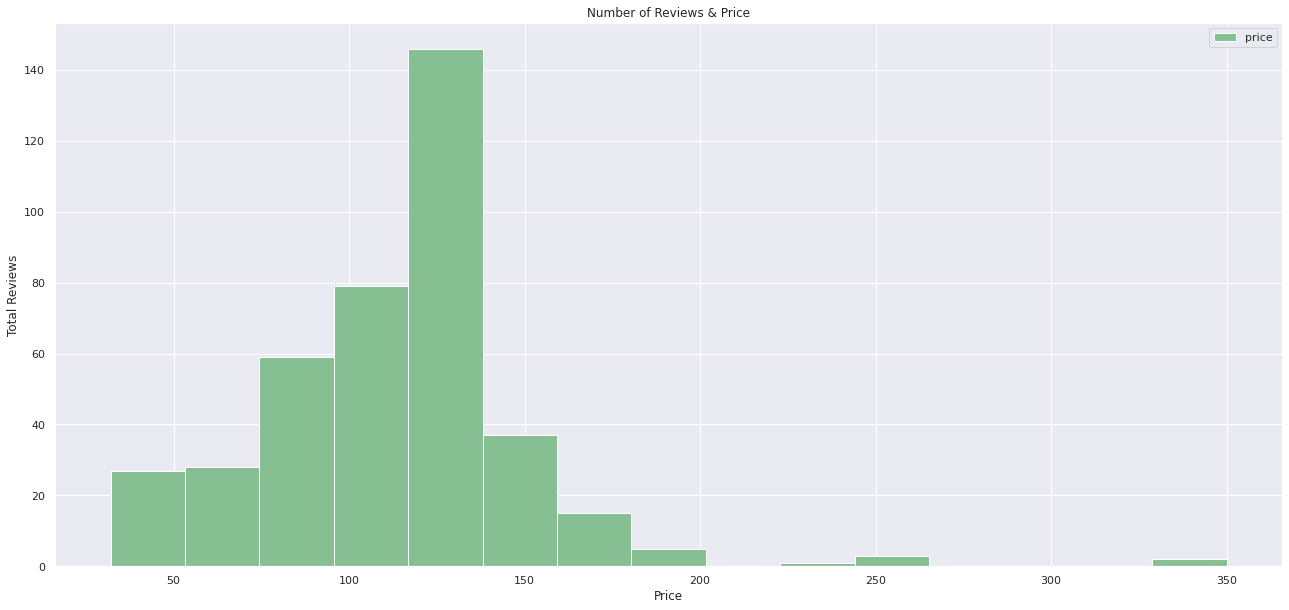

In [190]:
data2_0_mean_low_price.plot(kind = 'hist',bins=15,color = '#86bf91')
plt.xlabel("Price")
plt.ylabel("Total Reviews")
plt.title('Number of Reviews & Price')
plt.show()

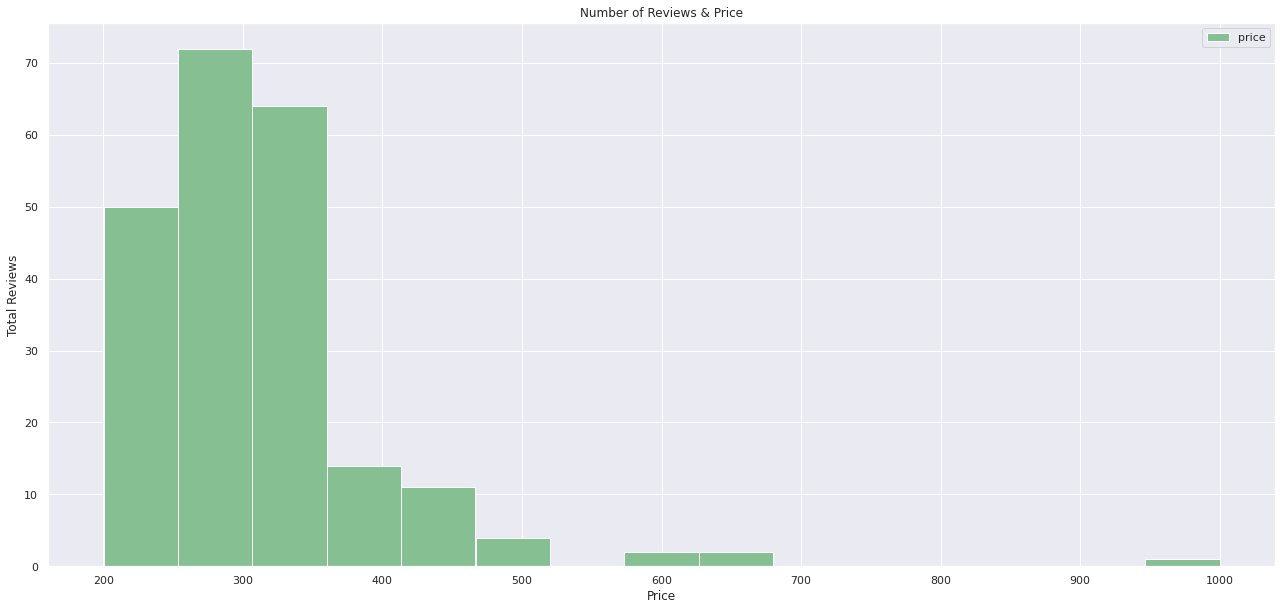

In [191]:
data2_0_0 = data2.drop(data2[data2['price']>1000].index)
data2_0_0 = data2_0_0.drop(data2_0_0[data2_0_0['price']<200].index)
data2_0_mean_1 = data2_0_0.groupby('number_of_reviews').agg({'price':'mean'})
data2_0_mean_1.plot(kind = 'hist',bins=15,color = '#86bf91')
plt.xlabel("Price")
plt.ylabel("Total Reviews")
plt.title('Number of Reviews & Price')
plt.show()

Text(0.5, 1.0, 'Number of Reviews & Price')

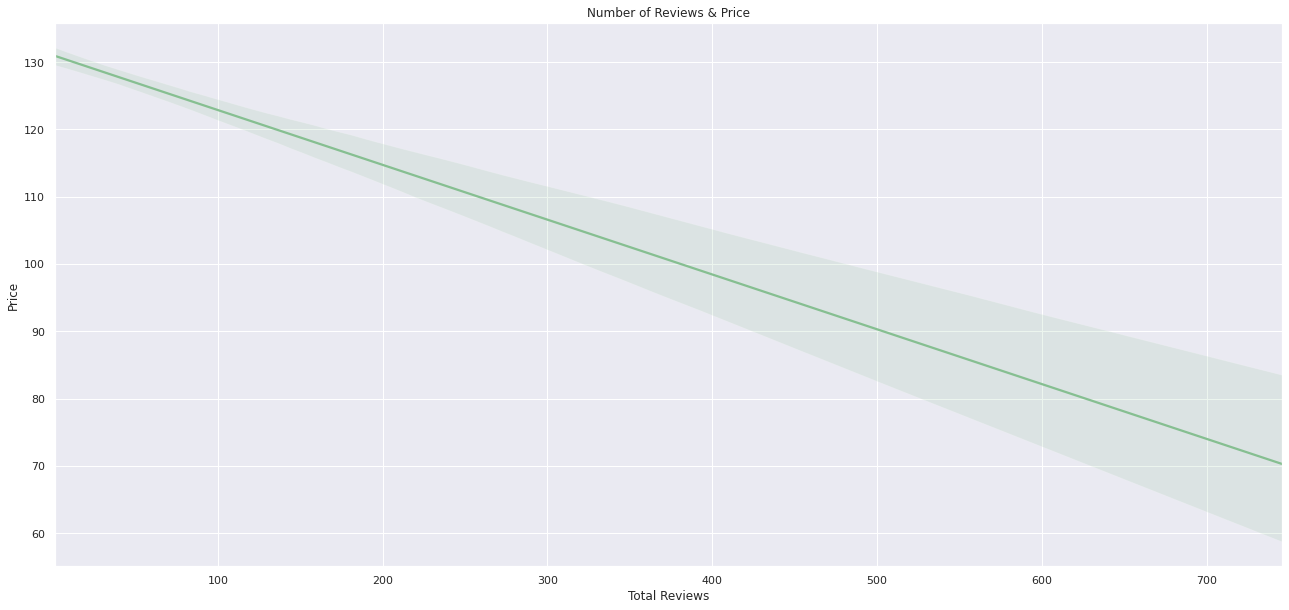

In [192]:
sns.regplot(x = 'number_of_reviews',y = 'price',
             data = data2_0,
            scatter=None, color='#86bf91')
plt.xlabel("Total Reviews")
plt.ylabel("Price")
plt.title('Number of Reviews & Price')

#### Reviews Per Month

In [193]:
reviews_per_month = df[['reviews_per_month','price']]

In [194]:
data2_1 = reviews_per_month.drop(reviews_per_month[reviews_per_month['reviews_per_month'] ==0].index)
data2_1 = data2_1.dropna()
display (data2_1 )
data2_1.describe()

reviews_per_month  price
0                   0.36  175.0
1                   3.40   73.0
2                   0.87   75.0
3                   0.48  160.0
4                   0.89   85.0
...                  ...    ...
44614               2.00  107.0
44615               1.00   70.0
44620               1.00   35.0
44621               1.00   42.0
44628               1.00  130.0

[34145 rows x 2 columns]

reviews_per_month         price
count       34145.000000  34145.000000
mean            0.864013    138.986898
std             1.267149    256.234212
min             0.010000     10.000000
25%             0.110000     65.000000
50%             0.350000    100.000000
75%             1.130000    154.000000
max            41.370000  10000.000000

In [206]:
data2_1_low_price = data2_1.drop(data2_1[data2_1['price']>1000].index)
data2_1_mean = data2_1_low_price.groupby('reviews_per_month').agg({'price':'mean'})
display(data2_1_low_price)

reviews_per_month  price
0                   0.36  175.0
1                   3.40   73.0
2                   0.87   75.0
3                   0.48  160.0
4                   0.89   85.0
...                  ...    ...
44614               2.00  107.0
44615               1.00   70.0
44620               1.00   35.0
44621               1.00   42.0
44628               1.00  130.0

[34010 rows x 2 columns]

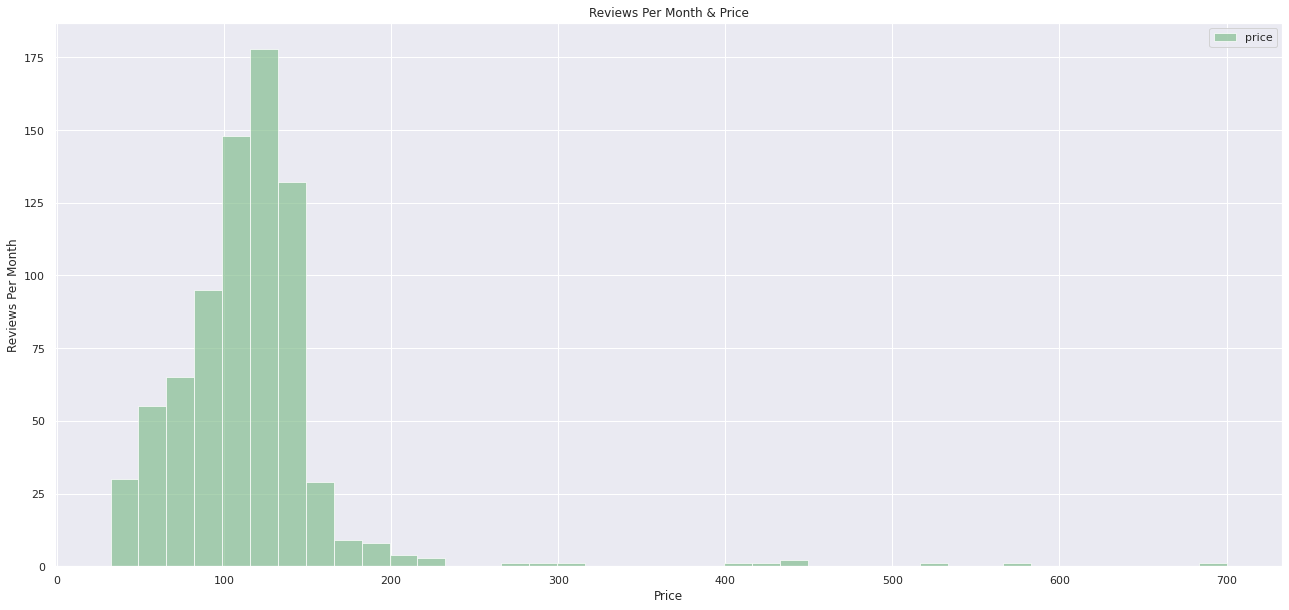

In [196]:
data2_1_mean.plot(kind = 'hist',bins=40, alpha=0.7,color = '#86bf91')
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.title('Reviews Per Month & Price')
plt.show()

In [205]:
cols = ['price','reviews_per_month', 'number_of_reviews']
df1[cols].corr()['price'].to_frame()

price
price              1.000000
reviews_per_month -0.047097
number_of_reviews -0.049012

There seems to be little to no correlation between the review count (total or monthly) and the listing's price.

### Review Scores

With multiple score categories painting a picture of the quality of the AirBnB, there may be multicolinearity between the values of these scores, which could lead to overfitting if we decide to use all the metrics.


In [201]:
cols = ['price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
corr = abs(df1[cols].corr())

<AxesSubplot:>

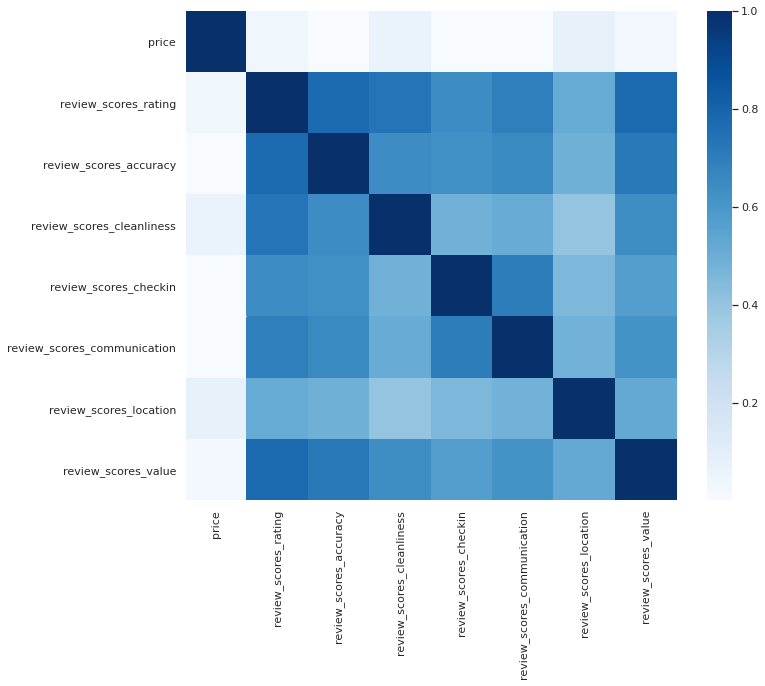

In [202]:
f, ax = plt.subplots(figsize=(11, 9))
# mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='Blues')

Looking at the correlation matrix, there seems to be a strong correlation between price and the locations reviews, cleanliness reviews, and overall rating. Additionally, there is a collinearity between most of the categories and overall score, meaning we will only use one of these metrics to avoid overfitting.

Location reviews is the only category that has low collinearity with the overall score but since locaton reviews is related to the location of the listing and not the quality of the listing, we will disregard it for this section of the study. 

Ultimately, between these categories, we believe using the overall rating feature (`review_scores_rating`) would be the best way to take reviews into account for our predictive model. Note that the variable has missing values. The missing values will be imputated in the next section of our notebook.

In [170]:
cols = ['price','review_scores_rating']
df1[cols].corr()[cols]

price  review_scores_rating
price                 1.000000              0.040448
review_scores_rating  0.040448              1.000000

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

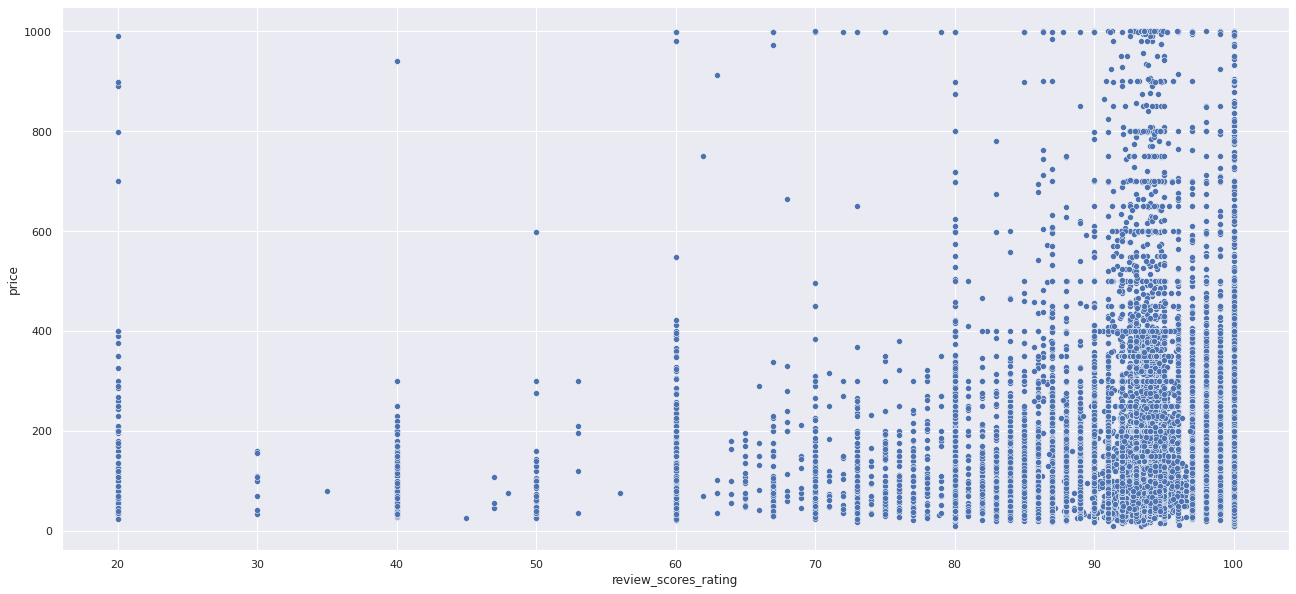

In [296]:
sns.scatterplot(data=df1,y='price',x='review_scores_rating')

Oddly enough, there does not seem to be much correlation between these two variables, which makes us consider whether or not reviews are even worth considering in our model. 

Instead of leaving it out, we will opt to create two models, one with review scores and one without, and evaluate the significance of reviews based on which model is better.

### High-Priced Listings

#### Total Reviews

In [208]:
data2_0_1_high_price = data2.drop(data2[data2['price']<1000].index)
display(data2_0_1_high_price.describe())
display(data2.describe())

number_of_reviews         price
count         156.000000    156.000000
mean           18.653846   2514.538462
std            34.512392   2499.842432
min             1.000000   1000.000000
25%             2.000000   1121.500000
50%             7.000000   1584.500000
75%            19.000000   2212.500000
max           224.000000  10000.000000

number_of_reviews         price
count       34145.000000  34145.000000
mean           29.375780    138.986898
std            51.432729    256.234212
min             1.000000     10.000000
25%             3.000000     65.000000
50%             8.000000    100.000000
75%            31.000000    154.000000
max           746.000000  10000.000000

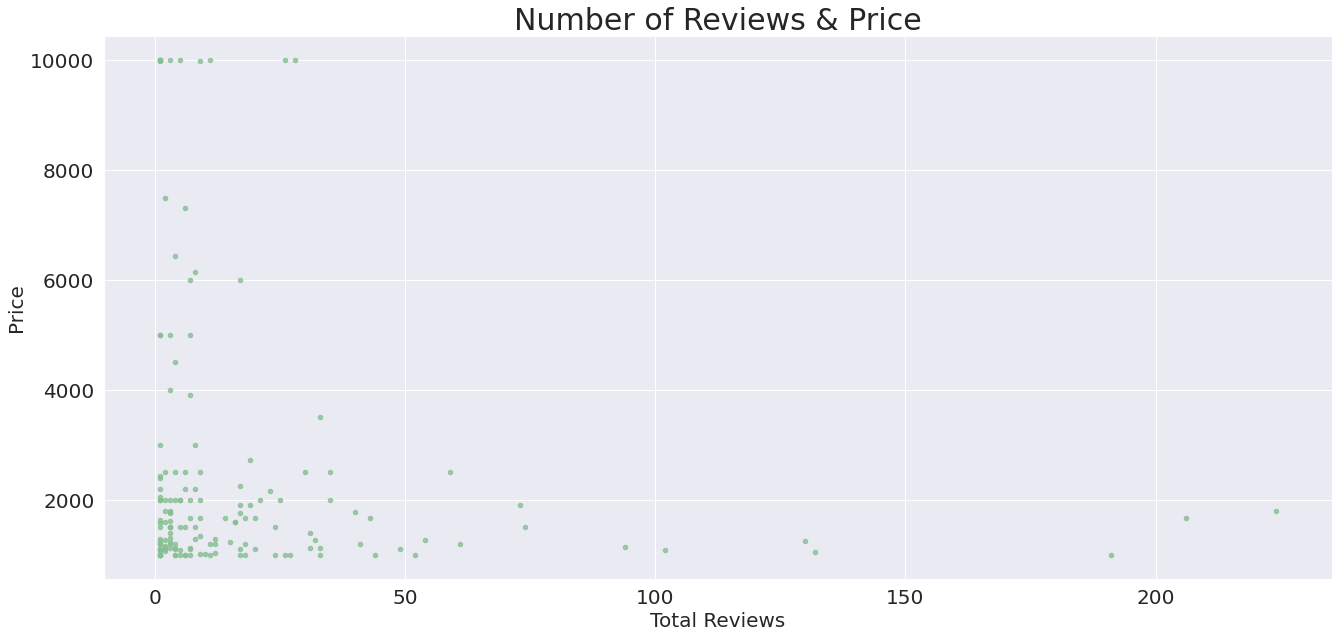

In [ ]:
data2_0_1_high_price.plot(kind='scatter', x='number_of_reviews', y='price',alpha=0.8,color = '#86bf91')
plt.xlabel("Total Reviews",fontsize = 20)
plt.ylabel("Price",fontsize = 20)
plt.title('Number of Reviews & Price',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

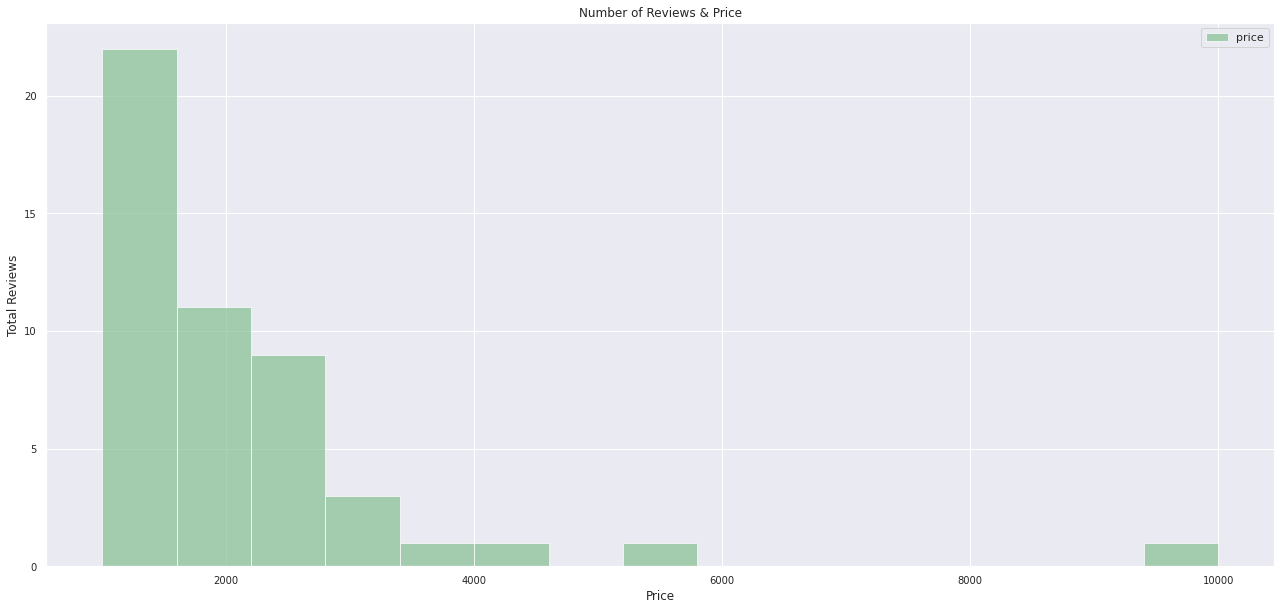

In [ ]:
data2_0_mean_high_price = data2_0_1_high_price.groupby('number_of_reviews').agg({'price':'mean'})
data2_0_mean_high_price.plot(kind = 'hist',bins=15, alpha=0.7,color = '#86bf91')
plt.xlabel("Price")
plt.ylabel("Total Reviews")
plt.title('Number of Reviews & Price')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Text(0.5, 1.0, 'Number of Reviews & Price')

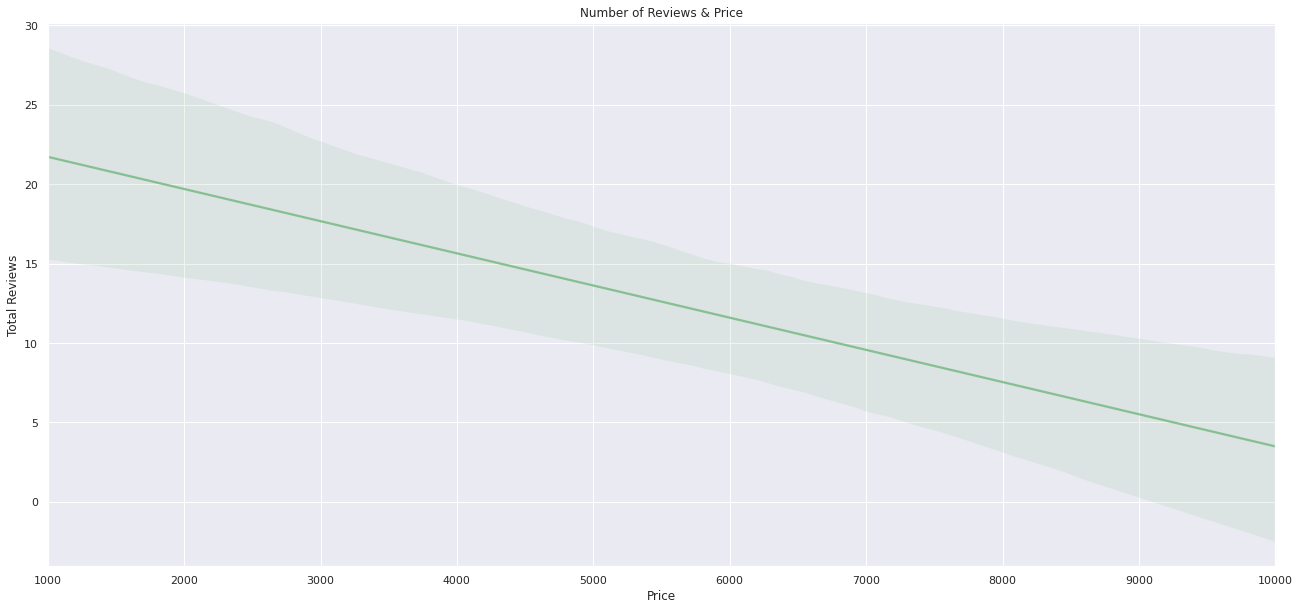

In [ ]:
sns.regplot(x = 'price',y = 'number_of_reviews',
             data = data2_0_1_high_price,
            scatter=None,  color='#86bf91')
plt.xlabel("Price")
plt.ylabel("Total Reviews")
plt.title('Number of Reviews & Price')

#### Reviews Per Month

In [ ]:
data2_1_high = data2_1.drop(data2_1[data2_1['price']<1000].index)
data2_1_high.describe()

reviews_per_month         price
count         156.000000    156.000000
mean            0.775064   2514.538462
std             1.611610   2499.842432
min             0.010000   1000.000000
25%             0.110000   1121.500000
50%             0.265000   1584.500000
75%             0.775000   2212.500000
max            15.890000  10000.000000

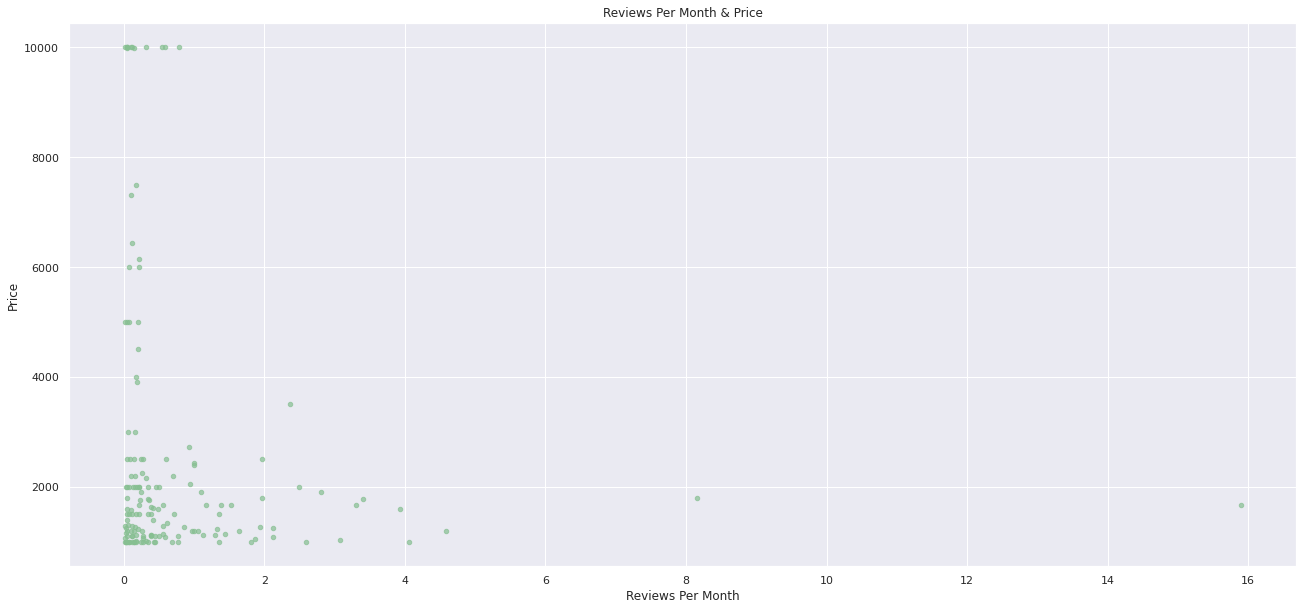

In [ ]:
data2_1_high.plot(kind='scatter', x='reviews_per_month', y='price',alpha=0.7,color = '#86bf91')
plt.xlabel("Reviews Per Month")
plt.ylabel("Price")
plt.title('Reviews Per Month & Price')
plt.show()

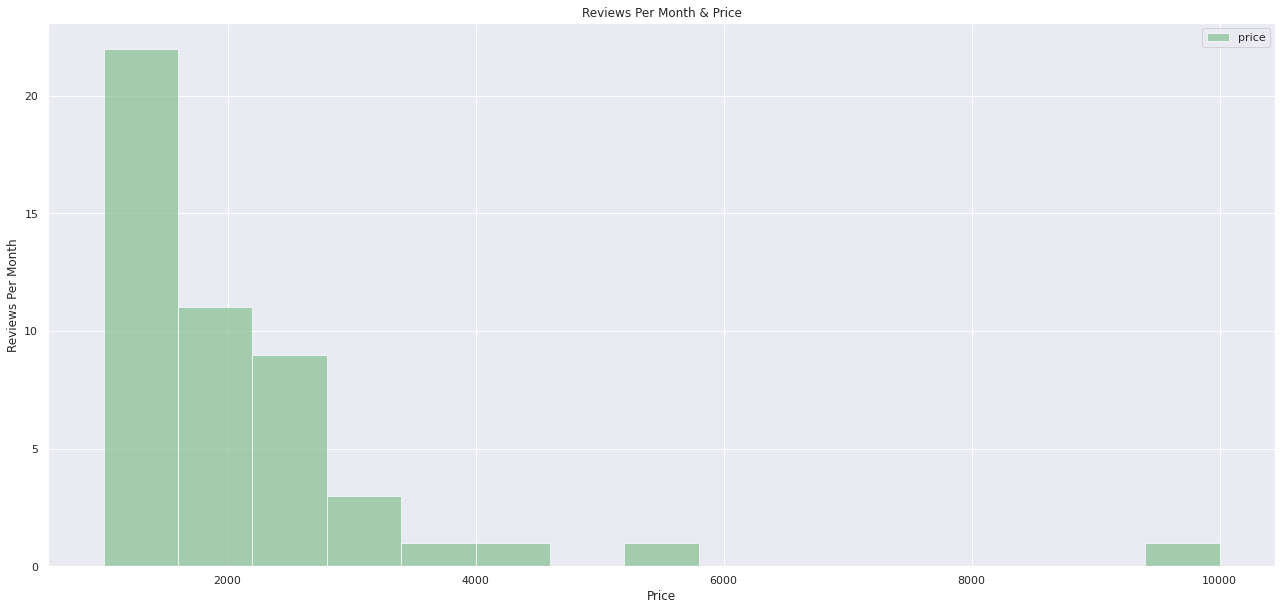

In [ ]:
data2_1_high_mean = data2_0_1_high_price.groupby('number_of_reviews').agg({'price':'mean'})
data2_1_high_mean.plot(kind = 'hist',bins=15, alpha=0.7,color = '#86bf91')
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.title('Reviews Per Month & Price')
plt.show()

In [207]:
cols = ['price','reviews_per_month', 'number_of_reviews']
df2[cols].corr()['price'].to_frame()

price
price              1.000000
reviews_per_month -0.150621
number_of_reviews -0.112038

The correlation between the variables remain low (albeit higher than the correlation for low-priced listings).

#### Review Scores

With multiple score categories painting a picture of the quality of the AirBnB, there may be multicolinearity between the values of these scores, which could lead to overfitting if we decide to use all the metrics.


In [183]:
cols = ['price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
corr = abs(df2[cols].corr())

<AxesSubplot:>

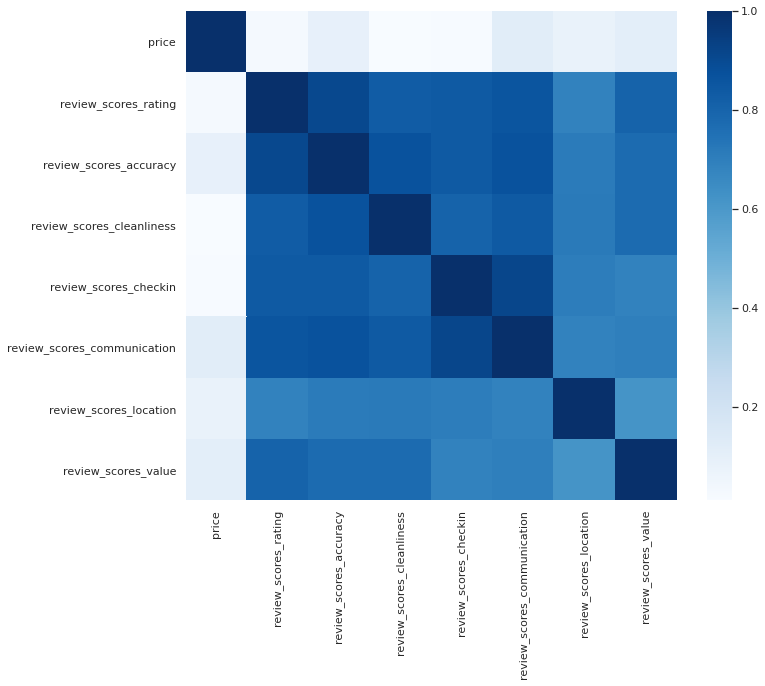

In [184]:
f, ax = plt.subplots(figsize=(11, 9))
# mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='Blues')

Looking at the correlation matrix, the same insights regarding collinearity for low-priced listings can be drawn for high-priced listings.

In [294]:
cols = ['price','review_scores_rating']
df2[cols].corr()[cols]

price  review_scores_rating
price                 1.000000              0.039702
review_scores_rating  0.039702              1.000000

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

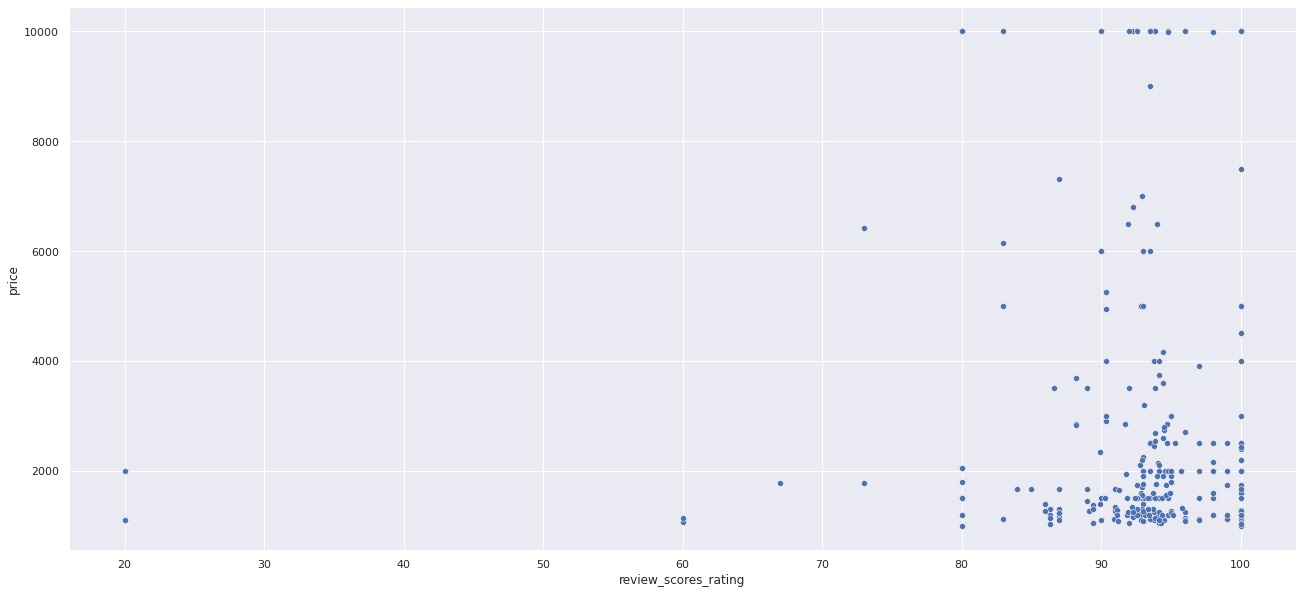

In [295]:
sns.scatterplot(data=df2,y='price',x='review_scores_rating')

Again, there does not seem to be much correlation between these two variables. Similar to the our low-priced model, we will create two models for high-priced listings (one with reivew scores and one without).

------

## Availability Exploration

This section will explore variables related the listing's accessibilty and availability, exploring variables like:
* minimum and maximum nights the listing can be rented for
* whether or not the listing is instantly bookable
* how many days the listing is avaialble in a year (scarcity)

### Section Summary
The findings for both types (high and low-priced listings yields similar conclusions):
* There are fewer instantly bookable listings than there are instantly bookable ones
* Instant bookability has an insignificant relationship with price
* Availability is generally the same either across a month, 3-month, or even a year
* Listing availability across a year plays no factor in determining price (no correlation)
* There seems to be a positive correlation present between the minimum number of nights required for rent and prices. We hypothesize this is because renters are more willing to price their listings lower in return for more nights rented.

**Areas of Improvement:**
* See if we can strengthen the correlation between min nights and price controlling for other variables.

In [ ]:
df.loc[(data['availability_365']==0)]['availability_365'].count() 

21802

With over 21,000 listings that have 0 available days in a year, we have decided to drop these rows as they significantly affect the data or the relationship between price and availability.


### Low-Priced Listings

In [ ]:
#I am making duplicated copy of the data frame in order to add some new columns just for my own use in availiability secton 
data_avail1 = df1[df1.availability_365 != 0] 

#### Instantly Bookable

In [ ]:
data_avail1.loc[(data_avail1['instant_bookable']=='f')]['instant_bookable'].count()

14527

In [ ]:
data_avail1.loc[(data_avail1['instant_bookable']=='t')]['instant_bookable'].count()

8121

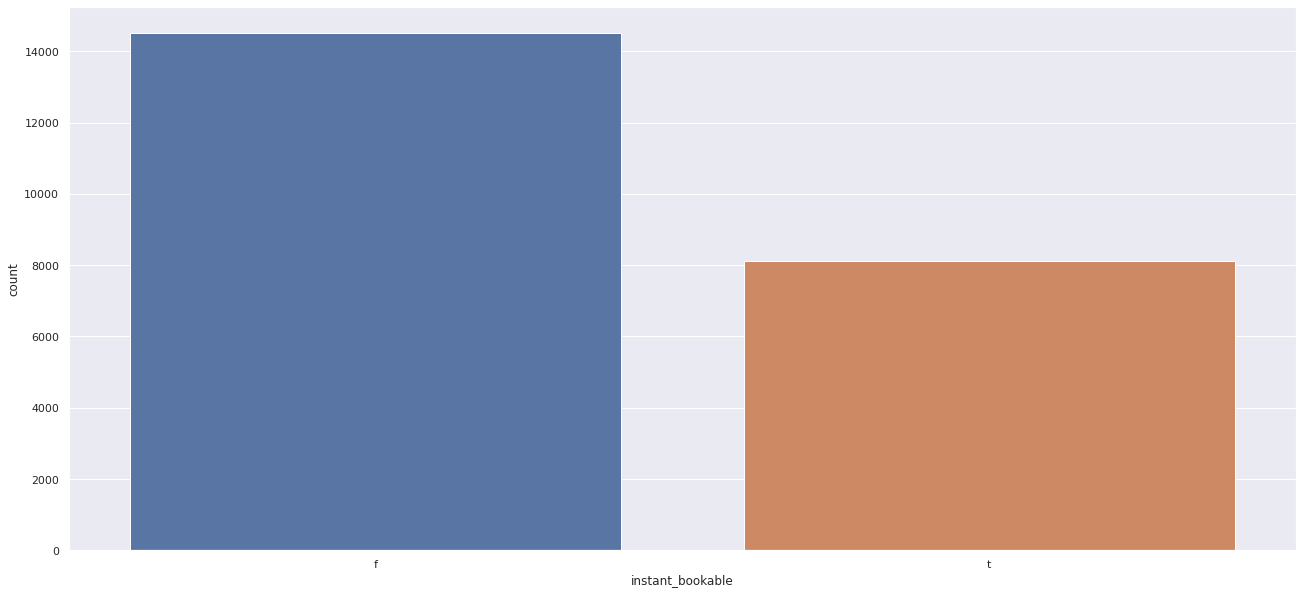

In [ ]:
sns.countplot(data = data_avail1, x='instant_bookable')

In [ ]:
data_avail1['instant_bookable'] = data_avail1['instant_bookable'].replace(['t','f'],[1,0])

In [ ]:
data_avail1['instant_bookable'].mean()

0.3585747085835394

Most listings are not instantly bookable, with only 36% of the listings are instantly bookable.



In [ ]:
data_avail1.groupby('instant_bookable')['price'].describe()

count        mean         std  ...    50%    75%     max
instant_bookable                                   ...                      
0                 14527.0  137.813505  122.454925  ...  100.0  165.0  1000.0
1                  8121.0  146.003147  142.231976  ...  100.0  172.0  1000.0

[2 rows x 8 columns]

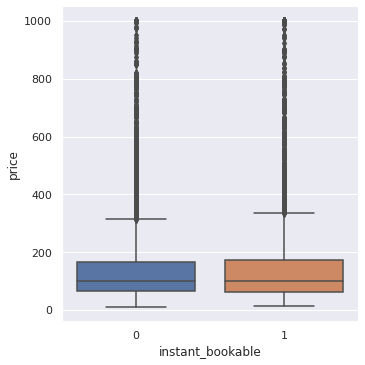

In [ ]:
sns.catplot(x="instant_bookable",
y="price",
data=data_avail1, kind='box')
plt.show()

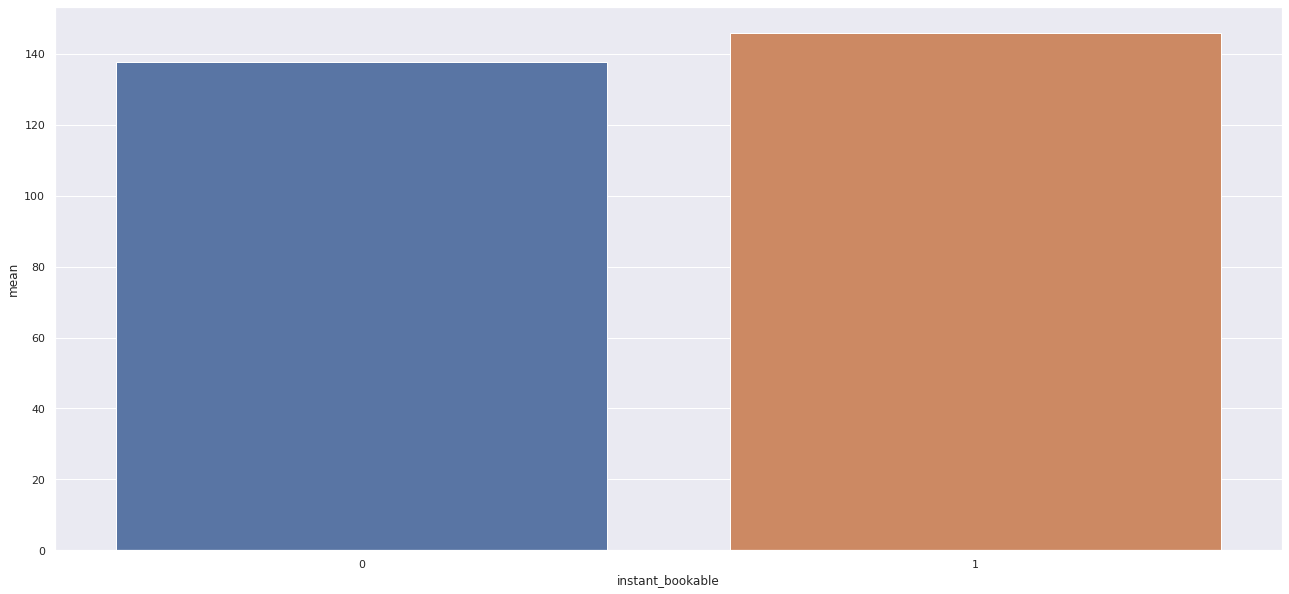

In [ ]:
table = data_avail1.groupby('instant_bookable')['price'].describe().reset_index()
sns.barplot(data=table, x='instant_bookable',y='mean')

Instantly bookable rooms have higher prices on average but the difference is not very significant.

In [ ]:
data_avail1[['price','instant_bookable']].corr()

price  instant_bookable
price             1.000000          0.030225
instant_bookable  0.030225          1.000000

It seems that there is no significant correlation between these two variables.

In [ ]:
data_avail1['avail_30_rate'] = data_avail1['availability_30']/30
data_avail1['avail_60_rate'] = data_avail1['availability_60']/60
data_avail1['avail_90_rate'] = data_avail1['availability_90']/90
data_avail1['avail_365_rate'] = data_avail1['availability_365']/365

#### Listing Availability and its Relationship with Price



##### Average availability rate (days available/categorical time period)

In [ ]:
avail_info = data_avail1.describe()[['avail_30_rate', 'avail_60_rate', 'avail_90_rate', 'avail_365_rate']]
avail_info

avail_30_rate  avail_60_rate  avail_90_rate  avail_365_rate
count   22648.000000   22648.000000   22648.000000    22648.000000
mean        0.528796       0.603977       0.643606        0.564081
std         0.422335       0.400147       0.379679        0.360267
min         0.000000       0.000000       0.000000        0.002740
25%         0.033333       0.116667       0.300000        0.241096
50%         0.633333       0.750000       0.788889        0.493151
75%         0.966667       0.983333       0.988889        0.956164
max         1.000000       1.000000       1.000000        1.000000

 Looking across the row of 'mean' from the summary table for availability rates above, we can see that the average rate of availability is around 30% no matter how we categorize the time period-- availablity rate in 30 days, availability in 60, availability in a year etc.



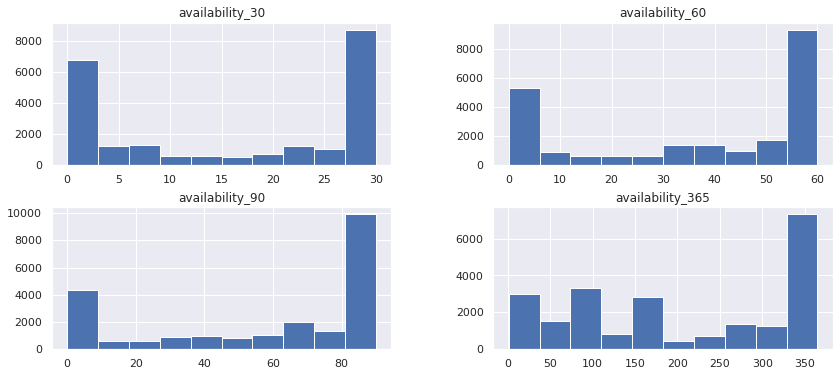

In [ ]:
hist = data_avail1.hist(column=['availability_30', 'availability_60', 'availability_90', 'availability_365'], figsize=(14,6))
plt.show()

By just looking at the histogram for availability_365 on the bottom right, we can see that most of availabilities gather around 350 days. Many of the availabilities gather in the range from 1 to 110 days

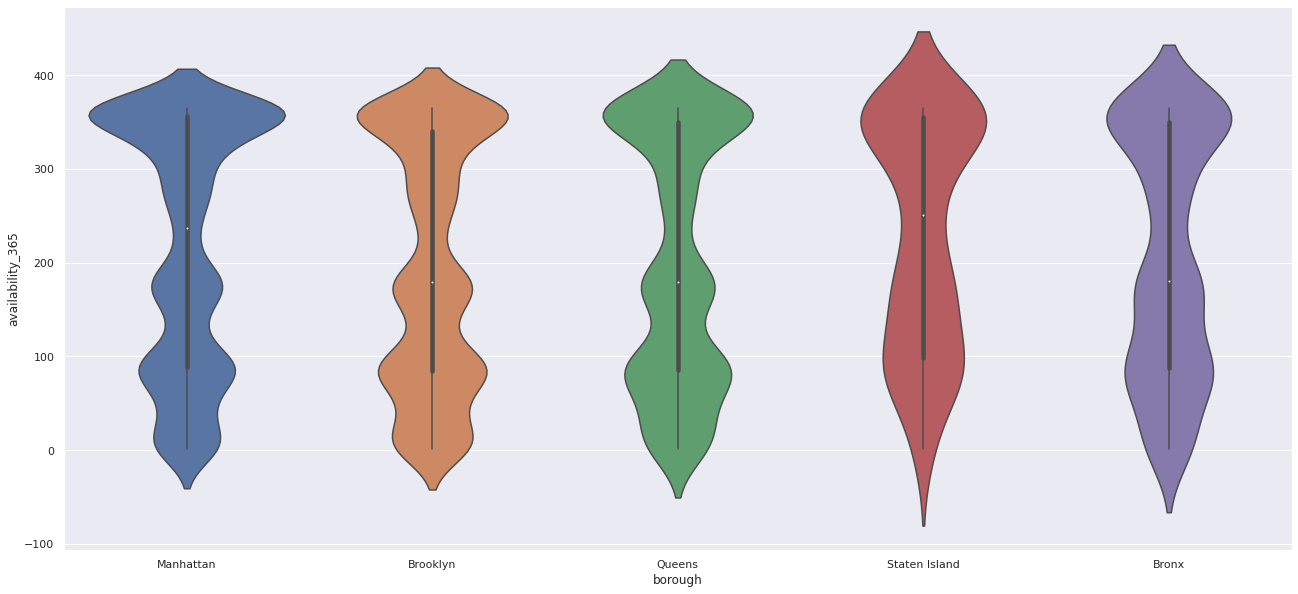

In [ ]:
sns.violinplot(x='borough',
y='availability_365', data=data_avail1)
plt.show()

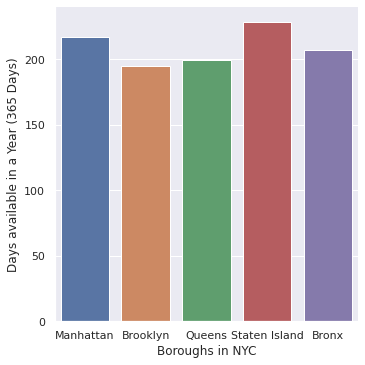

In [ ]:
sns.catplot(x="borough",
y="availability_365",
data=data_avail1, kind='bar', ci=None)
plt.ylabel('Days available in a Year (365 Days)')
plt.xlabel('Boroughs in NYC')
plt.show()

##### Relationship Between Days Available in a Year and the Room Price

In [ ]:
# relationship between availability in a year and the price

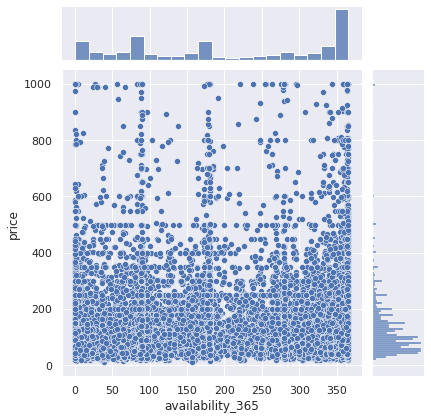

In [ ]:
sns.jointplot(x= 'availability_365',
y= 'price',
data=data_avail1)
plt.show()

In [ ]:
data_avail1[['price','availability_365']].corr()

price  availability_365
price             1.000000          0.067815
availability_365  0.067815          1.000000

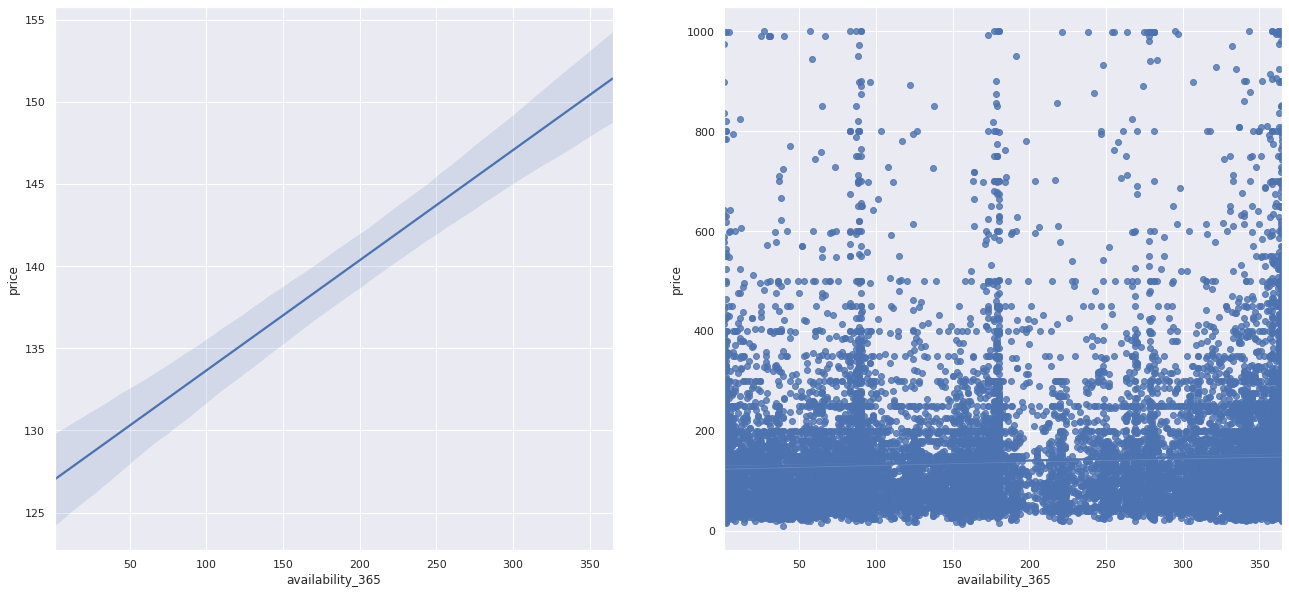

In [ ]:
fig, ax = plt.subplots(1,2)
sns.regplot(data=data_avail1,y='price',x='availability_365',scatter=False, ax=ax[0])
sns.regplot(data=data_avail1,y='price',x='availability_365',scatter=True, ax=ax[1])

From the linear regression and correlation matrix, we can see that there is no relationship between price and days available in a year.

Thus, when estimating a price, availability should not be considered as a variable for low-priced listings.

#### Min/Max Number of Booking Nights vs. Price

##### Minimum Nights

In [ ]:
min_night_table = data_avail1[data_avail1.minimum_nights <365]

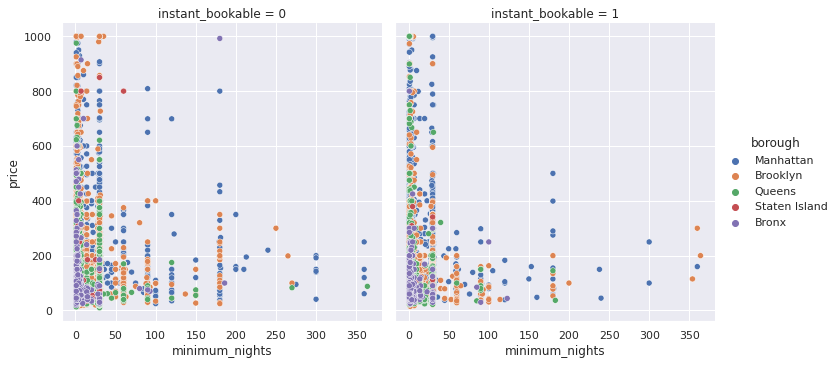

In [ ]:
sns.relplot(x="minimum_nights",
y="price",
data=min_night_table,
kind="scatter", col='instant_bookable', hue='borough')
plt.show()

For minimum nights vs. price, there is a slight trend that appears: the higher the number of minimum booking nights, the lower the price.

One hypothesis would be that longer-term rent on Airbnb has a lower price per night than does the shorter-term rent.

##### Maximum Nights

In [ ]:
max_night_table = data_avail1[data_avail1.maximum_nights <365]

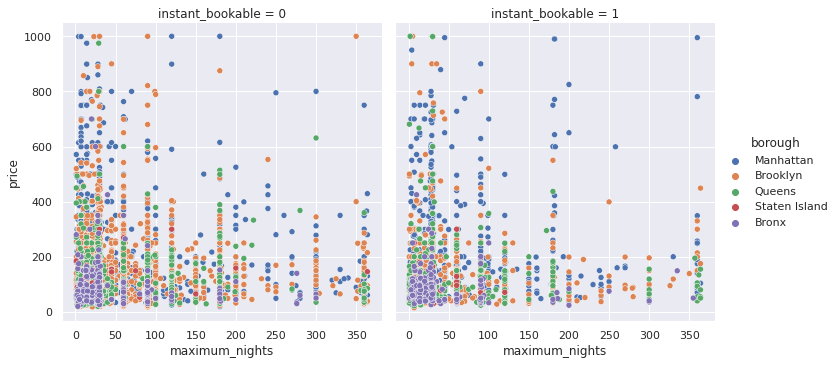

In [ ]:
sns.relplot(x="maximum_nights",
y="price",
data=max_night_table,
kind="scatter", col='instant_bookable', hue='borough')

There is no significant trend present here.

-----

### High-Priced Listings

In [ ]:
#I am making duplicated copy of the data frame in order to add some new columns just for my own use in availiability secton 
data_avail2 = df2[df2.availability_365 != 0] 

#### Instantly Bookable

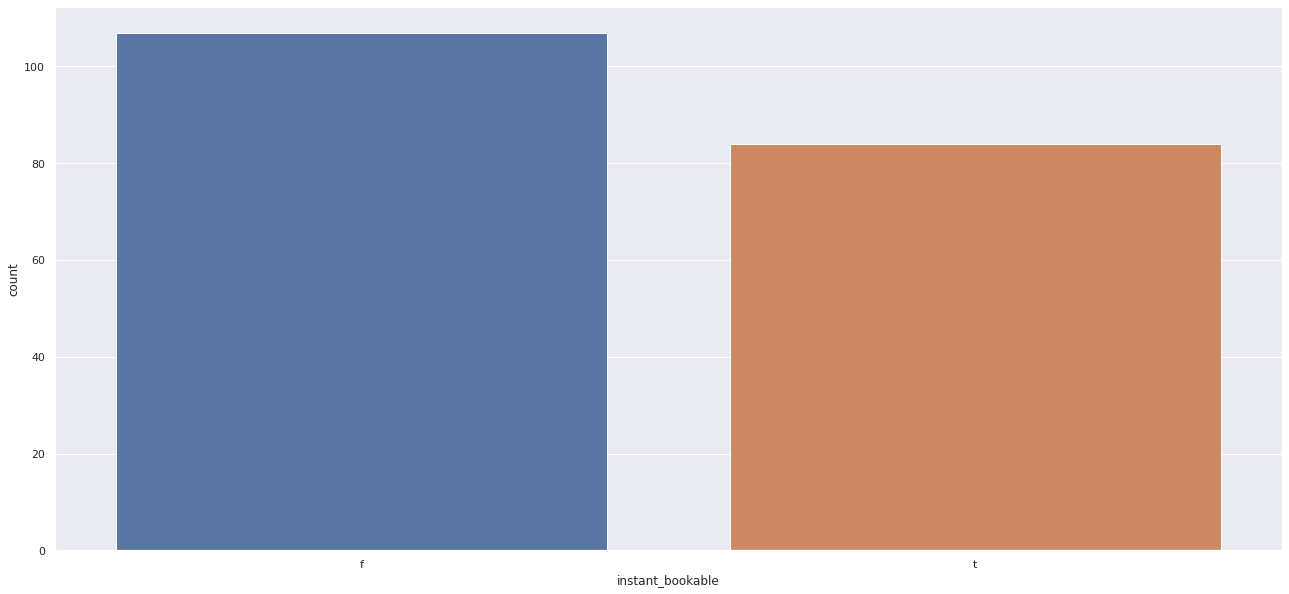

In [ ]:
sns.countplot(data = data_avail2, x='instant_bookable')

In [ ]:
data_avail2['instant_bookable'] = data_avail2['instant_bookable'].replace(['t','f'],[1,0])

In [ ]:
data_avail2['instant_bookable'].mean()

0.4397905759162304

Most listings are not instantly bookable, with only 44% of the listings are instantly bookable. However, this rate is proportion is higher than lower priced listings.

Let's see if there is a relationship with price and instat bookability.



In [ ]:
data_avail2.groupby('instant_bookable')['price'].describe()

count         mean          std  ...     50%      75%      max
instant_bookable                                   ...                          
0                 107.0  2408.475327  2087.777543  ...  1599.0  2500.00  10000.0
1                  84.0  2196.035714  1483.280786  ...  1667.0  2407.25   9000.0

[2 rows x 8 columns]

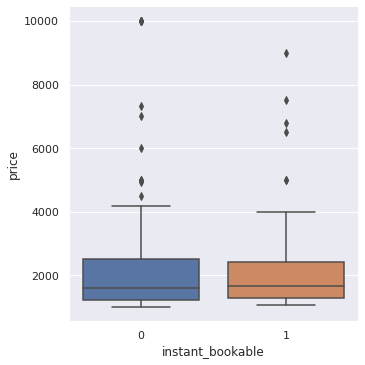

In [ ]:
sns.catplot(x="instant_bookable",
y="price",
data=data_avail2, kind='box')
plt.show()

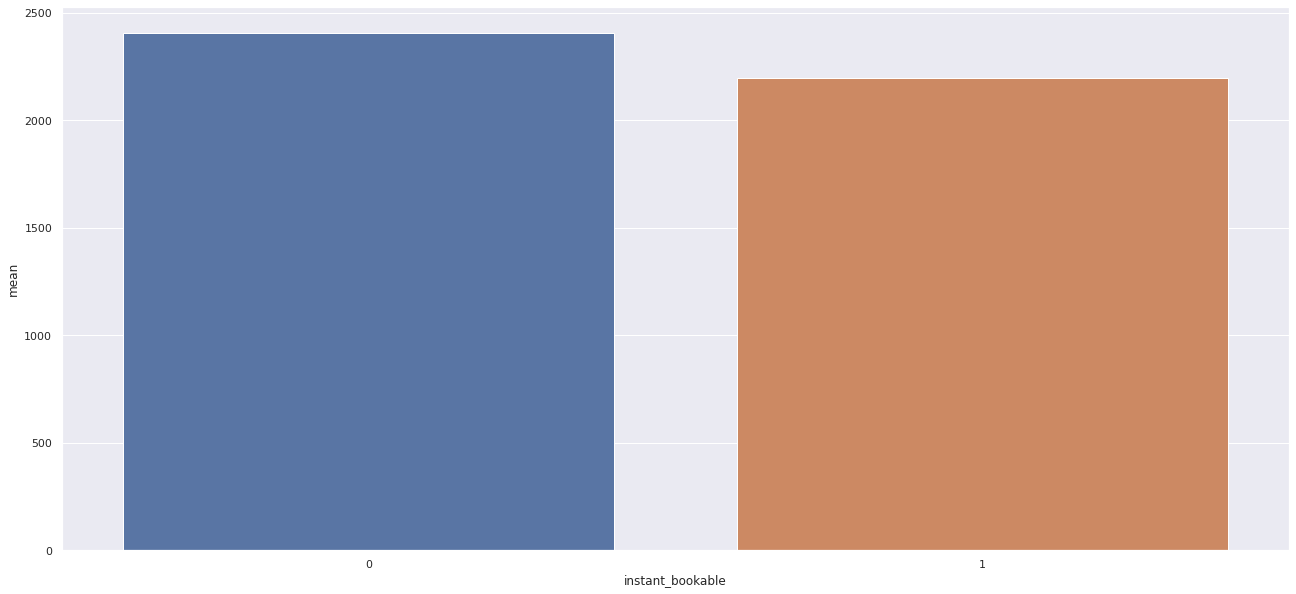

In [ ]:
table = data_avail2.groupby('instant_bookable')['price'].describe().reset_index()
sns.barplot(data=table, x='instant_bookable',y='mean')

Instantly bookable rooms have higher prices on average but the difference is not very significant.

In [ ]:
data_avail2[['price','instant_bookable']].corr()

price  instant_bookable
price             1.000000         -0.057303
instant_bookable -0.057303          1.000000

It seems that there is no significant correlation between these two variables.

In [ ]:
data_avail2['avail_30_rate'] = data_avail2['availability_30']/30
data_avail2['avail_60_rate'] = data_avail2['availability_60']/60
data_avail2['avail_90_rate'] = data_avail2['availability_90']/90
data_avail2['avail_365_rate'] = data_avail2['availability_365']/365

#### Listing Availability and its Relationship with Price



In [ ]:
# relationship between availability in a year and the price

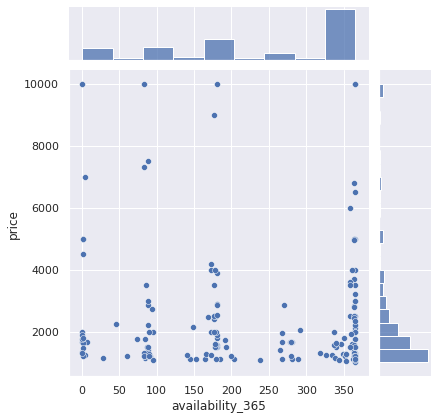

In [ ]:
sns.jointplot(x= 'availability_365',
y= 'price',
data=data_avail2)
plt.show()

In [ ]:
data_avail2[['price','availability_365']].corr()

price  availability_365
price             1.000000         -0.078177
availability_365 -0.078177          1.000000

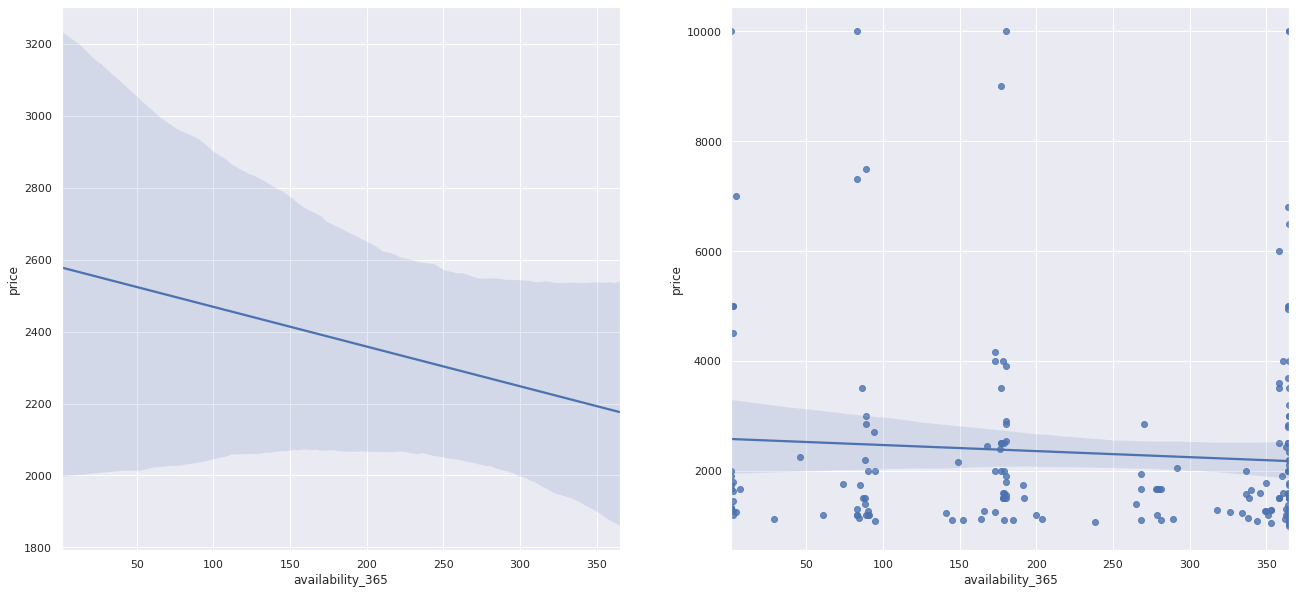

In [ ]:
fig, ax = plt.subplots(1,2)
sns.regplot(data=data_avail2,y='price',x='availability_365',scatter=False, ax=ax[0])
sns.regplot(data=data_avail2,y='price',x='availability_365',scatter=True, ax=ax[1])

From the linear regression and correlation matrix, we can see that there is no relationship between price and days available in a year.

Similar to low-priced listings, availability should not be considered as a variable for high-priced listings.

#### Min/Max Number of Booking Nights vs. Price

##### Minimum Nights

In [ ]:
min_night_table = data_avail2[data_avail2.minimum_nights <365]

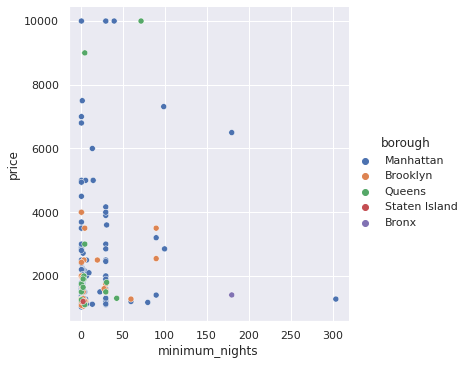

In [ ]:
sns.relplot(x="minimum_nights",
y="price",
data=min_night_table,
kind="scatter", hue='borough')
plt.show()

For minimum nights vs. price, a similar slight trend appears as before, through with fewer datapoints.

##### Maximum Nights

In [ ]:
max_night_table = data_avail2[data_avail2.maximum_nights <365]

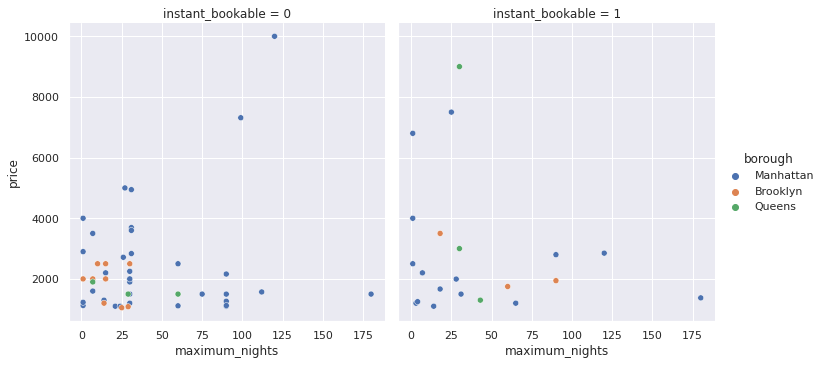

In [ ]:
sns.relplot(x="maximum_nights",
y="price",
data=max_night_table,
kind="scatter", col='instant_bookable', hue='borough')

There is no significant trend present here.

-------------

## EDA Conclusions

Based on our EDA, we determined that out of the initial 70+ features, there are 6 features that hold predictive value, taking into account multicollinearity of certain features (5 features for high-priced listings). They are the following:
* `accommodates` - the number of people the listing accommodates
* `room_type` - the type of listing (entire home/apt vs. private room vs. shared room vs. hotel room)
* `minimum nights` - the minimum number of nights renters are required to stay for
* `stations_per_capita_in_boro` - the number of stations per capita in the listing's borough
* `property_price_per_sqft` - the average property sale price per sqft in the listing's borough (no predictive value for high-priced listings)
* `review_scores_rating` - overall review scores (low correlation in our EDA, but we will test the predictive value in our ML models)

-------

# Machine Learning Models

## Data Cleaning (Part 2)

After conducting EDA and feature engineering in the previous sections, we have identified columns that have no predictive value for the price variable and features with high collinearity with other features; we have decided to drop these features to prevent overfitting.

In [115]:
# cd ..

In [213]:
df = pd.read_csv('merged_dataset.csv')

In [214]:
drop = ['id','name','description','host_id','neighbourhood', 'borough', 'latitude','longitude','maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60', 'availability_90','availability_365','number_of_reviews_ltm', 'number_of_reviews_l30d','bathrooms_text','amenities','property_type','host_response_rate', 'host_acceptance_rate','bedrooms','beds','bath_count','bath_type','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month','host_total_listings_count','host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','property_price','Station_count','stations_per_sq-mi_in_boro','has_availability','amenities_count','number_of_reviews']

In [215]:
df = df.drop(columns=drop)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44641 entries, 0 to 44640
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    44641 non-null  object 
 1   accommodates                 44641 non-null  int64  
 2   price                        44641 non-null  float64
 3   minimum_nights               44641 non-null  int64  
 4   review_scores_rating         33098 non-null  float64
 5   stations_per_capita_in_boro  44641 non-null  float64
 6   property_price_per_sqft      44641 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.4+ MB


### Dummify Categorical Variables

Now that we have dropped the columns, we know need to dummify the categorical variables and fill any null values with the appropriate method.

In [217]:
df_dum = pd.get_dummies(df, drop_first=True)

In [218]:
df_dum.head(3)

accommodates  price  minimum_nights  review_scores_rating  \
0             2  175.0               3                  94.0   
1             2   73.0               2                  84.0   
2             1   75.0               2                  98.0   

   stations_per_capita_in_boro  property_price_per_sqft  room_type_Hotel room  \
0                     96.47683               486.408059                     0   
1                     96.47683               486.408059                     0   
2                     96.47683               486.408059                     0   

   room_type_Private room  room_type_Shared room  
0                       0                      0  
1                       1                      0  
2                       1                      0

### Imputating Nulls

After dropping irrelevant columns, we still have one column with missing values. Let's impute the null values:

#### `review_scores_rating`

Imputating this variable is a little bit complicated. Replacing nulls with `0` is not appropriate since that assumes the listing is bad, but replacing it with means or medians may not be wise either as it oversimplifies the nuances that go into a review. Therefore, we will use a simple linear regression model to imputate the review values.







In [219]:
df_review = df_dum.dropna(axis=0).drop(columns='price')

In [220]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33098 entries, 0 to 44628
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 33098 non-null  int64  
 1   minimum_nights               33098 non-null  int64  
 2   review_scores_rating         33098 non-null  float64
 3   stations_per_capita_in_boro  33098 non-null  float64
 4   property_price_per_sqft      33098 non-null  float64
 5   room_type_Hotel room         33098 non-null  uint8  
 6   room_type_Private room       33098 non-null  uint8  
 7   room_type_Shared room        33098 non-null  uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 1.6 MB


In [221]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [222]:
X = df_review.drop('review_scores_rating', axis=1)
y = df_review['review_scores_rating']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (23168, 7)
Xtest shape: (9930, 7)


In [223]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [224]:
y_model = model.predict(Xtest)

In [225]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted reviews')).head()

index  accommodates  minimum_nights  stations_per_capita_in_boro  \
0    503             2               1                    96.476830   
1  29359             6               4                    67.473150   
2  38308             1               1                    37.207684   
3  15119             2               3                    96.476830   
4  33373             4               1                    67.473150   

   property_price_per_sqft  room_type_Hotel room  room_type_Private room  \
0               486.408059                     0                       0   
1               324.659432                     0                       0   
2               306.400848                     0                       1   
3               486.408059                     0                       1   
4               324.659432                     0                       0   

   room_type_Shared room  review_scores_rating  predicted reviews  
0                      0                  92.0          94.801164  
1                      0                  85.0          94.324963  
2                      0                  80.0          93.878888  
3                      0                  89.0          92.580720  
4                      0                  83.0          94.995302

<AxesSubplot:xlabel='review_scores_rating', ylabel='predicted reviews'>

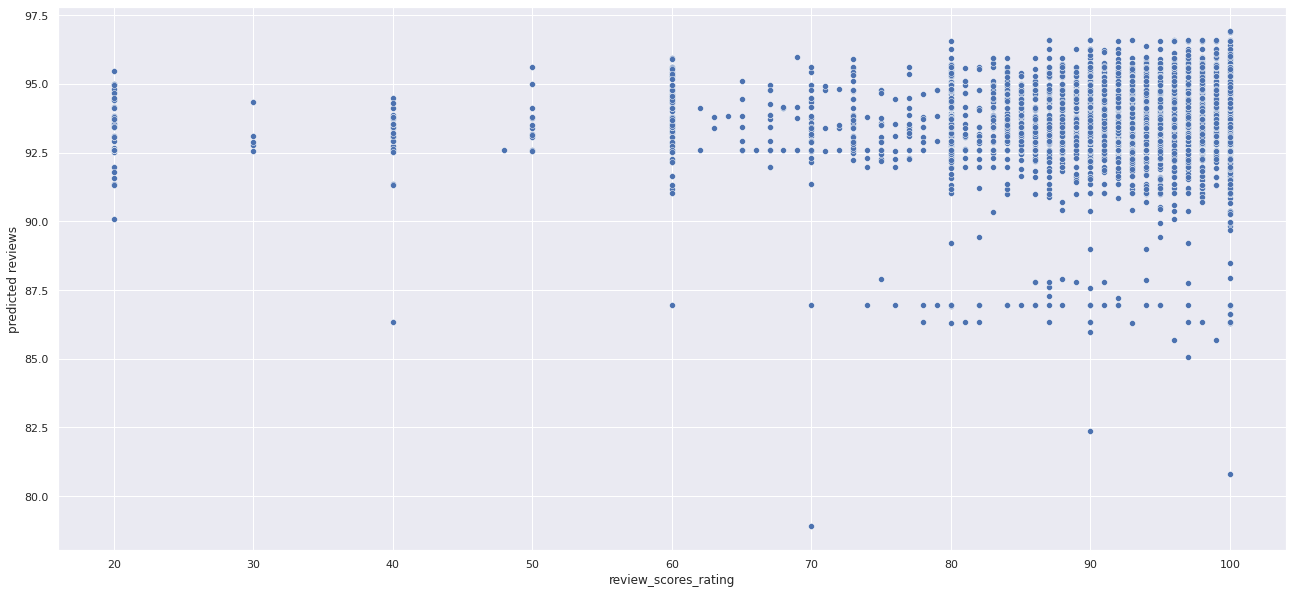

In [226]:
table = test.join(pd.Series(y_model, name='predicted reviews'))
sns.scatterplot(x='review_scores_rating',y='predicted reviews', data=table)

In [227]:
from sklearn.metrics import mean_squared_error
import math
RMSE = round(math.sqrt(mean_squared_error(ytest, y_model)),2)
print(f'This predictive model has a RMSE of {RMSE}.')

This predictive model has a RMSE of 9.46.


From looking at the scatter graph, it seems that our model has done an adequate job predicting the review scores. It seems to have only predicted values above ~75 but that's likely because most of the data point we trained on had high review scores, leaning the model to predict higher scores.

Let's see how well this predction compares to using the mean and median to imputate scores:

In [228]:
mean = [df.review_scores_rating.mean() for _ in range(ytest.shape[0])]
median = [df.review_scores_rating.median() for _ in range(ytest.shape[0])]

In [229]:
RMSE = round(math.sqrt(mean_squared_error(ytest, pd.Series(mean))),2)
print(f'Imputing values with the mean will result in a RMSE of {RMSE}.')

Imputing values with the mean will result in a RMSE of 9.52.


In [230]:
RMSE = round(math.sqrt(mean_squared_error(ytest, pd.Series(median))),2)
print(f'Imputing values with the median will result in a RMSE of {RMSE}.')

Imputing values with the median will result in a RMSE of 10.04.


Across the board, our model has lower RMSE scores than using the mean and median.

This means, when taking into account the size of the errors, using the model to imputate scores will likely be a better method than using the mean or median review scores.

Note that further improvements on the model can be made with deeper EDA and further feature engineering, especially since we are imputing values only with price-correlated features, but with the limited time and scope of the project, we will not be doing this.

Now we will impute any missing values in the `review_scores_rating` variable with the predicted review score:

In [231]:
df_no_reviews = df_dum.drop(columns=['review_scores_rating','price'])

In [232]:
df_dum['predicted_reviews'] = model.predict(df_no_reviews)

In [233]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44641 entries, 0 to 44640
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 44641 non-null  int64  
 1   price                        44641 non-null  float64
 2   minimum_nights               44641 non-null  int64  
 3   review_scores_rating         33098 non-null  float64
 4   stations_per_capita_in_boro  44641 non-null  float64
 5   property_price_per_sqft      44641 non-null  float64
 6   room_type_Hotel room         44641 non-null  uint8  
 7   room_type_Private room       44641 non-null  uint8  
 8   room_type_Shared room        44641 non-null  uint8  
 9   predicted_reviews            44641 non-null  float64
dtypes: float64(5), int64(2), uint8(3)
memory usage: 2.5 MB


In [234]:
count = 0
for i in range(df_dum.review_scores_rating.shape[0]):
    if math.isnan(df_dum['review_scores_rating'][i]):
        df_dum['review_scores_rating'][i] = df_dum['predicted_reviews'][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [235]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44641 entries, 0 to 44640
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 44641 non-null  int64  
 1   price                        44641 non-null  float64
 2   minimum_nights               44641 non-null  int64  
 3   review_scores_rating         44641 non-null  float64
 4   stations_per_capita_in_boro  44641 non-null  float64
 5   property_price_per_sqft      44641 non-null  float64
 6   room_type_Hotel room         44641 non-null  uint8  
 7   room_type_Private room       44641 non-null  uint8  
 8   room_type_Shared room        44641 non-null  uint8  
 9   predicted_reviews            44641 non-null  float64
dtypes: float64(5), int64(2), uint8(3)
memory usage: 2.5 MB


We have successfully imputed the missing values! Now we can get rid of the `predicted_reviews` column.

In [236]:
df_dum.drop(columns='predicted_reviews',inplace=True)

In [237]:
df = df_dum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44641 entries, 0 to 44640
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 44641 non-null  int64  
 1   price                        44641 non-null  float64
 2   minimum_nights               44641 non-null  int64  
 3   review_scores_rating         44641 non-null  float64
 4   stations_per_capita_in_boro  44641 non-null  float64
 5   property_price_per_sqft      44641 non-null  float64
 6   room_type_Hotel room         44641 non-null  uint8  
 7   room_type_Private room       44641 non-null  uint8  
 8   room_type_Shared room        44641 non-null  uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 2.2 MB


-----

## Linear Regression Model

In [238]:
price_filter_above1000 = df['price'] > 1000
df1 = df[~price_filter_above1000]
df2 = df[price_filter_above1000]

### Low-Priced Listings

In [239]:
df1

accommodates  price  minimum_nights  review_scores_rating  \
0                 2  175.0               3             94.000000   
1                 2   73.0               2             84.000000   
2                 1   75.0               2             98.000000   
3                 2  160.0               3             97.000000   
4                 1   85.0               2             93.000000   
...             ...    ...             ...                   ...   
44636             4   90.0               1             95.964347   
44637             5   64.0               1             95.647864   
44638             2   60.0               1             94.401786   
44639             1   45.0              30             94.356991   
44640             2   91.0               1             96.597313   

       stations_per_capita_in_boro  property_price_per_sqft  \
0                        96.476830               486.408059   
1                        96.476830               486.408059   
2                        96.476830               486.408059   
3                        96.476830               486.408059   
4                        96.476830               486.408059   
...                            ...                      ...   
44636                    50.537575               130.448272   
44637                    50.537575               130.448272   
44638                    50.537575               130.448272   
44639                    50.537575               130.448272   
44640                    50.537575               130.448272   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  
0                         0                       0                      0  
1                         0                       1                      0  
2                         0                       1                      0  
3                         0                       0                      0  
4                         0                       1                      0  
...                     ...                     ...                    ...  
44636                     0                       0                      0  
44637                     0                       0                      0  
44638                     0                       1                      0  
44639                     0                       1                      0  
44640                     0                       0                      0  

[44364 rows x 9 columns]

#### With Imputed Review Scores

In [240]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [241]:
X = df1.drop('price', axis=1)
y = df1['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (31054, 8)
Xtest shape: (13310, 8)


In [242]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [243]:
y_model = model.predict(Xtest)

In [244]:
data = {'coefficient':model.coef_,'variable':Xtest.columns}
pd.DataFrame(data=data)

coefficient                     variable
0    25.360853                 accommodates
1    -0.126859               minimum_nights
2     0.424323         review_scores_rating
3     0.412648  stations_per_capita_in_boro
4     0.180279      property_price_per_sqft
5   109.900933         room_type_Hotel room
6   -47.308076       room_type_Private room
7   -36.562131        room_type_Shared room

In [245]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

index  accommodates  minimum_nights  review_scores_rating  \
0  34658             2               2            100.000000   
1  21548             2              30             97.000000   
2  37550             3               5             95.261954   
3  10825             2              30             86.000000   
4  21008             4               1             94.995302   

   stations_per_capita_in_boro  property_price_per_sqft  room_type_Hotel room  \
0                     67.47315               324.659432                     0   
1                     67.47315               324.659432                     0   
2                     67.47315               324.659432                     0   
3                     96.47683               486.408059                     0   
4                     67.47315               324.659432                     0   

   room_type_Private room  room_type_Shared room   price   predicted  
0                       1                      0   49.00   77.812832  
1                       0                      0  122.00  120.295895  
2                       0                      0   96.00  148.090721  
3                       0                      0   80.29  156.756464  
4                       0                      0  250.00  173.845862

<AxesSubplot:xlabel='price', ylabel='predicted'>

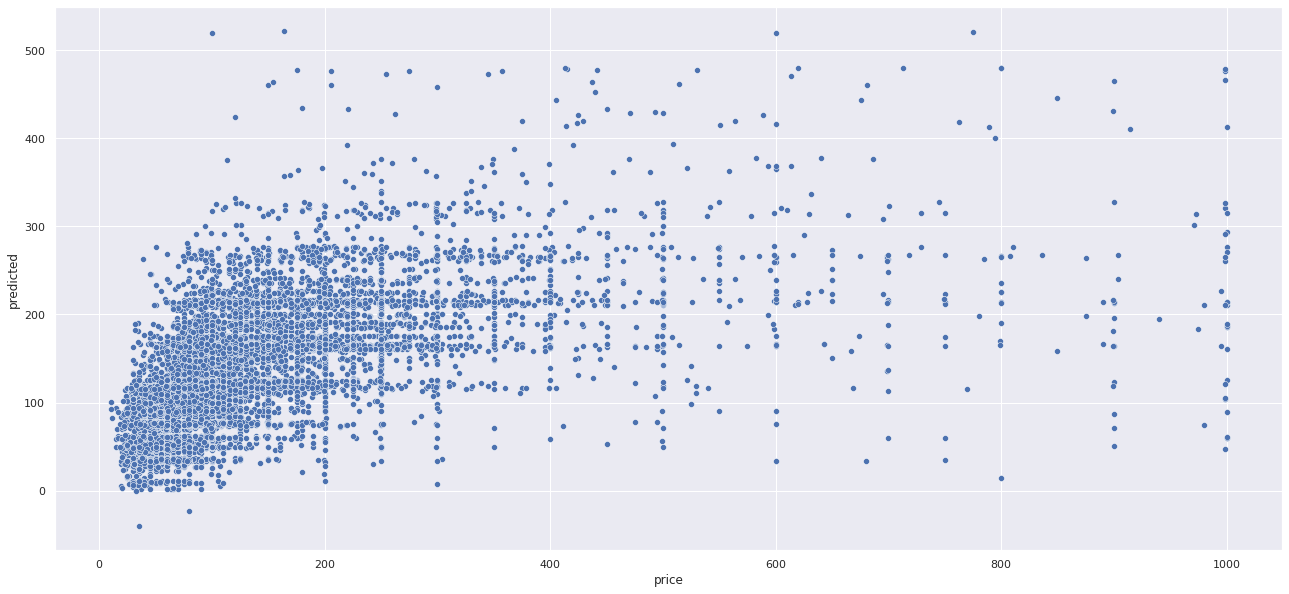

In [246]:
table = test.join(pd.Series(y_model, name='predicted'))
sns.scatterplot(x='price',y='predicted', data=table)

In [247]:
from sklearn.metrics import mean_squared_error
import math
RMSE = round(math.sqrt(mean_squared_error(ytest, y_model)),2)
print(f'This predictive model has a RMSE of {RMSE}.')

This predictive model has a RMSE of 96.06.


--------

#### Without Imputed Review Scores

In [248]:
X = df1.drop(['price','review_scores_rating'], axis=1)
y = df1['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (31054, 7)
Xtest shape: (13310, 7)


In [249]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [250]:
y_model = model.predict(Xtest)

In [251]:
data = {'coefficient':model.coef_,'variable':Xtest.columns}
pd.DataFrame(data=data)

coefficient                     variable
0    25.227012                 accommodates
1    -0.131233               minimum_nights
2     0.413491  stations_per_capita_in_boro
3     0.177996      property_price_per_sqft
4   106.531278         room_type_Hotel room
5   -48.223046       room_type_Private room
6   -38.219867        room_type_Shared room

In [252]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

index  accommodates  minimum_nights  stations_per_capita_in_boro  \
0  34658             2               2                     67.47315   
1  21548             2              30                     67.47315   
2  37550             3               5                     67.47315   
3  10825             2              30                     96.47683   
4  21008             4               1                     67.47315   

   property_price_per_sqft  room_type_Hotel room  room_type_Private room  \
0               324.659432                     0                       1   
1               324.659432                     0                       0   
2               324.659432                     0                       0   
3               486.408059                     0                       0   
4               324.659432                     0                       0   

   room_type_Shared room   price   predicted  
0                      0   49.00   75.007718  
1                      0  122.00  119.556250  
2                      0   96.00  148.064079  
3                      0   80.29  160.339659  
4                      0  250.00  173.816022

<AxesSubplot:xlabel='price', ylabel='predicted'>

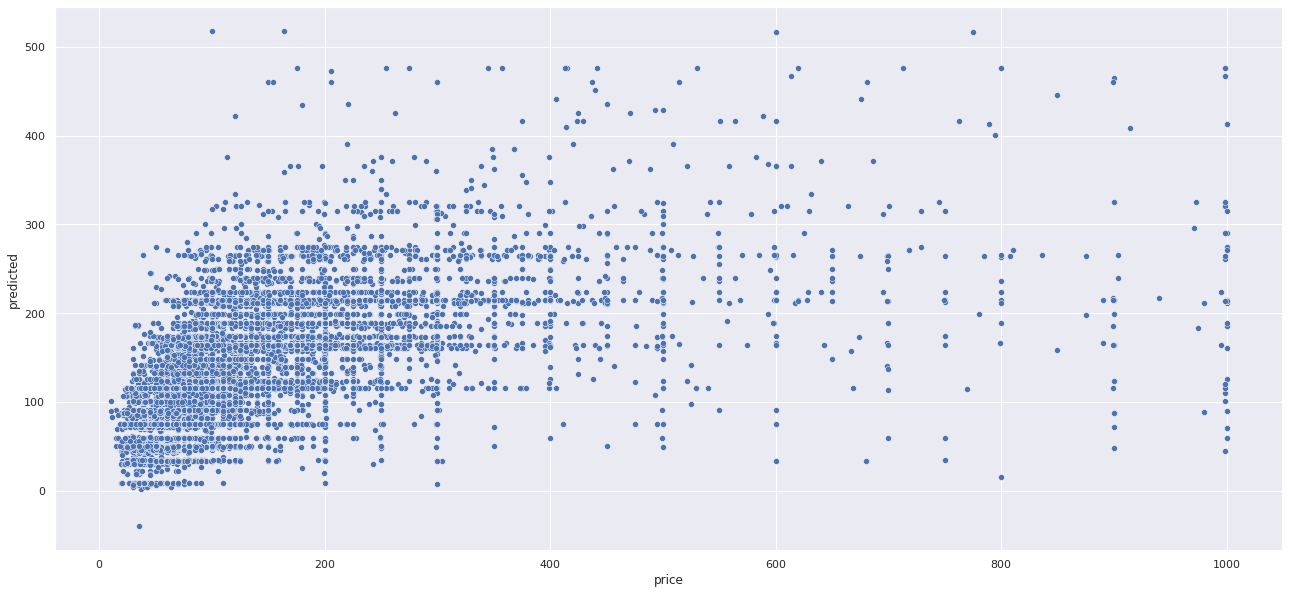

In [253]:
table = test.join(pd.Series(y_model, name='predicted'))
sns.scatterplot(x='price',y='predicted', data=table)

In [254]:
from sklearn.metrics import mean_squared_error
import math
RMSE = round(math.sqrt(mean_squared_error(ytest, y_model)),2)
print(f'This predictive model has a RMSE of {RMSE}.')

This predictive model has a RMSE of 96.13.


------

#### Takeaways
Our linear regression model resulted in an RMSE score of ~96. It seems that including review scores leads to a small improvement to the score but is arguably negligible, meaning that review scores may not be an important determinant of price.

Based on the coefficints, it seems the factor that best explains price is the room type and the number of people the listing accomodates.

Additionally, both models seem to be predicting negative values, which is clearly an error.

------

### High-Priced Listings

In [255]:
df2

accommodates   price  minimum_nights  review_scores_rating  \
182               9  2500.0              30             99.000000   
414               1  1300.0               1             92.922119   
563               8  2500.0              30             97.000000   
659               1  6000.0               7             90.000000   
773              10  2161.0               5             98.000000   
...             ...     ...             ...                   ...   
41519             1  1300.0              43             93.355659   
42363             7  1099.0               5             94.125687   
42620            16  1906.0               3             94.000000   
43449             5  1200.0               3             95.176861   
44475            16  1404.0             180             89.936597   

       stations_per_capita_in_boro  property_price_per_sqft  \
182                      96.476830               486.408059   
414                      96.476830               486.408059   
563                      96.476830               486.408059   
659                      96.476830               486.408059   
773                      96.476830               486.408059   
...                            ...                      ...   
41519                    37.207684               306.400848   
42363                    37.207684               306.400848   
42620                    37.207684               306.400848   
43449                    44.801912               223.585819   
44475                    50.537575               130.448272   

       room_type_Hotel room  room_type_Private room  room_type_Shared room  
182                       0                       0                      0  
414                       0                       1                      0  
563                       0                       0                      0  
659                       0                       1                      0  
773                       0                       0                      0  
...                     ...                     ...                    ...  
41519                     0                       1                      0  
42363                     0                       0                      0  
42620                     0                       0                      0  
43449                     0                       0                      0  
44475                     0                       0                      0  

[277 rows x 9 columns]

#### With Imputed Review Scores

In [256]:
model = LinearRegression()

In [257]:
X = df2.drop(['price','stations_per_capita_in_boro'], axis=1)
y = df2['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (193, 7)
Xtest shape: (84, 7)


In [258]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [259]:
y_model = model.predict(Xtest)

In [260]:
data = {'coefficient':model.coef_,'variable':Xtest.columns}
pd.DataFrame(data=data)

coefficient                 variable
0  -138.193807             accommodates
1    -4.028178           minimum_nights
2     7.682979     review_scores_rating
3     0.139563  property_price_per_sqft
4 -1839.005221     room_type_Hotel room
5   169.654466   room_type_Private room
6 -1380.752766    room_type_Shared room

In [261]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

index  accommodates  minimum_nights  review_scores_rating  \
0  13005             1              40             90.000000   
1  10153            16               1             90.370401   
2  12884             1               1             92.922119   
3  36221            15               1            100.000000   
4  39168            16               3             91.302255   

   property_price_per_sqft  room_type_Hotel room  room_type_Private room  \
0               486.408059                     0                       0   
1               486.408059                     0                       0   
2               486.408059                     0                       1   
3               324.659432                     0                       0   
4               306.400848                     0                       0   

   room_type_Shared room    price    predicted  
0                      1  10000.0  2044.215525  
1                      0   4943.0  1512.005937  
2                      0   1300.0  3774.172295  
3                      0   2429.0  1701.609690  
4                      0   1643.0  1485.986718

<AxesSubplot:xlabel='price', ylabel='predicted'>

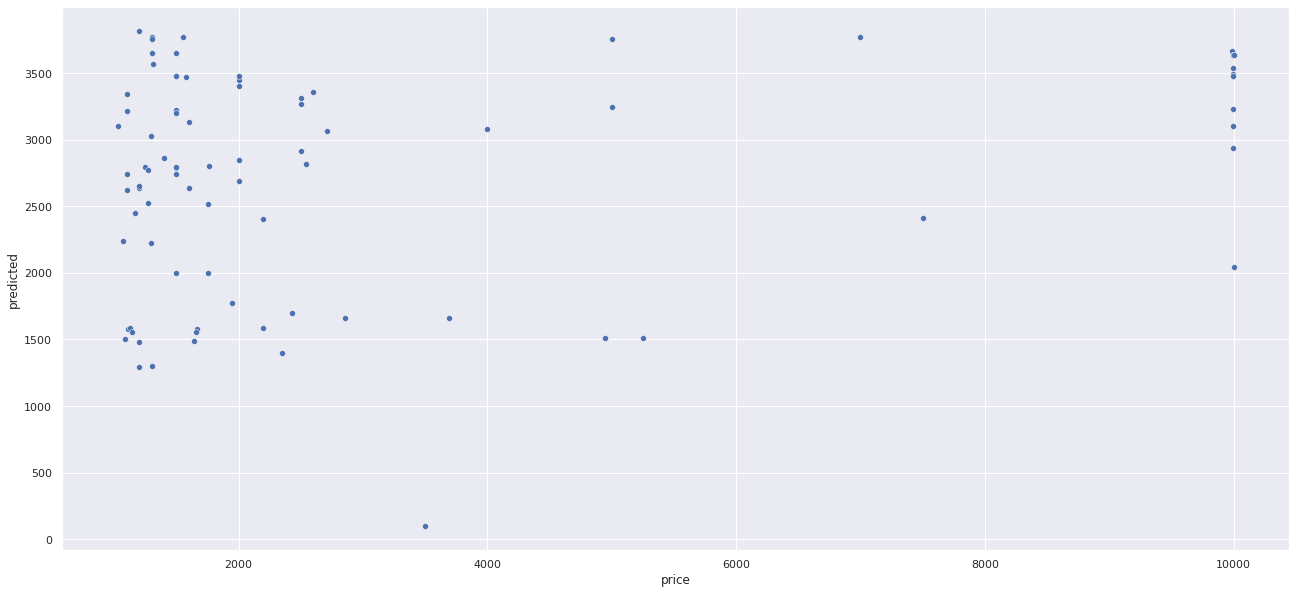

In [262]:
table = test.join(pd.Series(y_model, name='predicted'))
sns.scatterplot(x='price',y='predicted', data=table)

In [263]:
from sklearn.metrics import mean_squared_error
import math
RMSE = round(math.sqrt(mean_squared_error(ytest, y_model)),2)
print(f'This predictive model has a RMSE of {RMSE}.')

This predictive model has a RMSE of 2966.37.


-----

#### Without Imputed Review Scores

In [264]:
X = df2.drop(['price','review_scores_rating','stations_per_capita_in_boro'], axis=1)
y = df2['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (193, 6)
Xtest shape: (84, 6)


In [265]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [266]:
y_model = model.predict(Xtest)

In [267]:
data = {'coefficient':model.coef_,'variable':Xtest.columns}
pd.DataFrame(data=data)

coefficient                 variable
0  -136.680629             accommodates
1    -4.101479           minimum_nights
2     0.101948  property_price_per_sqft
3 -1875.150876     room_type_Hotel room
4   159.321318   room_type_Private room
5 -1362.754600    room_type_Shared room

In [268]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

index  accommodates  minimum_nights  property_price_per_sqft  \
0  13005             1              40               486.408059   
1  10153            16               1               486.408059   
2  12884             1               1               486.408059   
3  36221            15               1               324.659432   
4  39168            16               3               306.400848   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
0                     0                       0                      1   
1                     0                       0                      0   
2                     0                       1                      0   
3                     0                       0                      0   
4                     0                       0                      0   

     price    predicted  
0  10000.0  2073.071192  
1   4943.0  1545.574043  
2   1300.0  3755.104795  
3   2429.0  1665.764748  
4   1643.0  1519.019738

<AxesSubplot:xlabel='price', ylabel='predicted'>

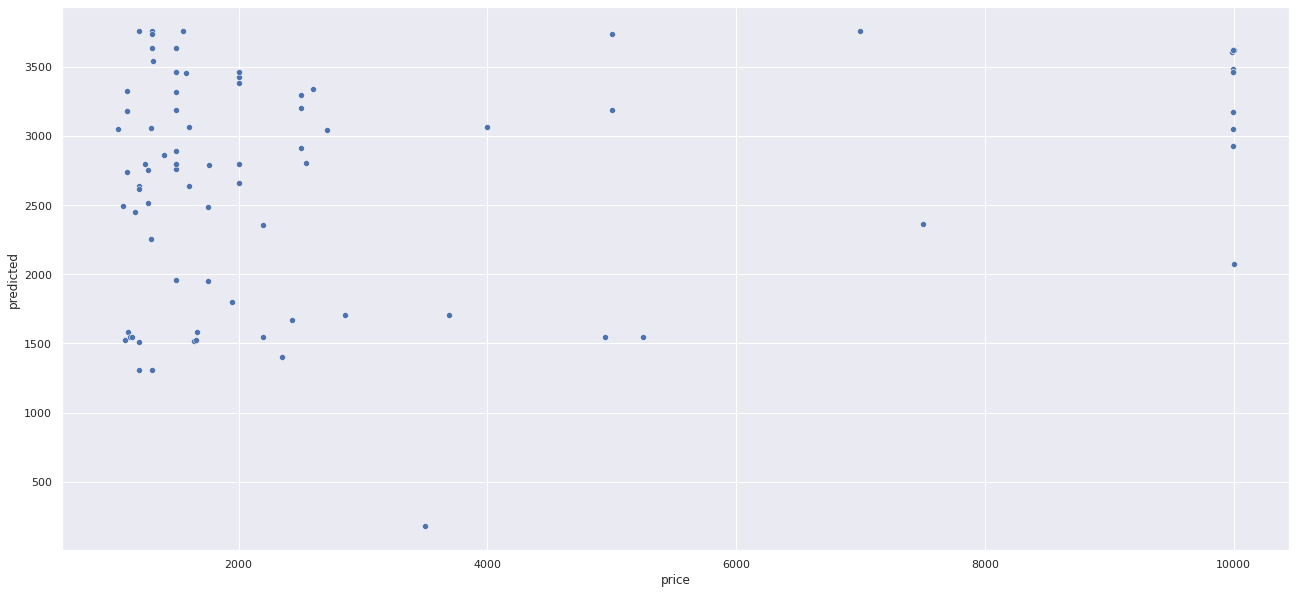

In [269]:
table = test.join(pd.Series(y_model, name='predicted'))
sns.scatterplot(x='price',y='predicted', data=table)

In [270]:
from sklearn.metrics import mean_squared_error
import math
RMSE = round(math.sqrt(mean_squared_error(ytest, y_model)),2)
print(f'This predictive model has a RMSE of {RMSE}.')

This predictive model has a RMSE of 2971.93.


------

#### Takeaways
Our linear regression model resulted in an RMSE score of ~2960. This large increase between the two models can be potentially explained by following reasons:
* larger range of prices for high-priced listings
* low sample size for high-priced listings
* limitations on feature engineering and EDA due to low sample size
* fewer patterns in high-priced listings


Based on the coefficients, it seems the factor that best explains price for high-priced listings is still the room type and the number of people the listing accomodates; however, the latter seems to have a negative coefficient, which goes against our logic and hypothesis (i.e. the more people it accomodates, the lower the price).

------

## Deep Neural Network

Let's see if a deep learning can improve upon our predictions:

In [ ]:
!pip install tensorflow

In [272]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### Low-Priced Listings

In [283]:
X = df1.drop('price', axis=1)
y = df1['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (31054, 8)
Xtest shape: (13310, 8)


In [284]:
dnn_model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[Xtrain.shape[-1],]),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

In [285]:
history = dnn_model.fit(
    X, y,
    epochs=100,
    verbose=0, # suppress logging
    validation_split = 0.3) # Calculate validation results on 30% of the training data

In [286]:
test_results = {}
RMSEs = {}
test_results['dnn_model'] = dnn_model.predict(Xtest, verbose=0)
RMSEs['dnn_model'] = round(mean_squared_error(ytest, test_results['dnn_model'], squared=False), 0)
RMSEs['dnn_model']

101.0

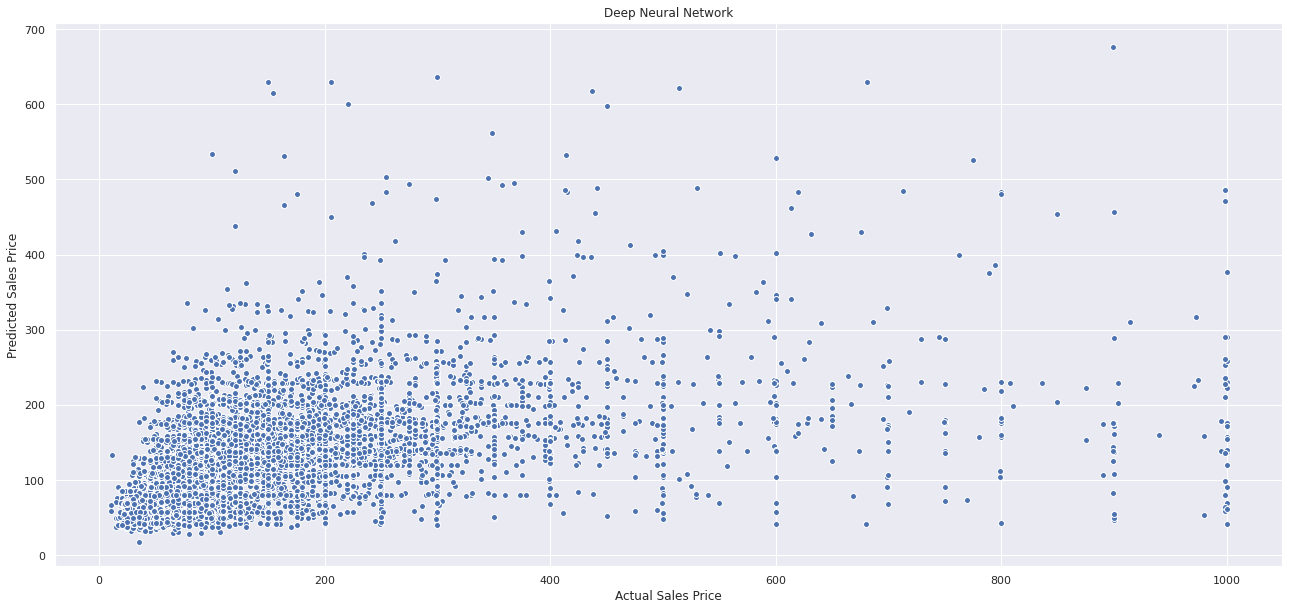

In [287]:
ax = plt.scatter(ytest, 
            test_results['dnn_model'].reshape(test_results['dnn_model'].shape[0],),
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Deep Neural Network')
plt.plot(linewidth=1, c='red', linestyle='--');

### High-Priced Listings

In [288]:
X = df2.drop(['price','stations_per_capita_in_boro'], axis=1)
y = df2['price']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (193, 7)
Xtest shape: (84, 7)


In [289]:
dnn_model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[Xtrain.shape[-1],]),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

In [290]:
history = dnn_model.fit(
    X, y,
    epochs=1000,
    verbose=0, # suppress logging
    validation_split = 0.3) # Calculate validation results on 30% of the training data

In [291]:
test_results = {}
RMSEs = {}
test_results['dnn_model'] = dnn_model.predict(Xtest, verbose=0)
RMSEs['dnn_model'] = round(mean_squared_error(ytest, test_results['dnn_model'], squared=False), 0)
RMSEs['dnn_model']

3281.0

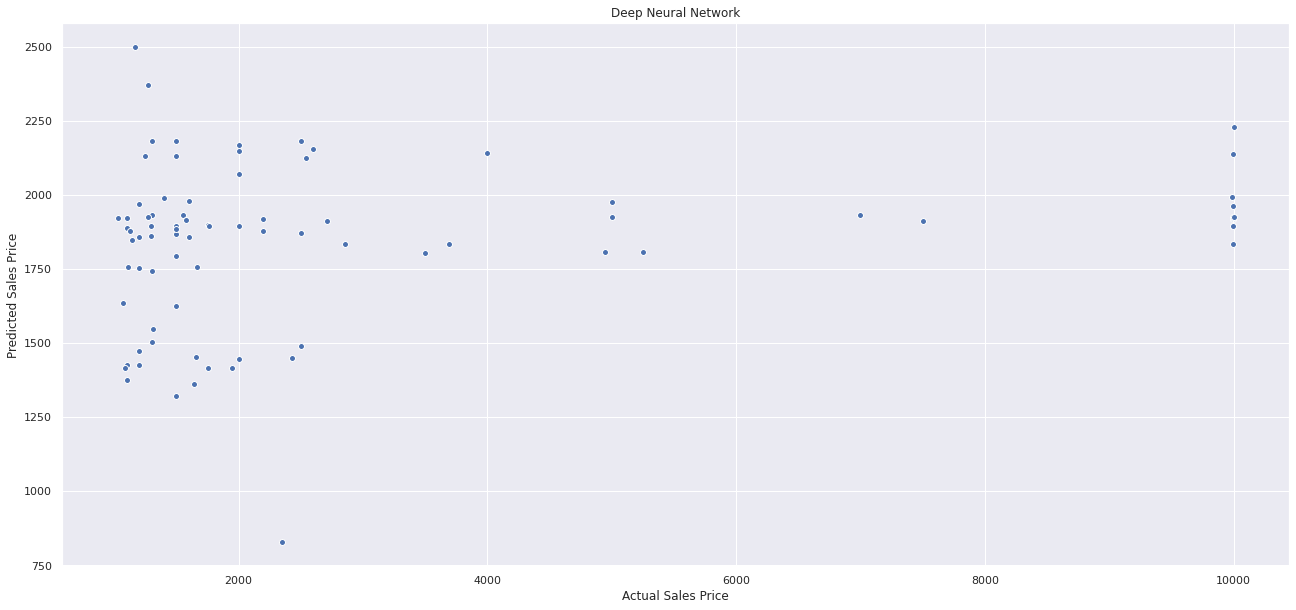

In [292]:
ax = plt.scatter(ytest, 
            test_results['dnn_model'].reshape(test_results['dnn_model'].shape[0],),
            edgecolors='white')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Deep Neural Network')
plt.plot(linewidth=1, c='red', linestyle='--');

### Takeaways
It seems that running a DNN model to predict prices leads to a higher RMSE (though not by any significant margin); however, it seemed to have solved the issue our linear regression model ran into when predicting negative prices.

--------

# Conclusion

In this iteration of our project, our team was able to obtain a more robust dataset that made it both easier and harder for us. With a plethora of features to potentially use in our model, we had to conduct extensive EDA in order to determine which features had any predictive value. To our surprise, after excluding variables with high multicollinearity, we had very few features (5-6 features) that were ultimately used in our models due to many of the 70+ features seemingly have little to no predictive value.

Deciding to split the dataset into low-priced and high-priced listings essentially doubled our work for EDA but we thought was worth it in order to account for price outliers and be able to predict prices for both price categories. Ultimately, our model that predicted low-priced listings was decent, while the model that predicted high-priced listings did not perform as well.

Based on our model's coefficients, we discovered that the factors that most heavily determine price was the listing's room type and the number of people it accommodates. Other factors like review scores and the average property sales in the listing's borough had some sway but not by much. It may be the case that some of the features impact was under or overstated in our model and EDA, but given the scope and resource limitations in our project, we were unable to explore this possibility further.

# Challenges and Areas of Improvements

## General Challenges

* After conducting extensive EDA, our notebook size was too large for Google Colab to handle; we had to migrate our notebook to AI Platform in order to make additions and edits.

## EDA
**General note**
* We mainly used correlation values as a measure of predictive value for each feature; we recognize that this may not be the best way to determine predictive value. For example, when plotting certain variables against each other on a scatter plot (e.g. number of reviews vs price), there is clustering, suggesting a possible relationship (perhaps logarithmic?) but it is not captured with linear correalation.

### Location
* With a more robust dataset with more variables, we could control for other variables when analyzing price across locations (e.g. for low-priced listings, the number of people the listing accomodates could acts as a good control variable)
* Using subways as an indicator could be done at a more granular level. The subway station dataset and AirBnB dataset has coordinates data; so it may be possible to calculate the number of subway stations close to any given listing. However, this is a very exhaustive process and may not be possible due to the time limitations of this project.
* The original property sales dataset also has information on the property's neighborhood; perhaps looking at average property sales between neighborhoods (instead of boroughs) could be more informative and lead to a better model.
* Use plotly to create an interactive heatmap, to better visualize the EDA.

### Host Information/Statistics
* It may be worth seeing if there is a correlation between the response and acceptance rates when we remove the 0-values that are dragging down the average rates (both low and high-priced listings).
* A correlation might appear if we control for certain variables. For example, if we control for the location and the number of people a listing accomodates, do the host characteristics affect prices?

### Listing Information
* It may be interesting to see how bath types play a factor into this, but we suspect it has some relation to the listing type (e.g. private rooms and likely to have private bathrooms).
* For low-priced listings, we could investigate the relationship between price and accommodates a little deeper, controlling for other variables to see if we can raise the correlaiton coefficient.

## Model Development

* Imputation of Review Scores was done without EDA, suggesting plenty room of improvement for the model used to imputate values
* Our RMSE scores still show a large margin of error in our predictions
* Our linear regression models (for low-priced listings) are predicting negative prices; finding out a way to correct them
* Find a more granular way to take location into account (i.e. use something more informative than average property sale prices in a borough)
